In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
import seaborn as sns
import statannot
import scipy.stats as stats
import itertools
from statannot import add_stat_annotation
import scipy.stats

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

import warnings
from matplotlib.colors import ListedColormap

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay

In [9]:
VolFdLac = pd.read_csv('/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/fractal_lac_data.csv')
tumorType = ['GBM' if hist == 'glioblastoma' else 'LGG' for hist in VolFdLac['Histology'] ]

VolFdLac['type'] =  tumorType

dff = pd.read_excel('/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/TCGA_LGG_GBM_radiomicFeatures_clinicalDetails.xlsx',"Sheet1" )
dff =  dff[['ID','MGMT_promoter_status', 'IDH_status']]

df =  VolFdLac.merge(dff, left_on='ID', right_on='ID')

df['MGMT_promoter_status'] = df['MGMT_promoter_status'].str[0:-6]
df['IDH_status'] = df['IDH_status'].str[0:3]
df.shape

(159, 26)

## Initial Analysis

In [10]:
df1 = df.dropna(subset='IDH_status')
df2= df1.dropna(subset='MGMT_promoter_status')

print(len(df1), len(df2))

142 119


# Essentials

In [11]:
# function to caluclate average of confusion matrices
def  avg_confusion_calculate(confusion_accuracy):
    no_of_splits = len(confusion_accuracy)
    rows,columns = confusion_accuracy[0].shape[0],confusion_accuracy[0].shape[1]
    avg_confusion_matrix = np.zeros((rows,columns))
    for i in range(no_of_splits):
        avg_confusion_matrix += confusion_accuracy[i]
    avg_confusion_matrix /= no_of_splits
    return avg_confusion_matrix

In [12]:
lst1= [['ed_meanfd'],['et_meanfd'], ['ncr_net_meanfd'],['ncr_net_meanfd', 'et_meanfd'],['et_meanfd',  'ed_meanfd'],['ncr_net_meanfd', 'ed_meanfd'],['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd']]
lst2= [['et_meanlac'], ['ncr_net_meanlac'],['ed_meanlac'],['ncr_net_meanlac', 'et_meanlac'],['et_meanlac',  'ed_meanlac'],['ncr_net_meanlac', 'ed_meanlac'],['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']]
lst3 = [['wh_tumour_z_meanfd']]

In [13]:
name_classifier = {svm.SVC(random_state=42): 'SVM', 
                  RandomForestClassifier(n_estimators=10, random_state=42): "RF", 
                  KNeighborsClassifier(10): 'KNN'}

### Save Paths for Confusion matrices and Text Files

In [14]:
save_path_idh_fd = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/CM_for_paper/IDH FD/'
save_path_idh_lac = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/CM_for_paper/IDH LAC/'
save_path_mgmt_fd = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/CM_for_paper/MGMT FD/'
save_path_mgmt_lac = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/CM_for_paper/MGMT LAC/'
save_path_idh_fdlac = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/CM_for_paper/IDH FD_LAC/'
save_path_mgmt_fdlac = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/CM_for_paper/MGMT FD_LAC/'

In [15]:
result_file_idh_fd = '/home/ankit/Desktop/idh_fd_results.txt'
result_file_idh_lac = '/home/ankit/Desktop/idh_lac_results.txt'
result_file_mgmt_fd = '/home/ankit/Desktop/mgmt_fd_results.txt'
result_file_mgmt_lac = '/home/ankit/Desktop/mgmt_lac_results.txt'
result_file_idh_fd_lac = '/home/ankit/Desktop/idh_fdlac_results.txt'
result_file_mgmt_fd_lac = '/home/ankit/Desktop/mgmt_fdlac_results.txt'

# Final Confusion matrix and Accuracy generator

## IDH Fractal Dimension

----------------------------------------------------------------------
for ['ed_meanfd'] and SVM
142


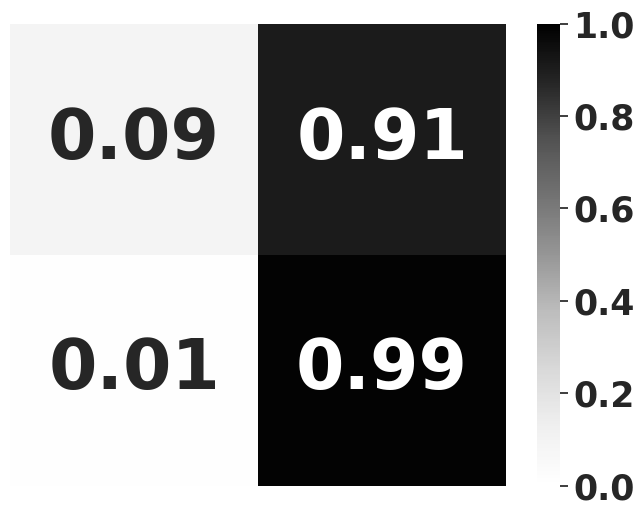

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd'] and RF
142


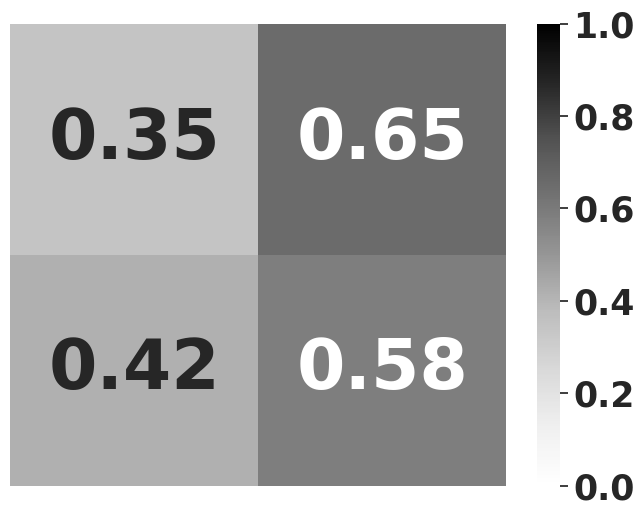

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd'] and KNN
142


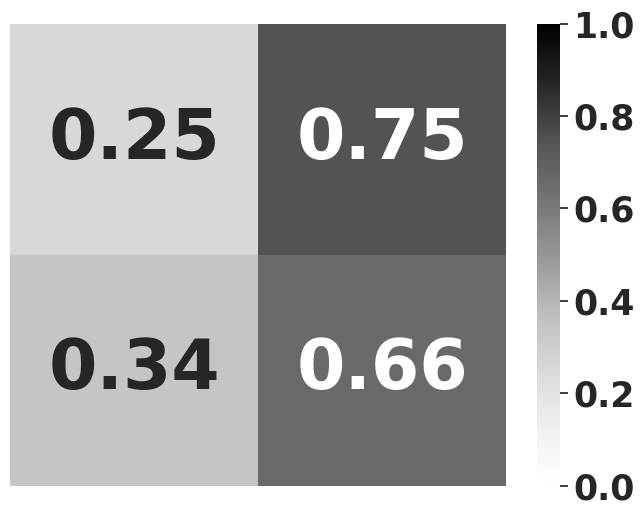

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd'] and SVM
142


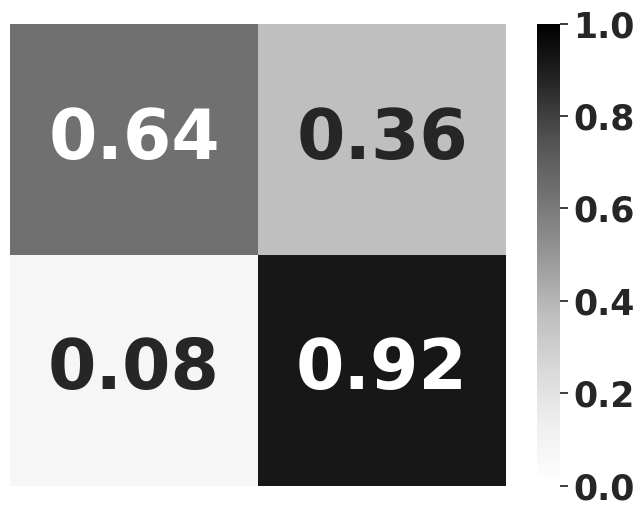

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd'] and RF
142


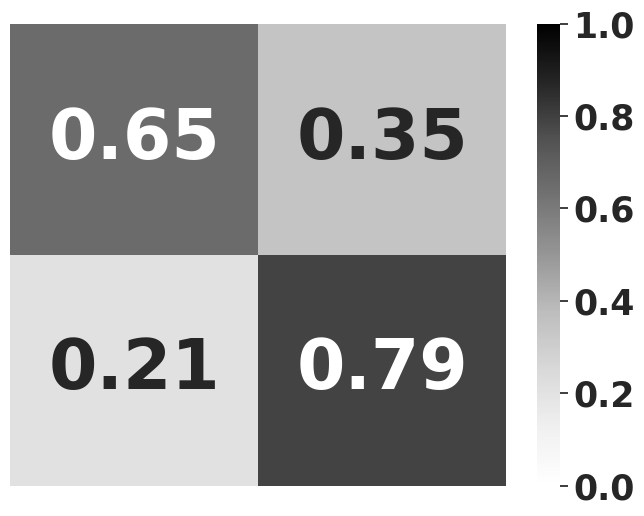

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd'] and KNN
142


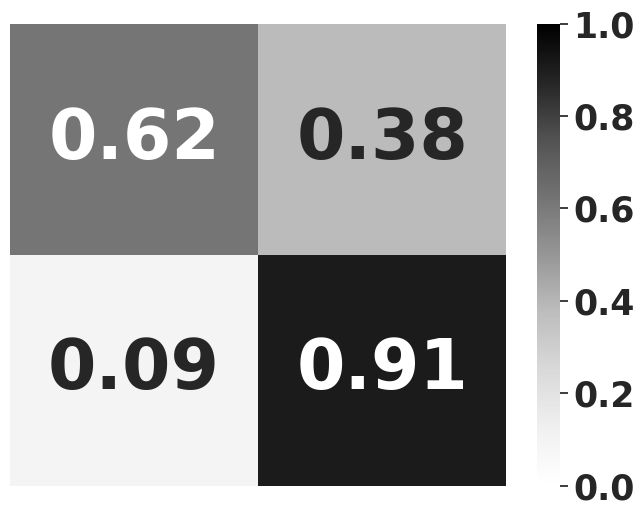

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd'] and SVM
142


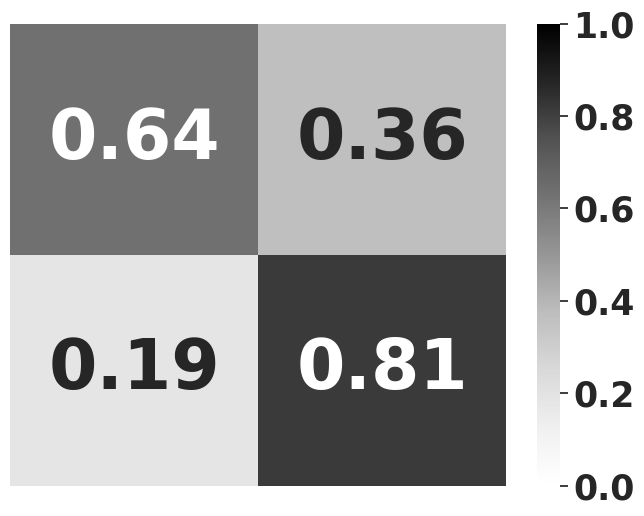

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd'] and RF
142


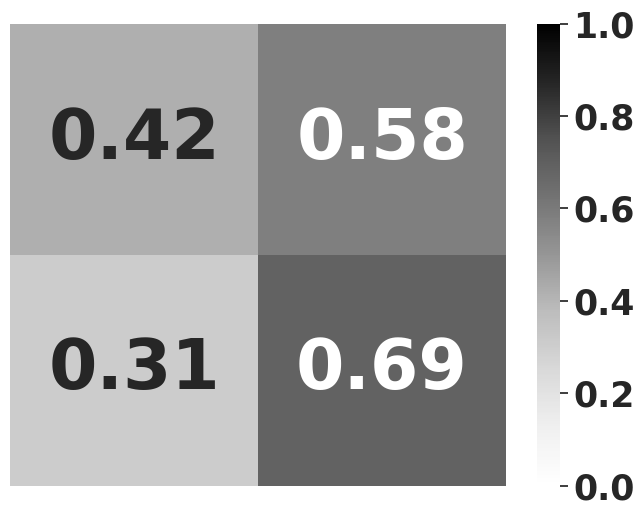

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd'] and KNN
142


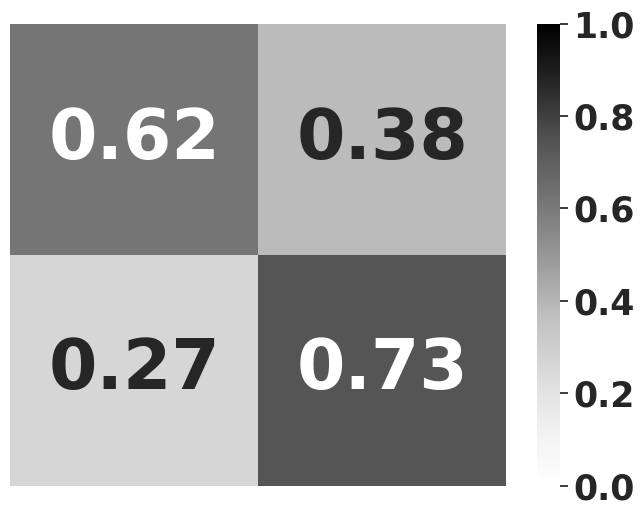

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd'] and SVM
142


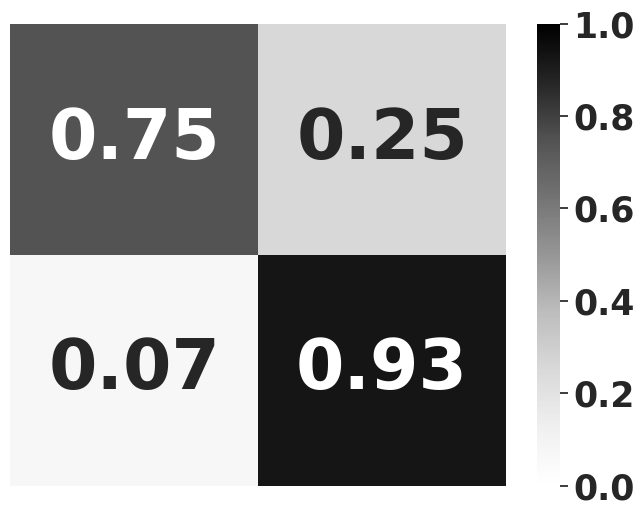

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd'] and RF
142


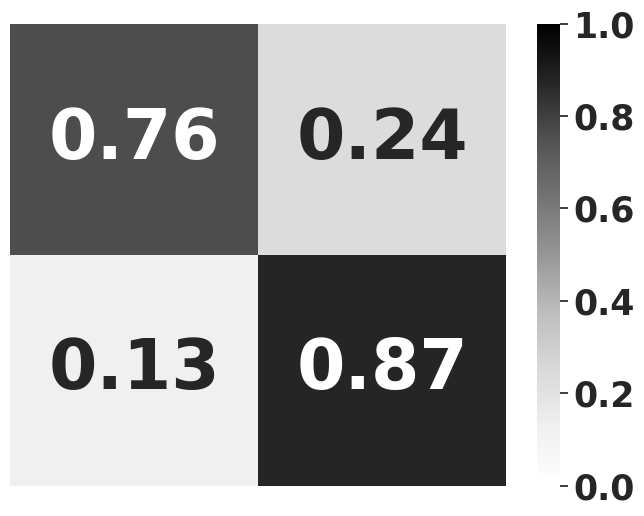

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd'] and KNN
142


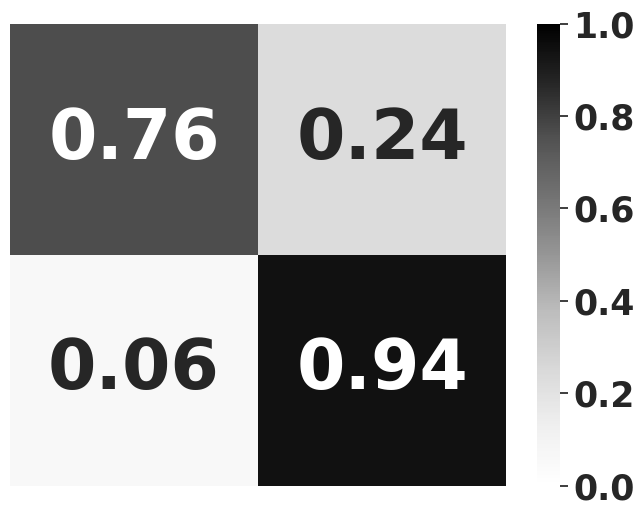

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd'] and SVM
142


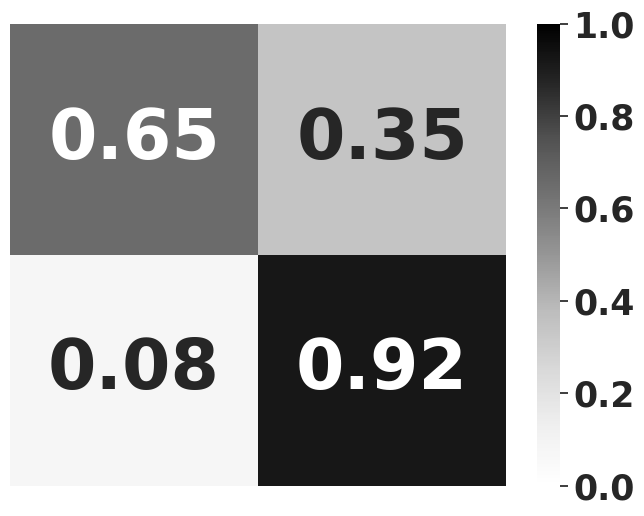

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd'] and RF
142


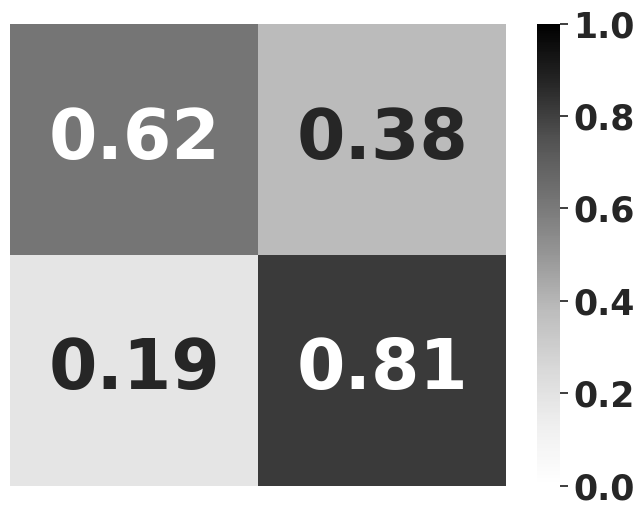

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd'] and KNN
142


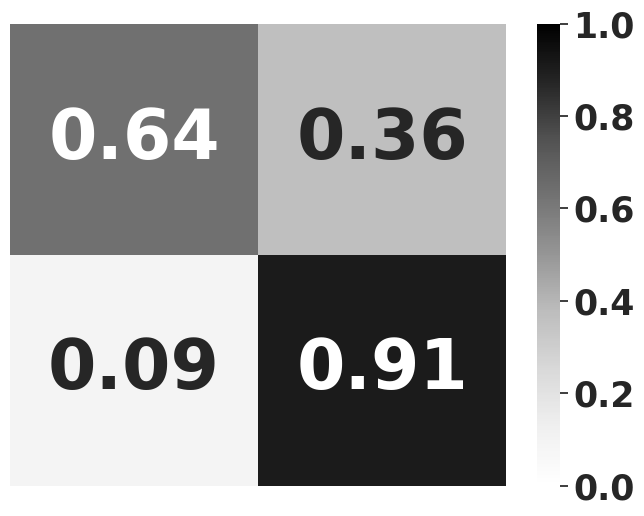

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd'] and SVM
142


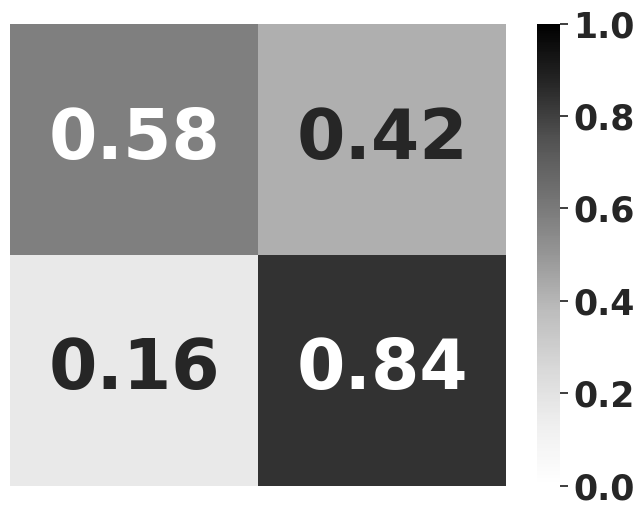

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd'] and RF
142


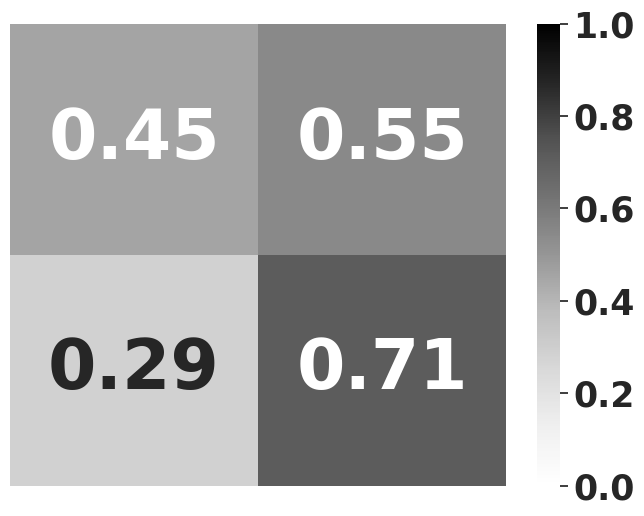

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd'] and KNN
142


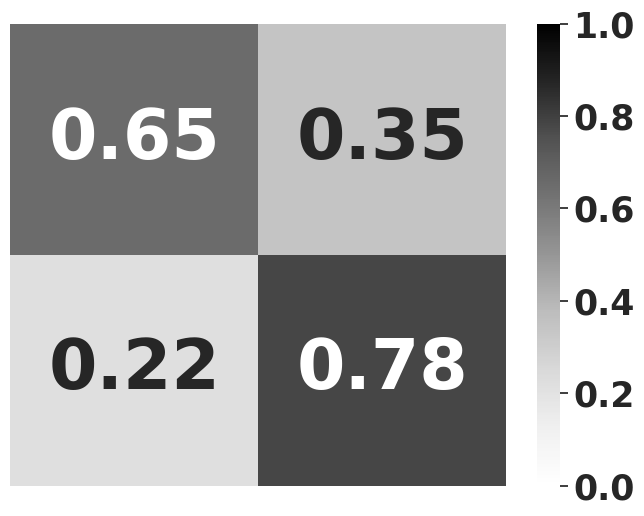

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd'] and SVM
142


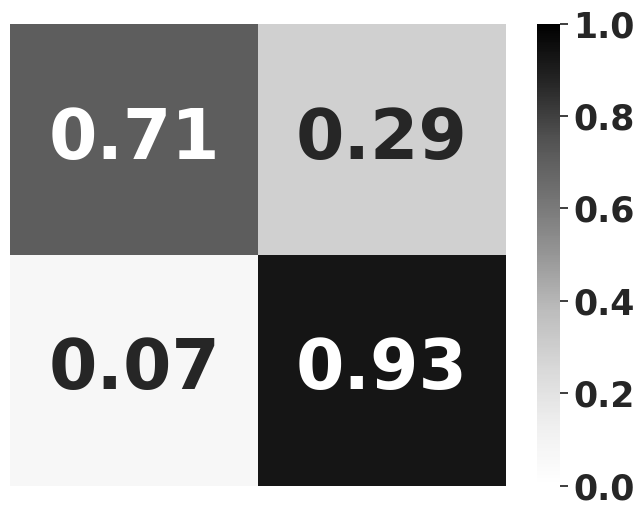

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd'] and RF
142


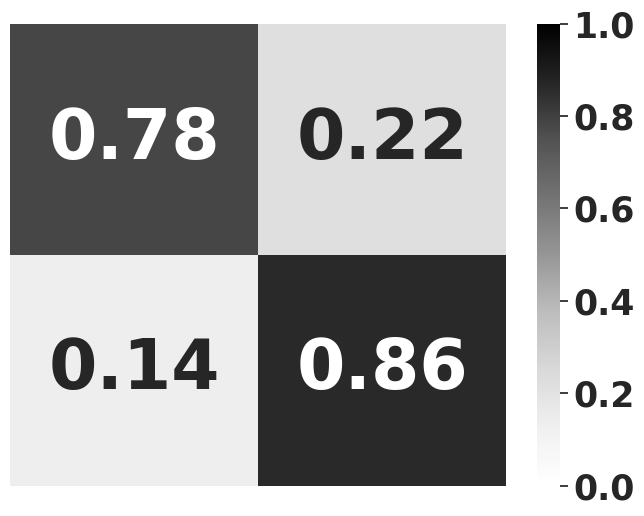

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd'] and KNN
142


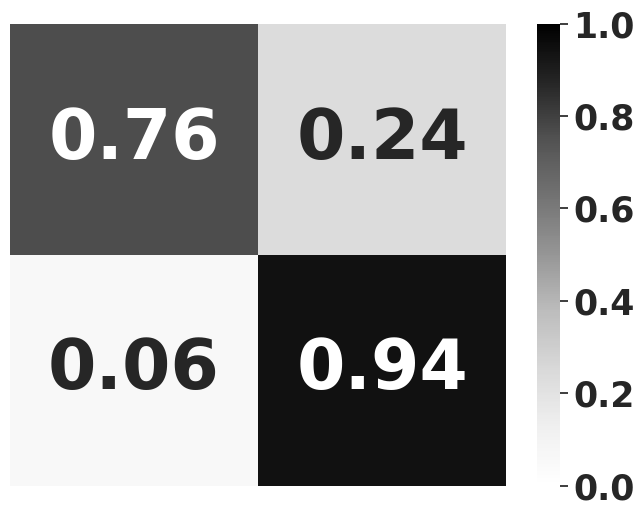

----------------------------------------------------------------------


In [51]:
# IDH - All models - FD
for i in lst1:
    for j, k in name_classifier.items():
        print('-' *70)
        print("for",i, 'and', k)
        X = df1[i]
        X = np.array(X).reshape((-1,len(i)))
    
        Y = df1[['IDH_status']]
        print(len(df1))
    
        y = Y == 'WT'
        y = np.array(Y)
        cv = StratifiedKFold(n_splits=5)
        classifier = j
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
    
        accuracy_model = []
        confusion_norm = []
        confusion_raw = []
        
        fig = plt.figure(figsize=(8, 6)) 
        # ax1 = fig.add_subplot(2, 1, 1)
        ax2 = fig.add_subplot(1, 1, 1)
        for fold, (train, test) in enumerate(cv.split(X, y)):
            classifier.fit(X[train], y[train])
            viz = RocCurveDisplay.from_estimator(
                classifier,
                X[test],
                y[test],
                lw=0,
                ax=ax1,
            )
            viz.line_.set_label("")
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)
            y_pred=classifier.predict(X[test])
            
            accuracy = accuracy_score(y[test],y_pred)
            confusion = confusion_matrix(y[test],y_pred)
            confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
                                
            accuracy_model.append(accuracy)
            confusion_norm.append(confusion_accuracy)
            confusion_raw.append(confusion)
                   
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax1.plot(
            mean_fpr,
            mean_tpr,
            color="b",
            label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )
        
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax1.fill_between(
            mean_fpr,
            tprs_lower,
            tprs_upper,
            color="grey",
            alpha=0.2,
            label=r"$\pm$ 1 std. dev.",
        )
        
        ax1.set(
            xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            xlabel="",
            ylabel="",
            title=f"",
        )
        ax1.axis("square")
        ax1.legend(loc="lower right")
        rc("axes", linewidth=1.5)
    
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)
    
        plt.ylim(0,1)
        plt.xlim(0,1)
    
        ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
        ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
        
        legend_font = {'size': 15, 'weight': 'normal'}  
        ax1.legend(loc="lower right", prop=legend_font)
    
        

        confusion_avg = avg_confusion_calculate(confusion_norm)

        '''---------------- To print accuracy, confusion matrices text --------------------'''
        # print(f"accuracy of {j}:", accuracy_model)
        # print("Average accuracy of model: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
        # print("Confusion matrix raw:","\n", confusion_raw)
        # print("Confusion matrix normalised:","\n", np.array(confusion_norm))        
        # print("average Confusion Matrix:","\n", confusion_avg)
        '''--------------------------------------------------------------------------------'''
        
        #text extraction
        results = []
        name = r"Mean Acc. of %s:%0.2f, StD:%0.2f" % (k, np.mean(accuracy_model), np.std(accuracy_model))
        result_label = r"%s" % (i)
        num_subjects = r'N: %i' % (len(df1))
        results.append([result_label, name, str(num_subjects)])
        
        with open(result_file_idh_fd, 'a') as file:
            for result in results:
               file.write(", ".join(result) + "\n")

        
        #Confusion matrix plot
        ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Greys',linecolor='white', 
                        annot=True, linewidths = 0,xticklabels=["", ""],
                        yticklabels=["", ""],annot_kws={'size': 50, 'weight': 'bold'}, fmt = '.2f')
        sns.set(font_scale=20)
        sns.set (rc = {'figure.figsize':(6,6)})
        
        plt.yticks(rotation=0) 
        ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
        ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
        
        cbar = ax2.collections[0].colorbar
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25, weight='bold')
        # sns.set(font_scale=2) 
                
        ax2.get_figure().savefig(save_path_idh_fd + str(i) + '_idh_' +  k + '_Confusion.tiff', dpi=300)
        
        plt.show()
        print('-' *70)

## IDH Lacunarity

----------------------------------------------------------------------
for ['et_meanlac']
122


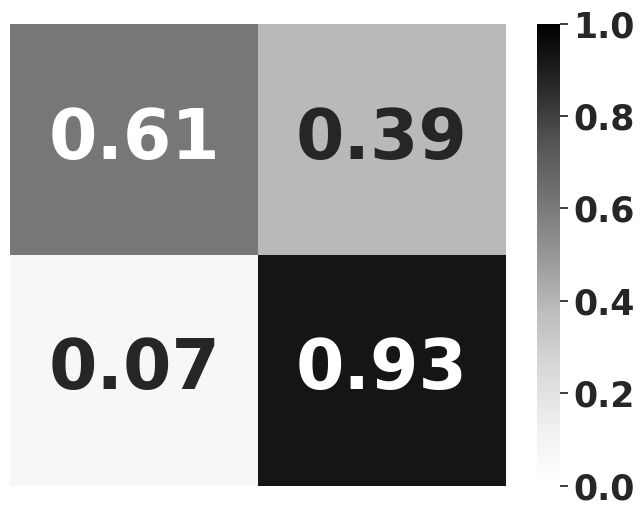

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac']
122


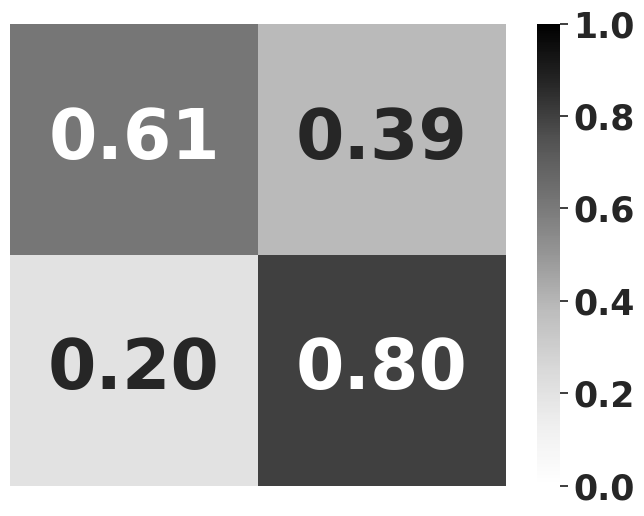

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac']
122


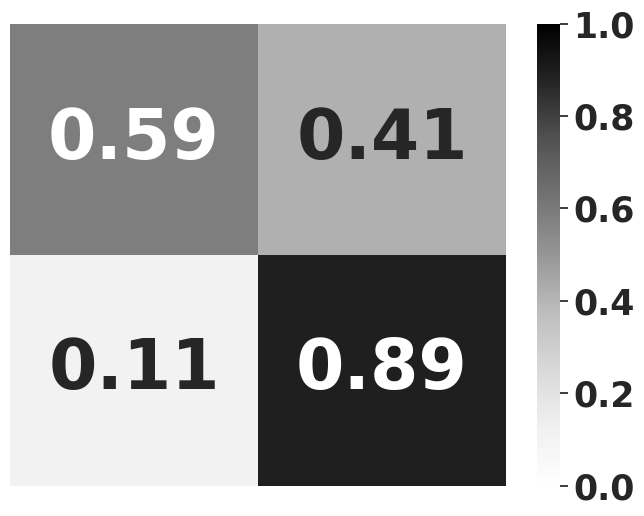

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
142


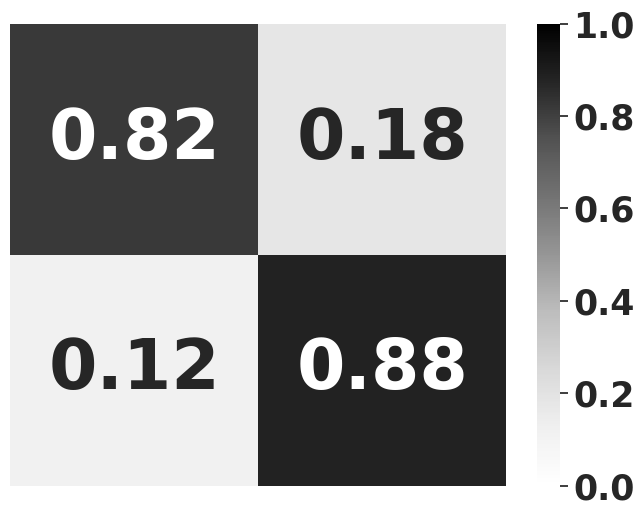

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
142


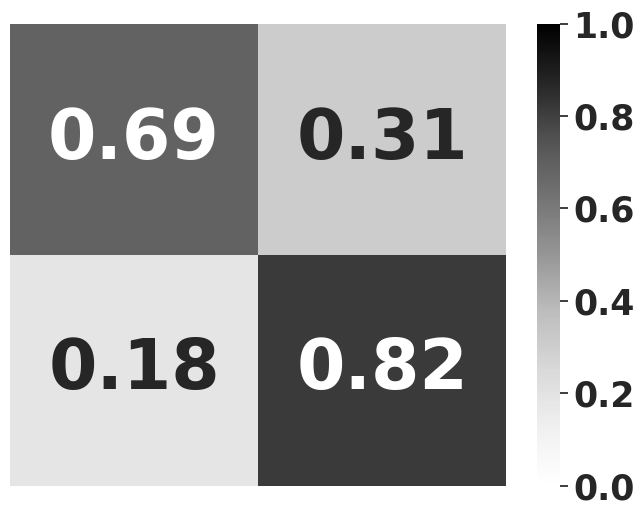

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
142


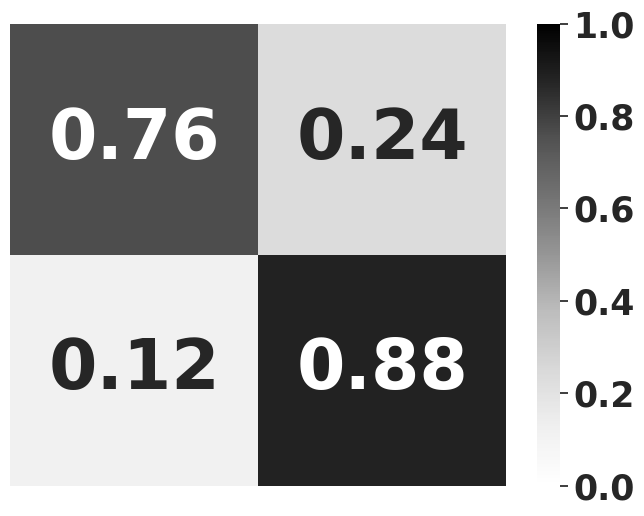

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
141


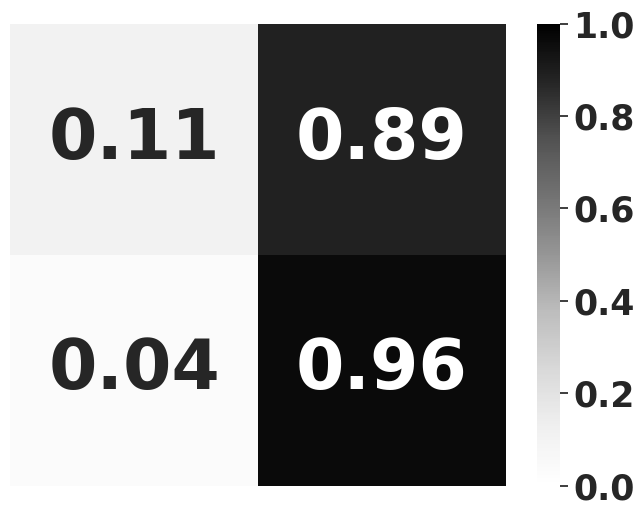

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
141


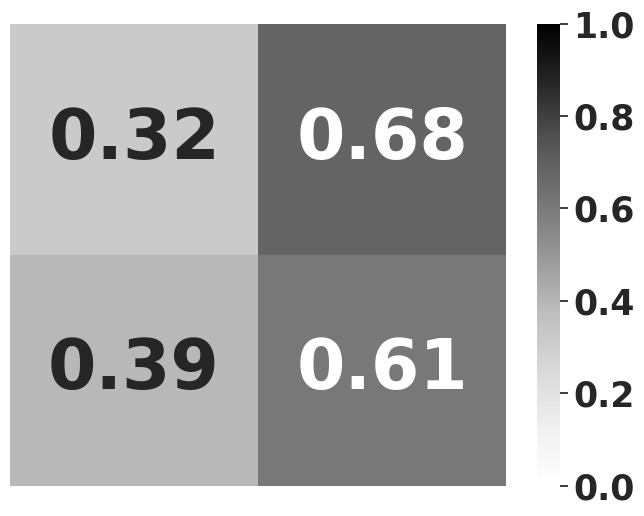

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
141


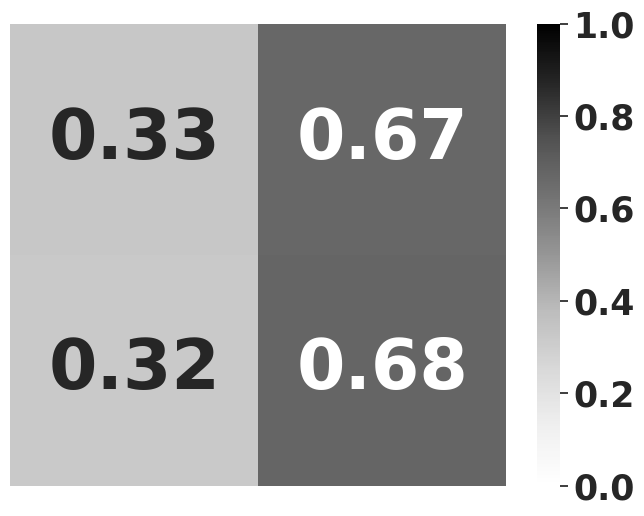

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
122


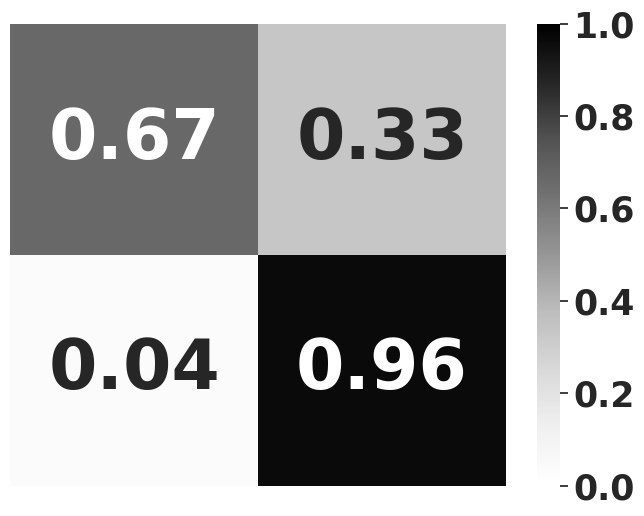

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
122


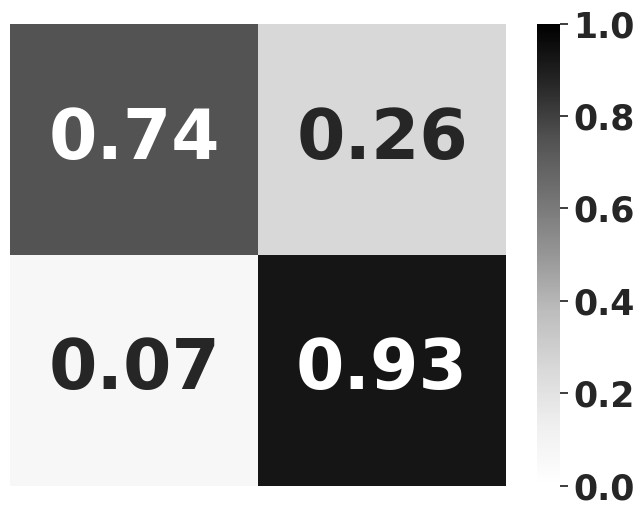

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
122


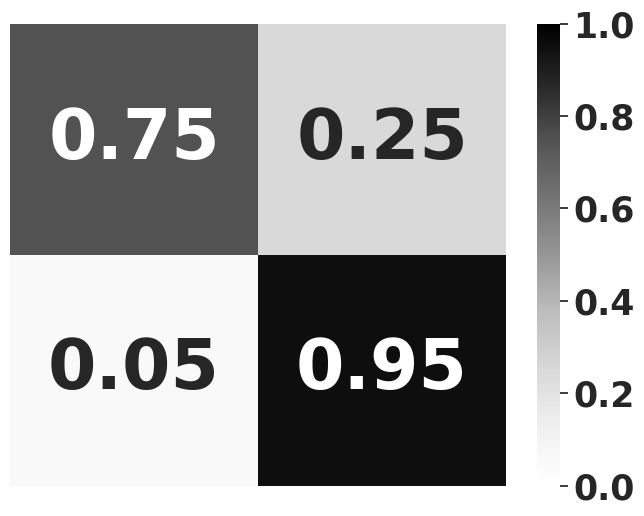

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
121


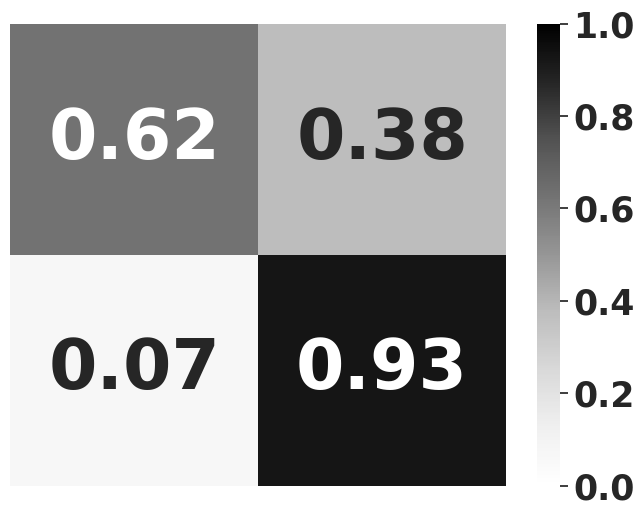

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
121


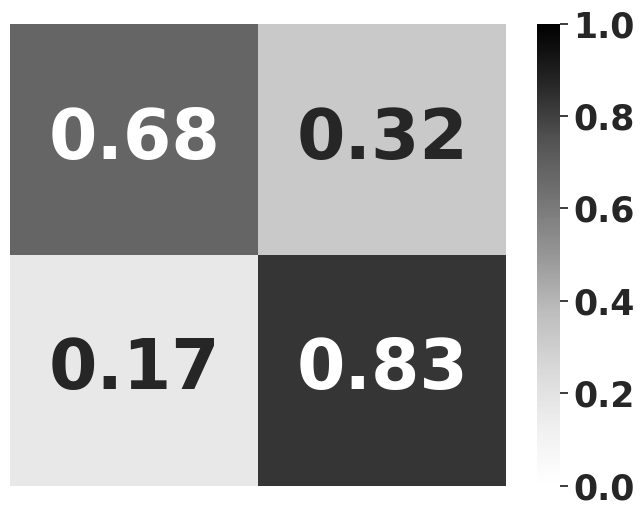

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
121


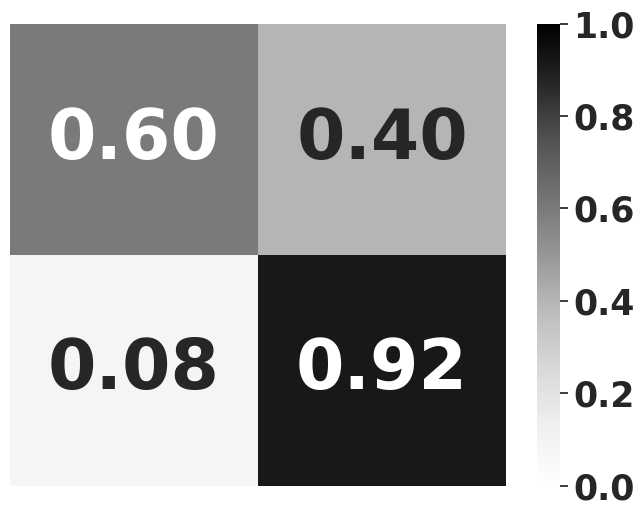

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
141


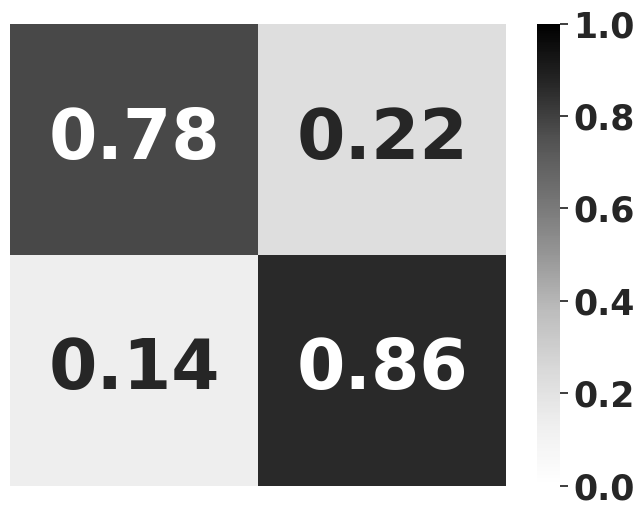

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
141


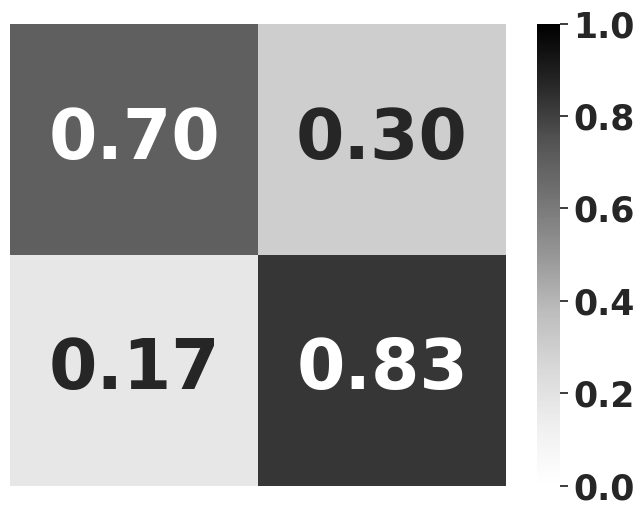

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
141


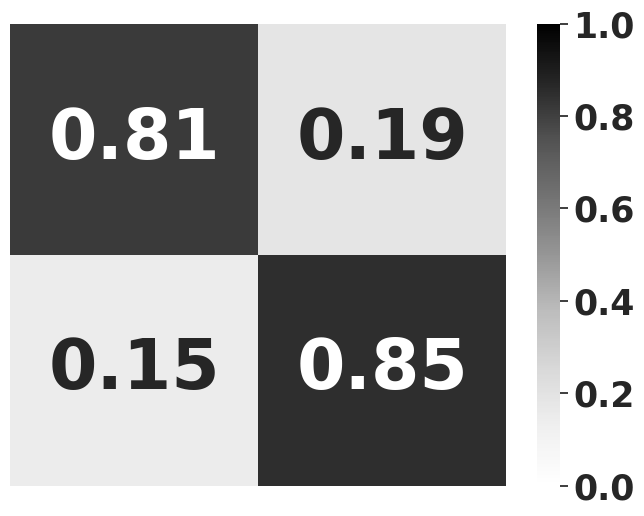

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
121


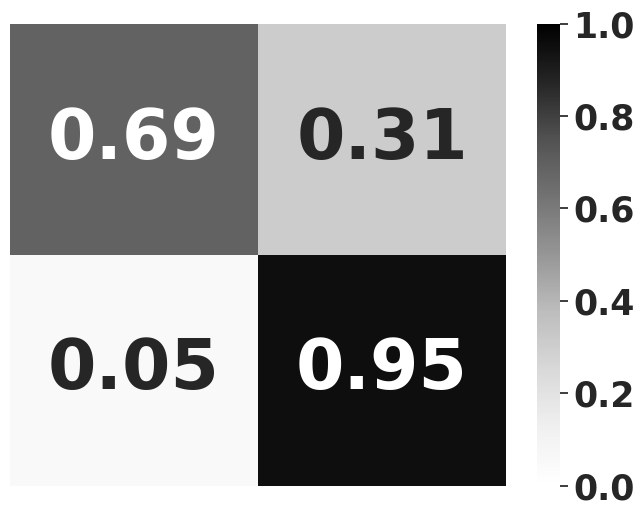

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
121


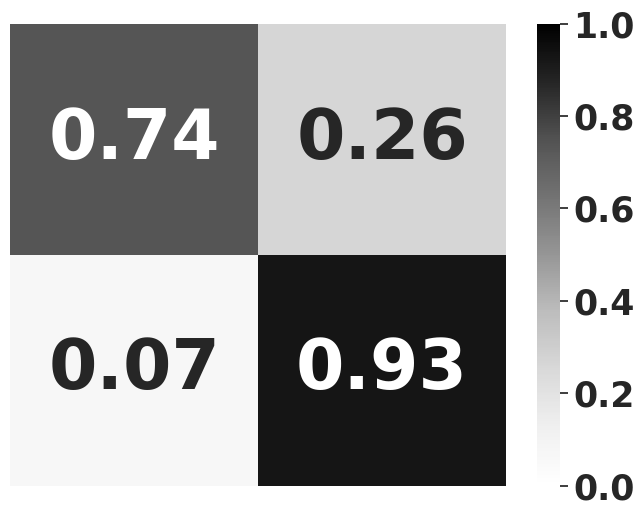

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
121


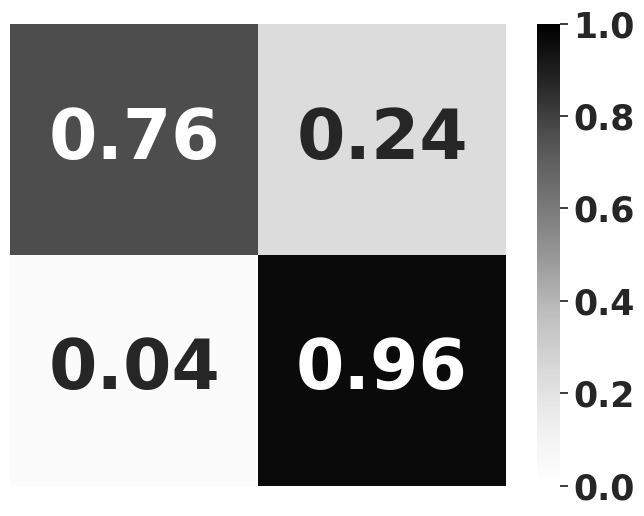

----------------------------------------------------------------------


In [52]:
# IDH - All models - Lac
for i in lst2:
    for j, k in name_classifier.items():
        print('-' *70)
        print("for",i)
        df3 = df1.dropna(subset=i)
        X = df3[i]
        X = np.array(X).reshape((-1,len(i)))
    
        Y = df3[['IDH_status']]
        print(len(df3))
    
        y = Y == 'WT'
        y = np.array(Y)
        cv = StratifiedKFold(n_splits=5)
        classifier = j
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
    
        accuracy_model = []
        confusion_norm = []
        confusion_raw = []
        
        fig = plt.figure(figsize=(8, 6))
        # ax1 = fig.add_subplot(2, 1, 1)
        ax2 = fig.add_subplot(1, 1, 1)
        for fold, (train, test) in enumerate(cv.split(X, y)):
            classifier.fit(X[train], y[train])
            viz = RocCurveDisplay.from_estimator(
                classifier,
                X[test],
                y[test],
                lw=0,
                ax=ax1,
            )
            viz.line_.set_label("")
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)
            y_pred=classifier.predict(X[test])
            
            accuracy = accuracy_score(y[test],y_pred)
            confusion = confusion_matrix(y[test],y_pred)
            confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
                
                
            accuracy_model.append(accuracy)
            confusion_norm.append(confusion_accuracy)
            confusion_raw.append(confusion)
            
            
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax1.plot(
            mean_fpr,
            mean_tpr,
            color="b",
            label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )
        
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax1.fill_between(
            mean_fpr,
            tprs_lower,
            tprs_upper,
            color="grey",
            alpha=0.2,
            label=r"$\pm$ 1 std. dev.",
        )
        
        ax1.set(
            xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            xlabel="",
            ylabel="",
            title=f"",
        )
        ax1.axis("square")
        ax1.legend(loc="lower right")
        rc("axes", linewidth=1.5)
    
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)
    
        plt.ylim(0,1)
        plt.xlim(0,1)
    
        ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
        ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
        
        legend_font = {'size': 15, 'weight': 'normal'}  
        ax1.legend(loc="lower right", prop=legend_font)
    
        #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
       
        confusion_avg = avg_confusion_calculate(confusion_norm)

        '''---------------- To print accuracy, confusion matrices text --------------------'''
        # print(f"accuracy of {j}:", accuracy_model)
        # print("Average accuracy of model: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
        # print("Confusion matrix raw:","\n", confusion_raw)
        # print("Confusion matrix normalised:","\n", np.array(confusion_norm))        
        # print("average Confusion Matrix:","\n", confusion_avg)
        '''--------------------------------------------------------------------------------'''

        #text extraction
        results = []
        name = r"Mean Acc. of %s:%0.2f, StD:%0.2f" % (k, np.mean(accuracy_model), np.std(accuracy_model))
        result_label = r"%s" % (i)
        num_subjects = r'N: %i' % (len(df3))
        results.append([result_label, name, str(num_subjects)])
        
        with open(result_file_idh_lac, 'a') as file:
            for result in results:
               file.write(", ".join(result) + "\n")

        
        #Confusion matrix plot
        ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Greys',linecolor='white', 
                        annot=True, linewidths = 0,xticklabels=["", ""],
                        yticklabels=["", ""],annot_kws={'size': 50, 'weight': 'bold'}, fmt = '.2f')
        sns.set(font_scale=20)
        sns.set (rc = {'figure.figsize':(6,6)})
        
        plt.yticks(rotation=0) 
        ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
        ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
        
        cbar = ax2.collections[0].colorbar
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25, weight='bold')
        
        ax2.get_figure().savefig(save_path_idh_lac + str(i) + '_idh_' +  k + '_Confusion.tiff', dpi=300)
    
        plt.show()
        print('-' *70)


## MGMT fractal dimension

----------------------------------------------------------------------
for ['ed_meanfd']
119


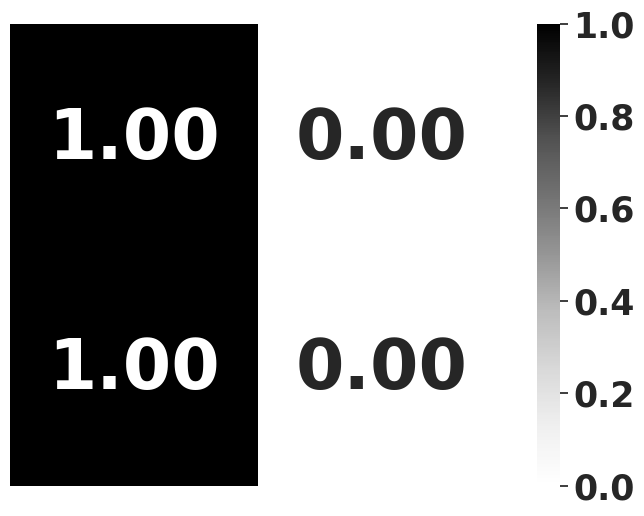

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd']
119


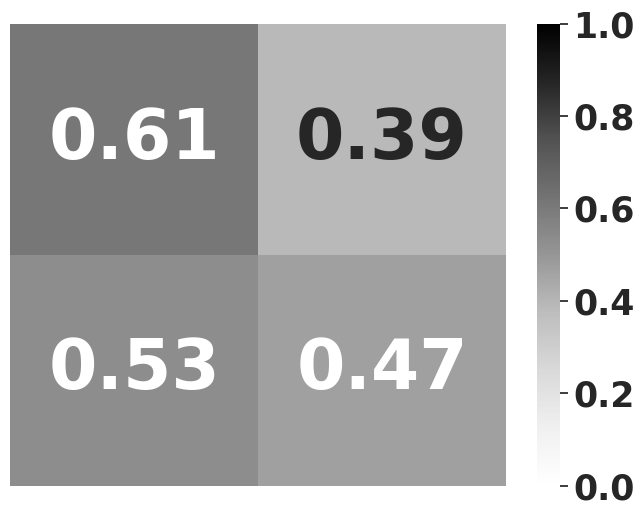

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd']
119


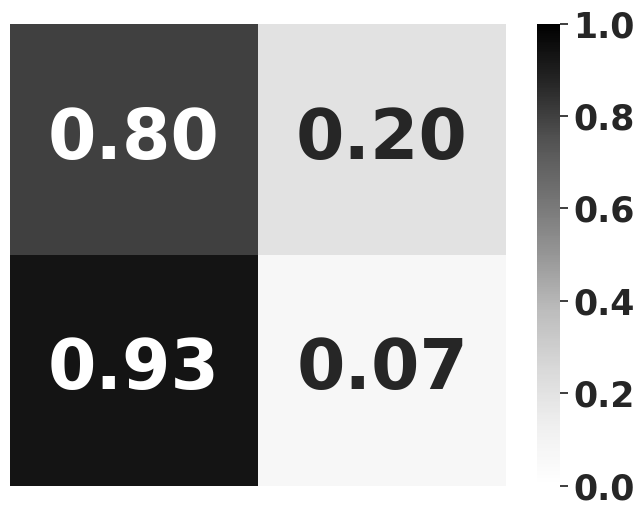

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd']
119


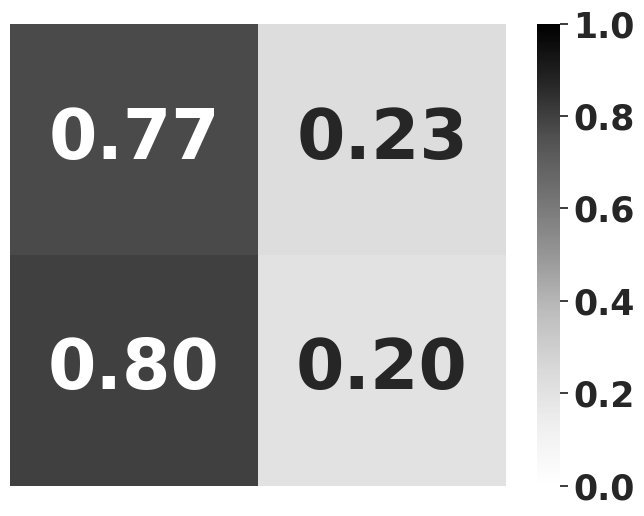

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd']
119


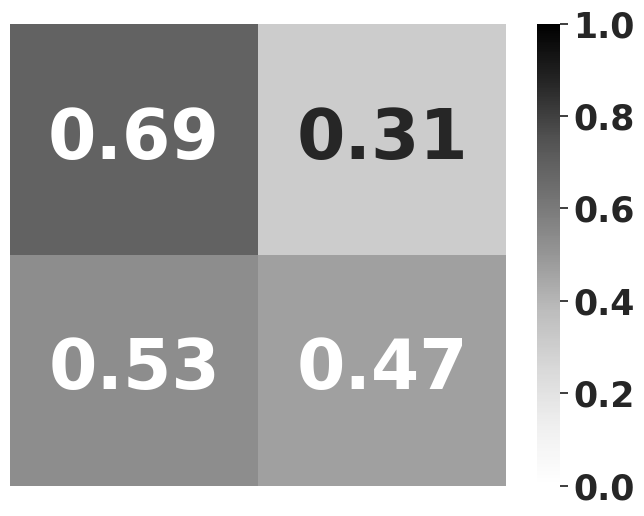

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd']
119


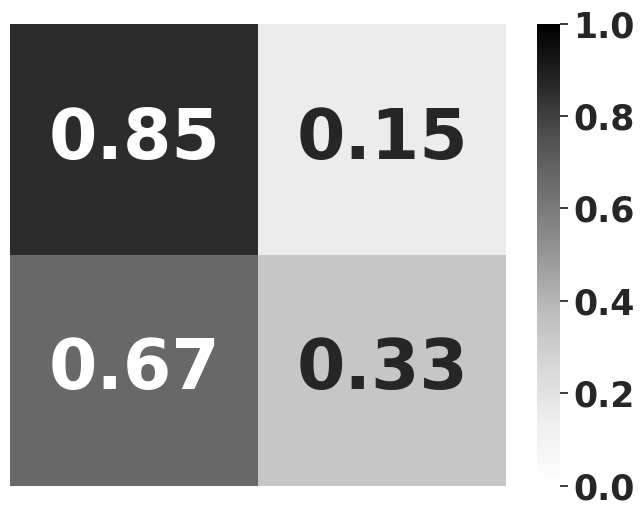

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd']
119


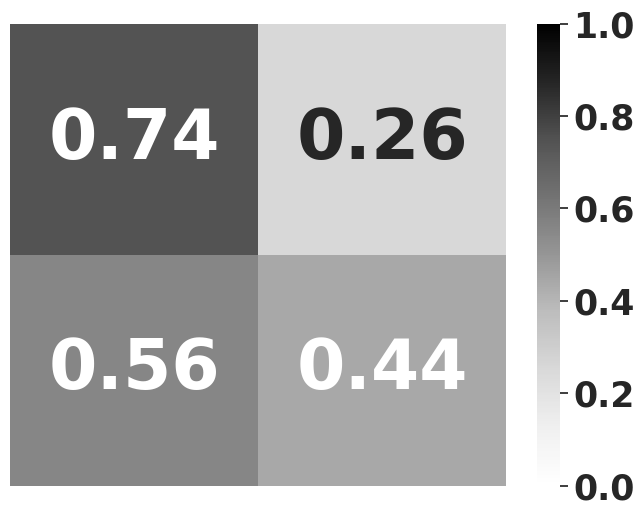

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd']
119


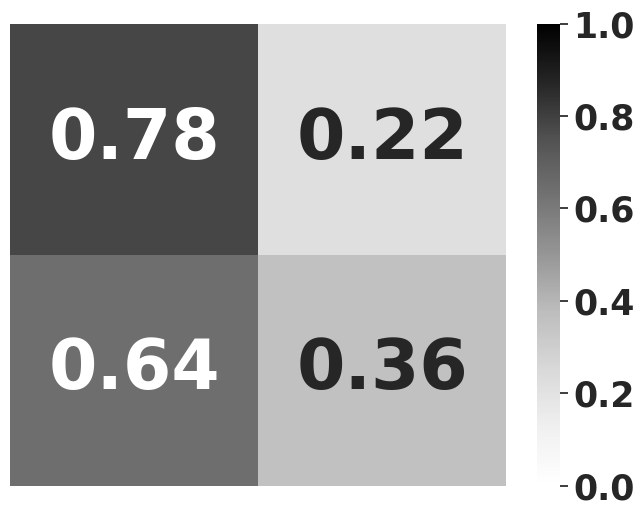

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd']
119


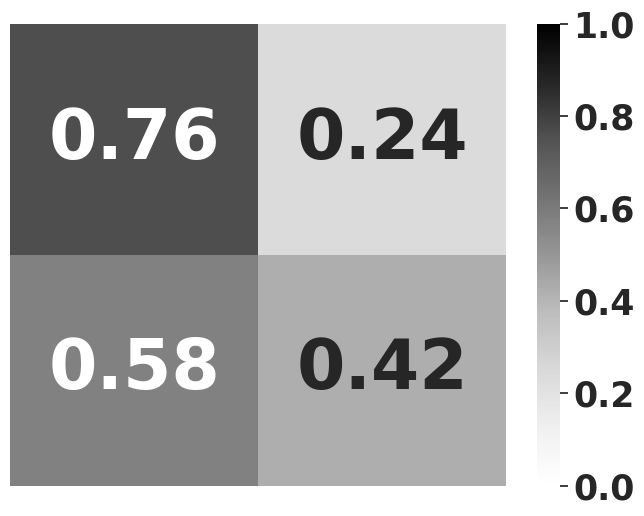

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd']
119


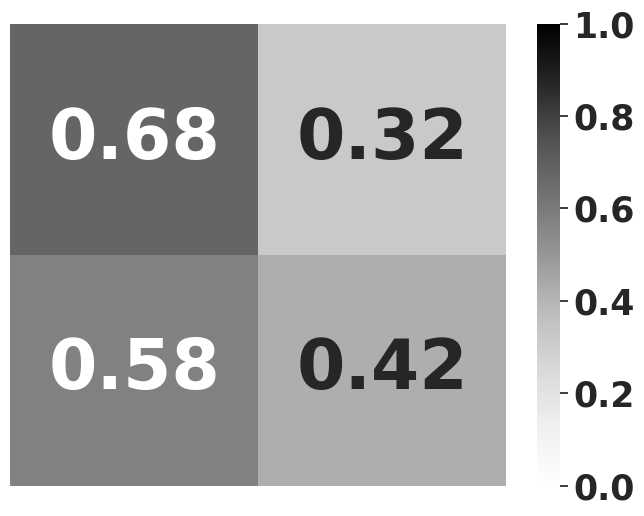

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd']
119


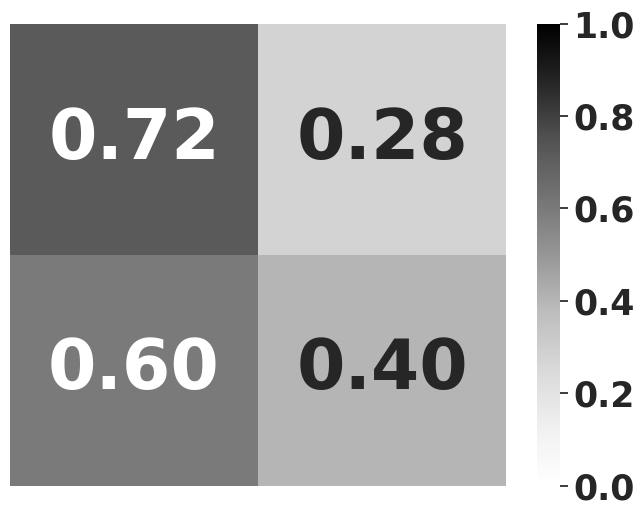

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd']
119


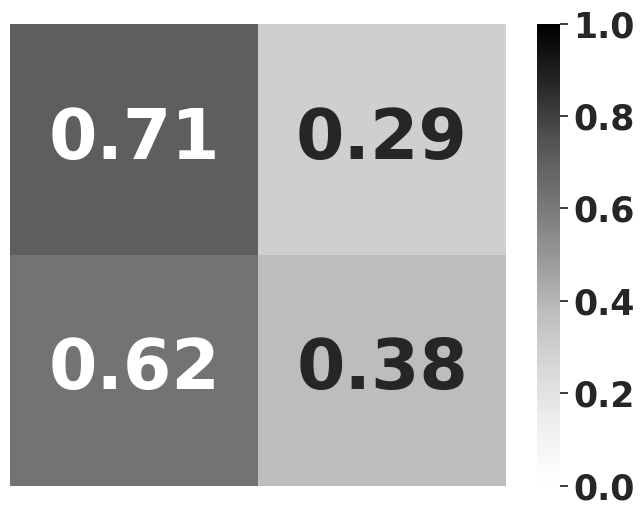

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd']
119


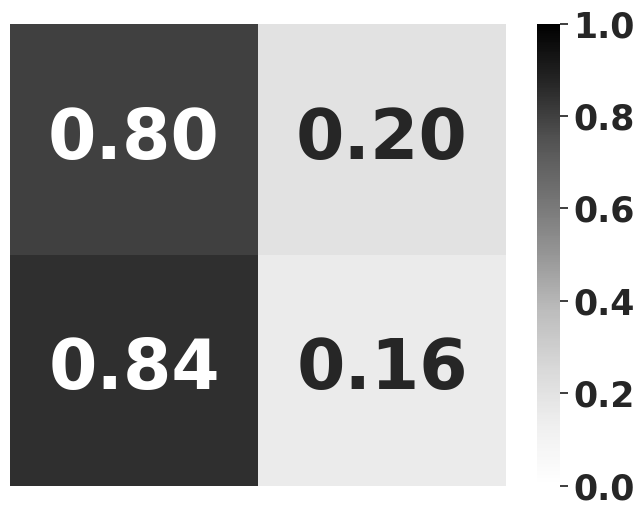

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd']
119


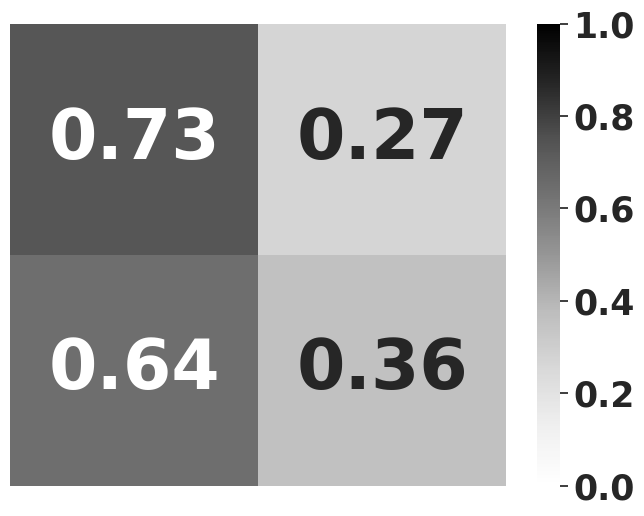

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd']
119


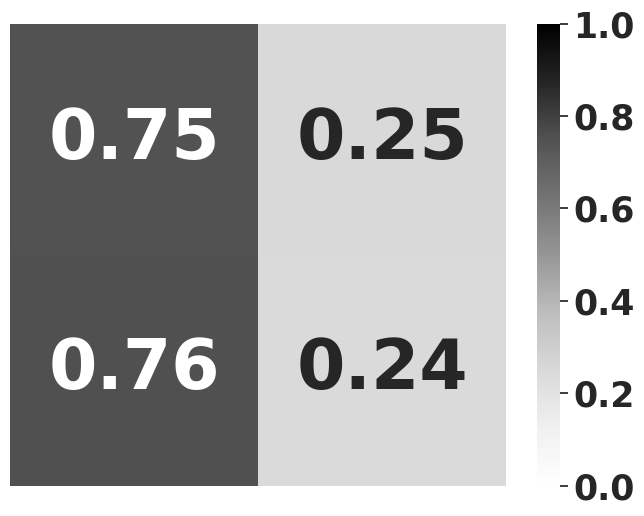

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd']
119


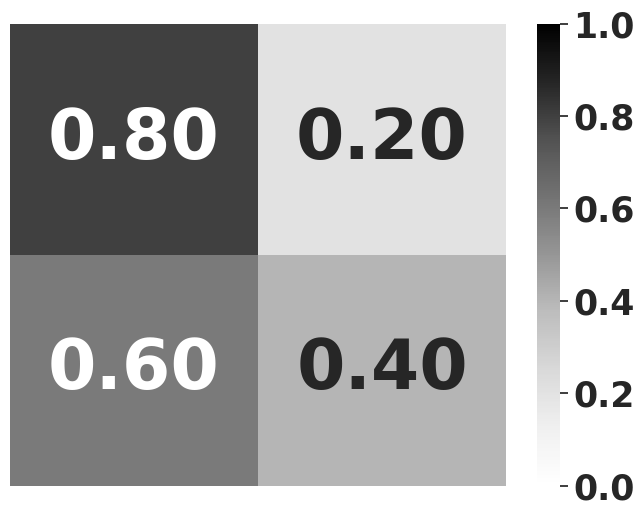

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd']
119


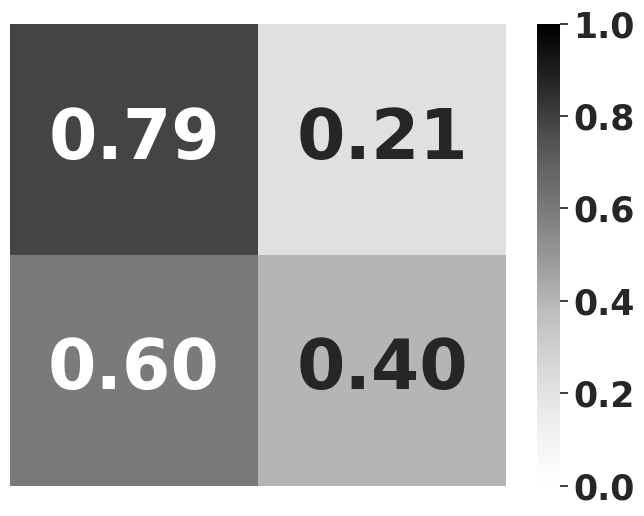

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd']
119


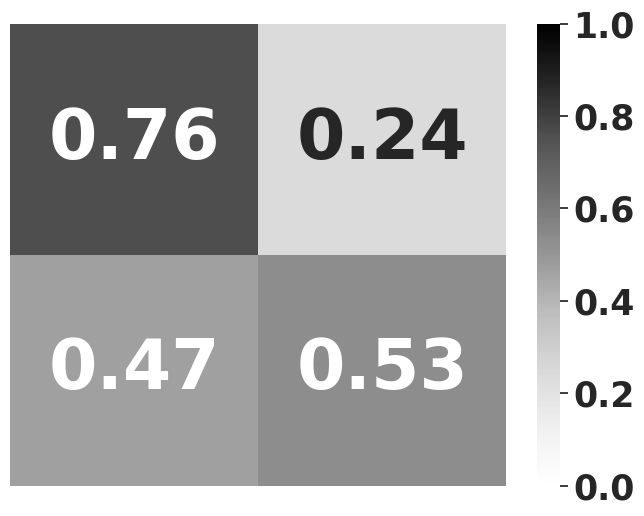

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd']
119


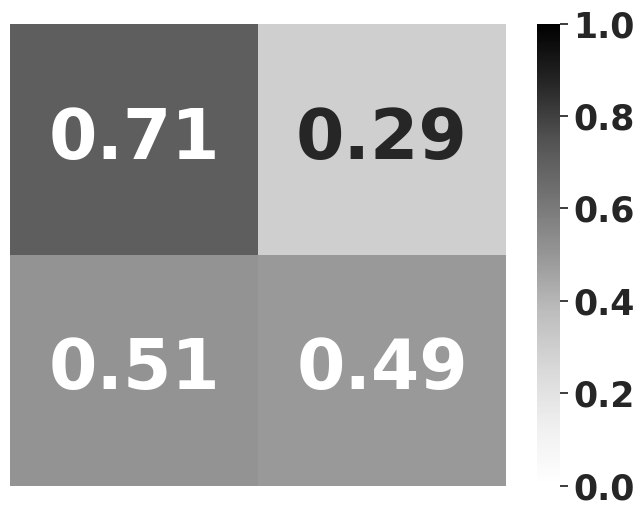

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd']
119


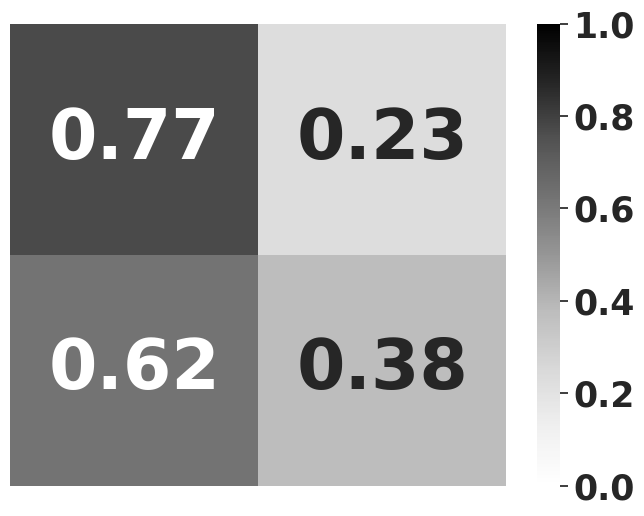

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd']
119


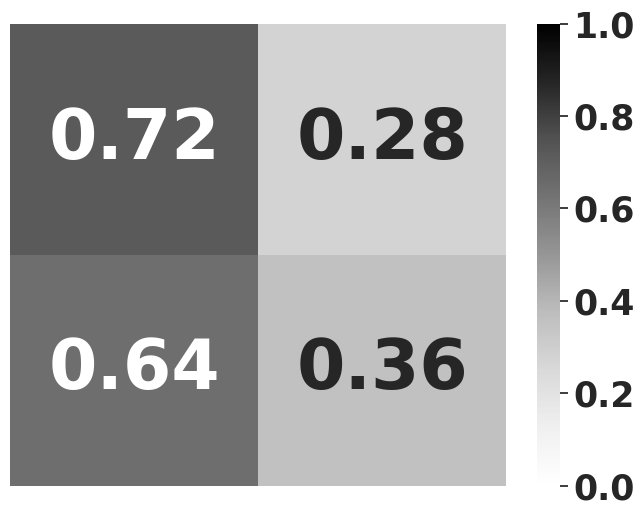

----------------------------------------------------------------------


In [53]:
# MGMT - All models - FD
for i in lst1:
    for j, k in name_classifier.items():
        print('-' *70)
        print("for",i)
        X = df2[i]
        X = np.array(X).reshape((-1,len(i)))
    
        Y = df2[['MGMT_promoter_status']]
        print(len(df2))
        
        # print(np.unique(Y, return_counts=True))
    
        y = Y == 'Meth'
        y = np.array(Y)
        cv = StratifiedKFold(n_splits=5)
        classifier = j
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
    
        accuracy_model = []
        confusion_norm = []
        confusion_raw = []
        
        fig = plt.figure(figsize=(8, 6))
        # ax1 = fig.add_subplot(2, 1, 1)
        ax2 = fig.add_subplot(1, 1, 1)
        for fold, (train, test) in enumerate(cv.split(X, y)):
            classifier.fit(X[train], y[train])
            viz = RocCurveDisplay.from_estimator(
                classifier,
                X[test],
                y[test],
                lw=0,
                ax=ax1,
            )
            viz.line_.set_label("")
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)
            y_pred=classifier.predict(X[test])
            
            accuracy = accuracy_score(y[test],y_pred)
            confusion = confusion_matrix(y[test],y_pred)
            confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
                
                
            accuracy_model.append(accuracy)
            confusion_norm.append(confusion_accuracy)
            confusion_raw.append(confusion)
                      
            
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax1.plot(
            mean_fpr,
            mean_tpr,
            color="b",
            label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )
        
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax1.fill_between(
            mean_fpr,
            tprs_lower,
            tprs_upper,
            color="grey",
            alpha=0.2,
            label=r"$\pm$ 1 std. dev.",
        )
        
        ax1.set(
            xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            xlabel="",
            ylabel="",
            title=f"",
        )
        ax1.axis("square")
        ax1.legend(loc="lower right")
        rc("axes", linewidth=1.5)
    
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)
    
        plt.ylim(0,1)
        plt.xlim(0,1)
    
        ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
        ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
        
        legend_font = {'size': 15, 'weight': 'normal'}  
        ax1.legend(loc="lower right", prop=legend_font)
    
        #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")

        confusion_avg = avg_confusion_calculate(confusion_norm)

        '''---------------- To print accuracy, confusion matrices text --------------------'''
        # print(f"accuracy of {j}:", accuracy_model)
        # print("Average accuracy of model: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
        # print("Confusion matrix raw:","\n", confusion_raw)
        # print("Confusion matrix normalised:","\n", np.array(confusion_norm))        
        # print("average Confusion Matrix:","\n", confusion_avg)
        '''--------------------------------------------------------------------------------'''
       
        
        #text extraction
        results = []
        name = r"Mean Acc. of %s:%0.2f, StD:%0.2f" % (k, np.mean(accuracy_model), np.std(accuracy_model))
        result_label = r"%s" % (i)
        num_subjects = r'N: %i' % (len(df2))
        results.append([result_label, name, str(num_subjects)])
        
        with open(result_file_mgmt_fd, 'a') as file:
            for result in results:
               file.write(", ".join(result) + "\n")

        
        #Confusion matrix plot
        ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Greys',linecolor='white', 
                        annot=True, linewidths = 0,xticklabels=["", ""],
                        yticklabels=["", ""],annot_kws={'size': 50, 'weight': 'bold'}, fmt = '.2f')
        sns.set(font_scale=20)
        sns.set (rc = {'figure.figsize':(6,6)})
        
        plt.yticks(rotation=0) 
        ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
        ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
        
        cbar = ax2.collections[0].colorbar
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25, weight='bold')
        ax2.get_figure().savefig(save_path_mgmt_fd + str(i) + '_mgmt_' +  k + '_Confusion.tiff', dpi=300)
    
        plt.show()
        print('-' *70)


## MGMT Lacunarity

----------------------------------------------------------------------
for ['et_meanlac']
99


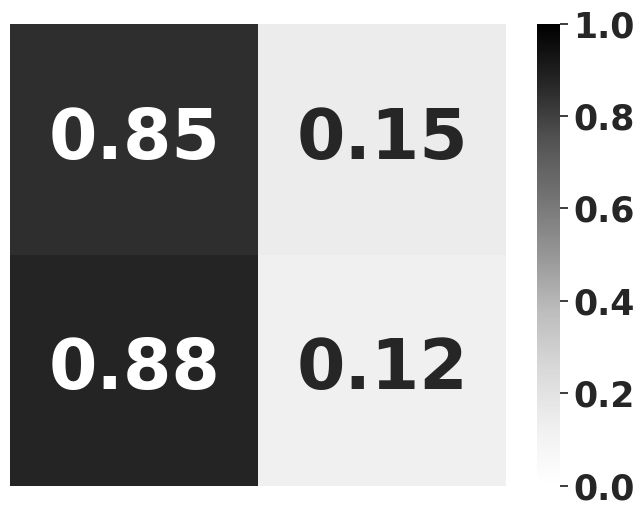

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac']
99


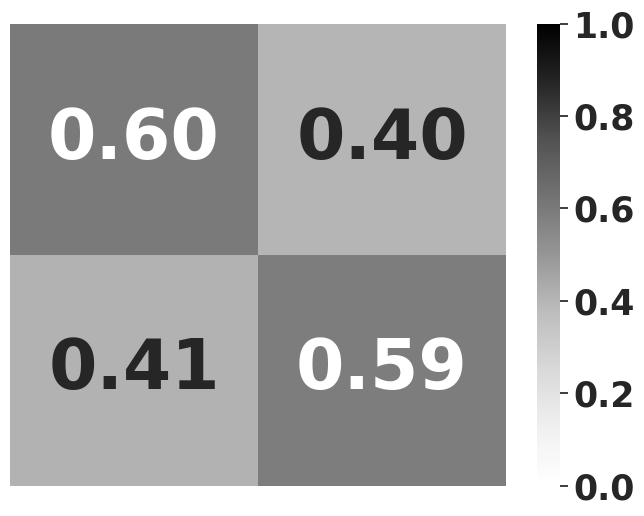

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac']
99


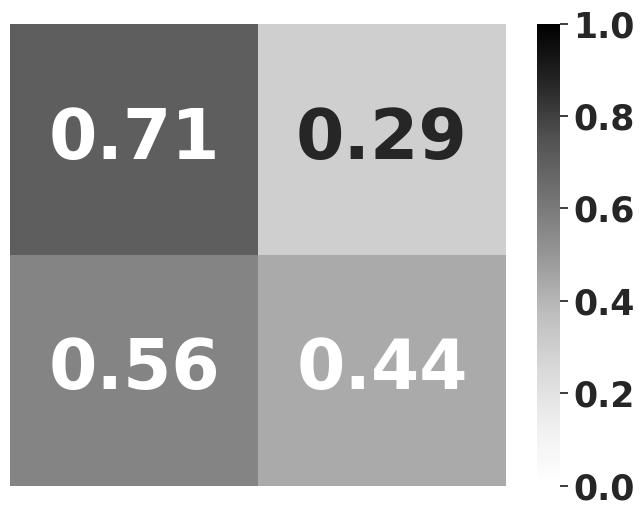

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
119


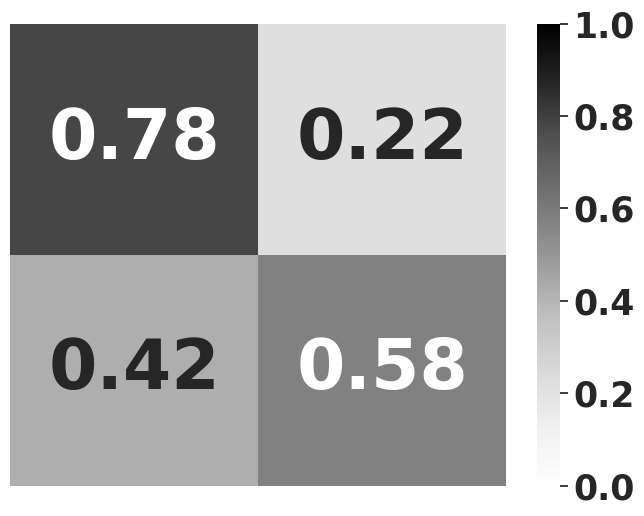

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
119


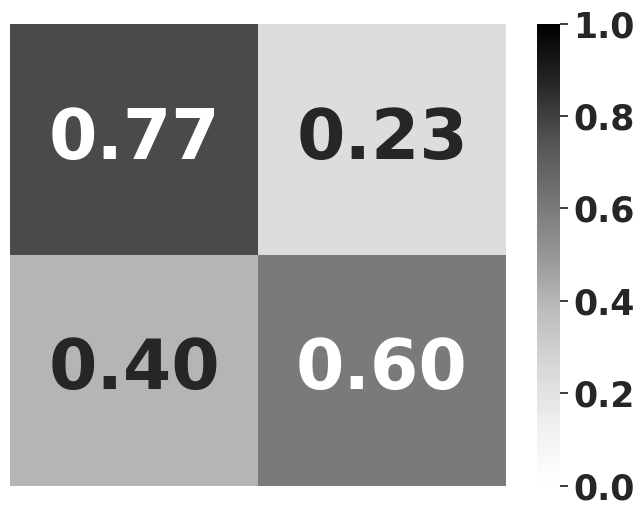

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
119


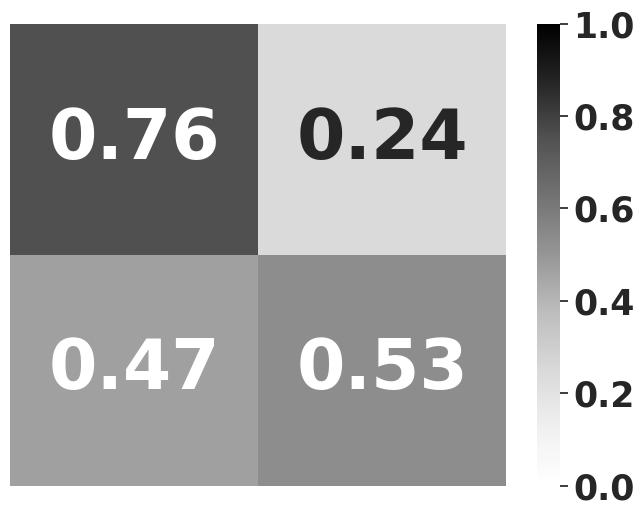

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
118


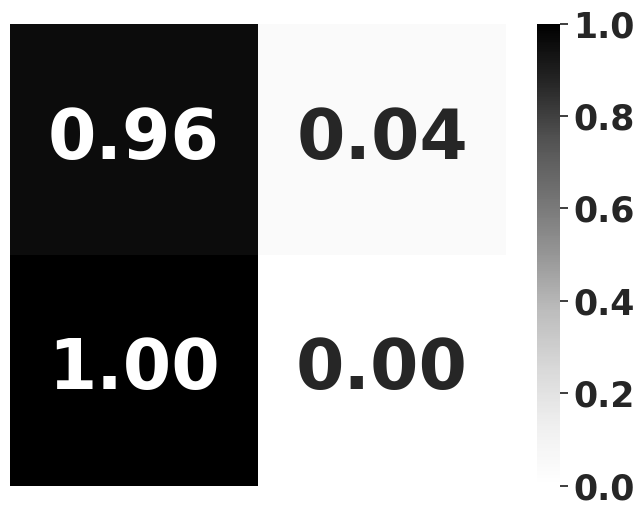

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
118


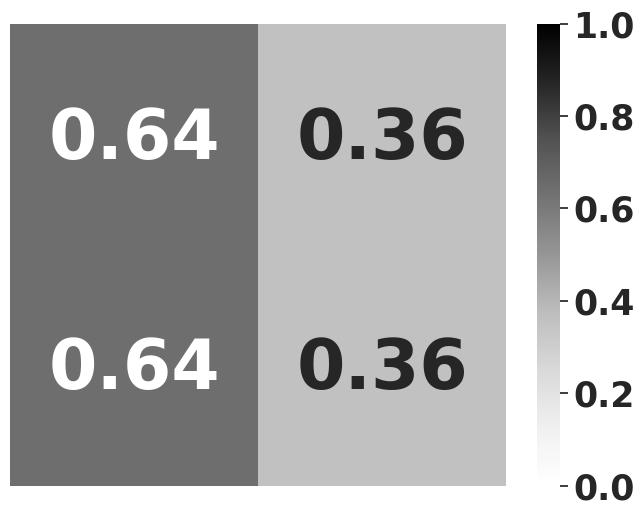

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
118


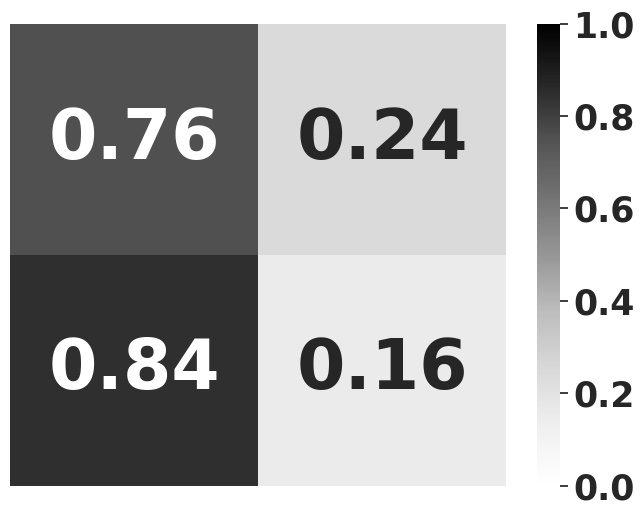

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
99


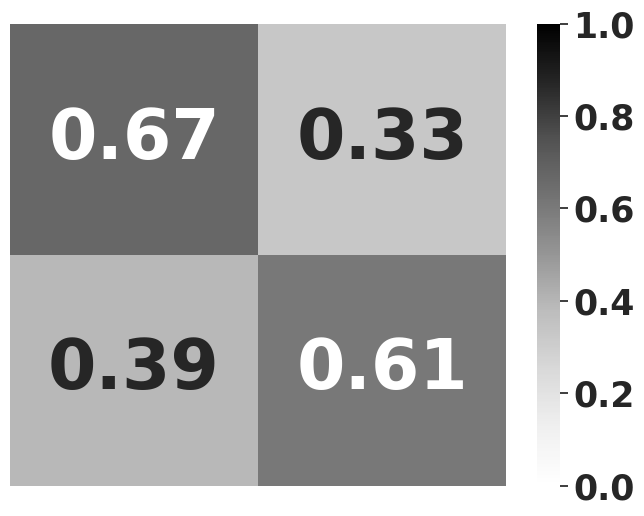

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
99


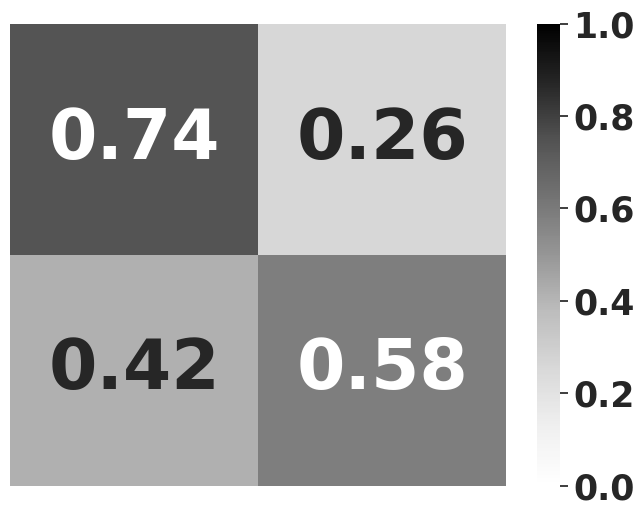

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
99


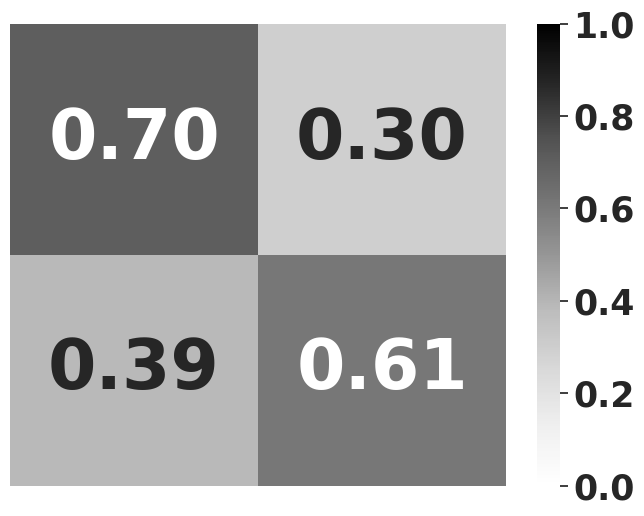

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
98


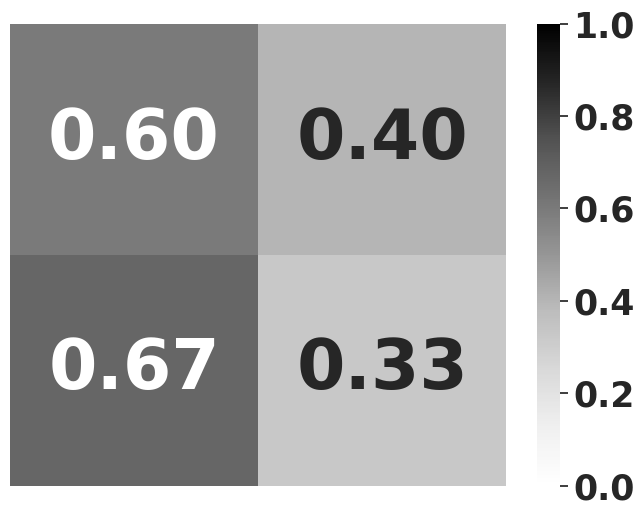

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
98


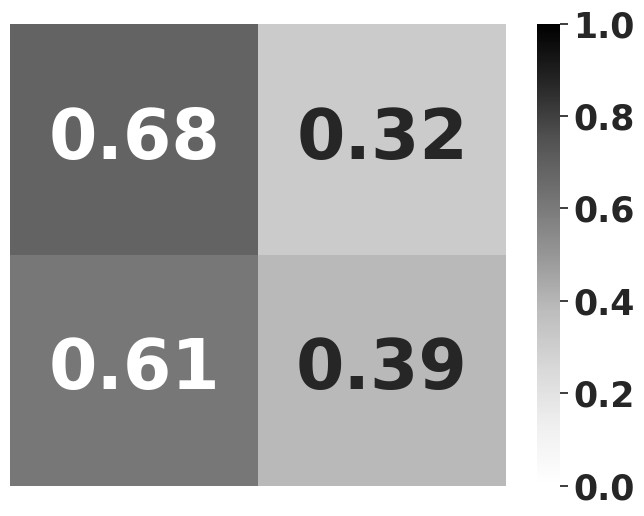

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
98


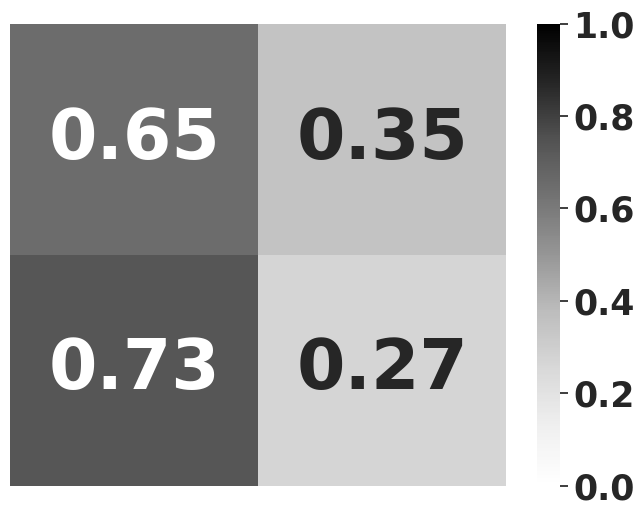

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
118


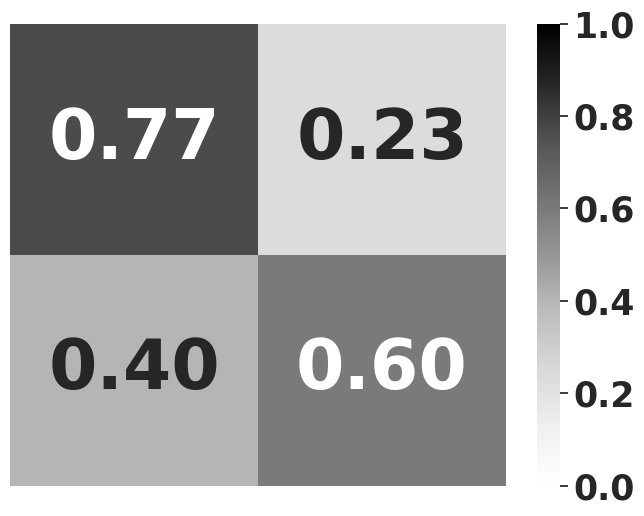

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
118


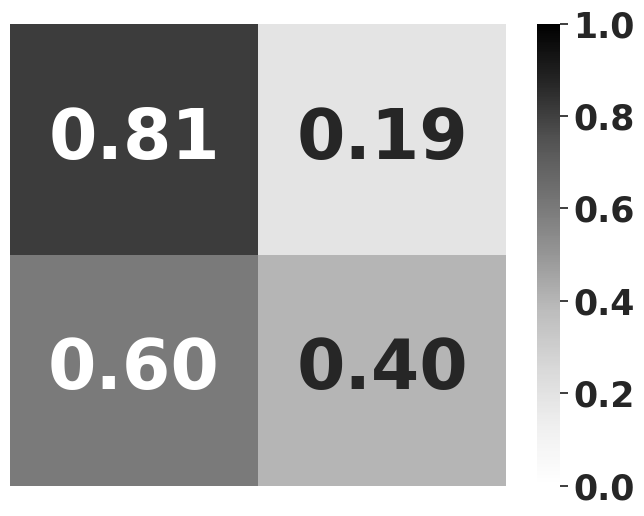

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
118


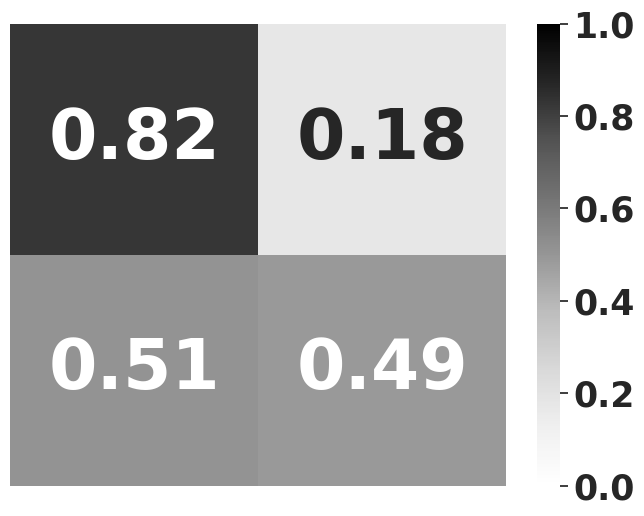

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
98


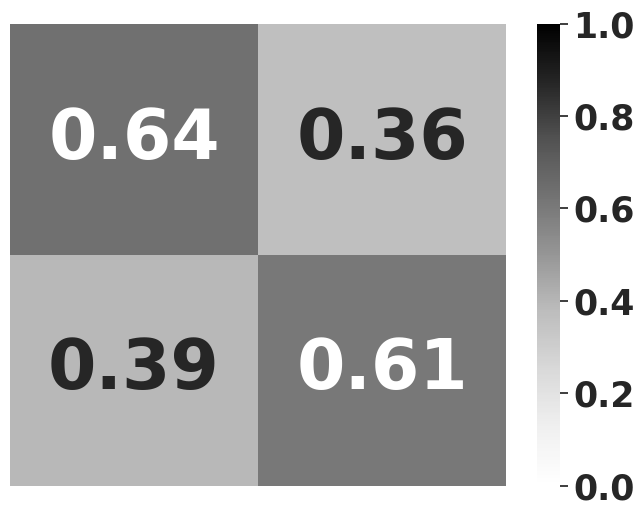

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
98


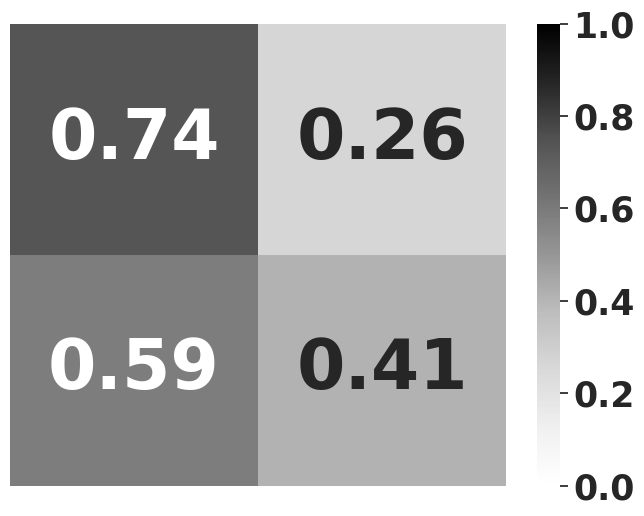

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
98


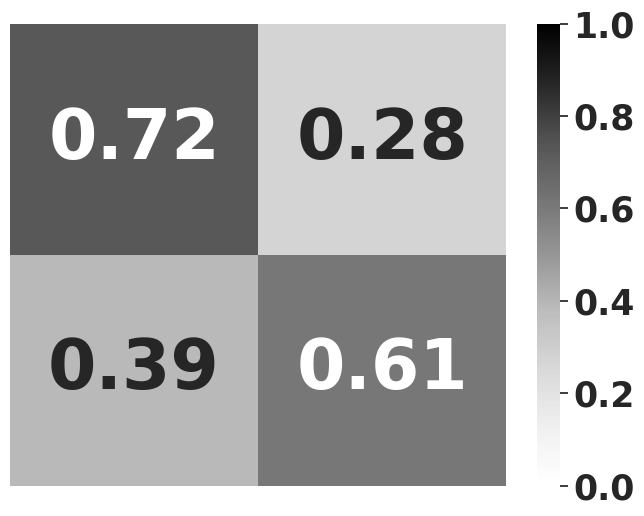

----------------------------------------------------------------------


In [54]:
# MGMT - All models - Lac
for i in lst2:
    for j, k in name_classifier.items():
        print('-' *70)
        print("for",i)
        df4 = df2.dropna(subset=i)
        X = df4[i]
        X = np.array(X).reshape((-1,len(i)))
    
        Y = df4[['MGMT_promoter_status']]
        print(len(df4))
    
        y = Y == 'Meth'
        y = np.array(Y)
        cv = StratifiedKFold(n_splits=5)
        classifier = j
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
    
        accuracy_model = []
        confusion_norm = []
        confusion_raw = []
        
        fig = plt.figure(figsize=(8, 6))
        # ax1 = fig.add_subplot(2, 1, 1)
        ax2 = fig.add_subplot(1, 1, 1)
        for fold, (train, test) in enumerate(cv.split(X, y)):
            classifier.fit(X[train], y[train])
            viz = RocCurveDisplay.from_estimator(
                classifier,
                X[test],
                y[test],
                lw=0,
                ax=ax1,
            )
            viz.line_.set_label("")
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)
            y_pred=classifier.predict(X[test])
            
            accuracy = accuracy_score(y[test],y_pred)
            confusion = confusion_matrix(y[test],y_pred)
            confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
                
                
            accuracy_model.append(accuracy)
            confusion_norm.append(confusion_accuracy)
            confusion_raw.append(confusion)
            
            
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax1.plot(
            mean_fpr,
            mean_tpr,
            color="b",
            label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )
        
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax1.fill_between(
            mean_fpr,
            tprs_lower,
            tprs_upper,
            color="grey",
            alpha=0.2,
            label=r"$\pm$ 1 std. dev.",
        )
        
        ax1.set(
            xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            xlabel="",
            ylabel="",
            title=f"",
        )
        ax1.axis("square")
        ax1.legend(loc="lower right")
        rc("axes", linewidth=1.5)
    
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)
    
        plt.ylim(0,1)
        plt.xlim(0,1)
    
        ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
        ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
        
        legend_font = {'size': 15, 'weight': 'normal'}  
        ax1.legend(loc="lower right", prop=legend_font)
    
        #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
        
        confusion_avg = avg_confusion_calculate(confusion_norm)

        '''---------------- To print accuracy, confusion matrices text --------------------'''
        # print(f"accuracy of {j}:", accuracy_model)
        # print("Average accuracy of model: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
        # print("Confusion matrix raw:","\n", confusion_raw)
        # print("Confusion matrix normalised:","\n", np.array(confusion_norm))        
        # print("average Confusion Matrix:","\n", confusion_avg)
        '''--------------------------------------------------------------------------------'''

        
        #text extraction
        results = []
        name = r"Mean Acc. of %s:%0.2f, StD:%0.2f" % (k, np.mean(accuracy_model), np.std(accuracy_model))
        result_label = r"%s" % (i)
        num_subjects = r'N: %i' % (len(df4))
        results.append([result_label, name, str(num_subjects)])
        
        with open(result_file_mgmt_lac, 'a') as file:
            for result in results:
               file.write(", ".join(result) + "\n")

        
        #Confusion matrix plot
        ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Greys',linecolor='white', 
                        annot=True, linewidths = 0,xticklabels=["", ""],
                        yticklabels=["", ""],annot_kws={'size': 50, 'weight': 'bold'}, fmt = '.2f')
        sns.set(font_scale=20)
        sns.set (rc = {'figure.figsize':(6,6)})
        
        plt.yticks(rotation=0) 
        ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
        ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
        
        cbar = ax2.collections[0].colorbar
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25, weight='bold')
        
        ax2.get_figure().savefig(save_path_mgmt_lac + str(i) + '_mgmt_' +  k + '_Confusion.tiff', dpi=300)
    
        plt.show()
        print('-' *70)


## Additional list

In [57]:
lst3 = [['et_meanfd', 'et_meanlac'],
        ['ncr_net_meanfd', 'ncr_net_meanlac'],
        ['ed_meanfd', 'ed_meanlac'],
        ['ncr_net_meanfd', 'et_meanfd', 'ncr_net_meanlac', 'et_meanlac'],
        ['et_meanfd',  'ed_meanfd', 'et_meanlac', 'ed_meanlac'],
        ['ncr_net_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'ed_meanlac'],
        ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd', 'et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']]

## IDH Frac-Lac 

----------------------------------------------------------------------
for ['et_meanfd', 'et_meanlac']
122


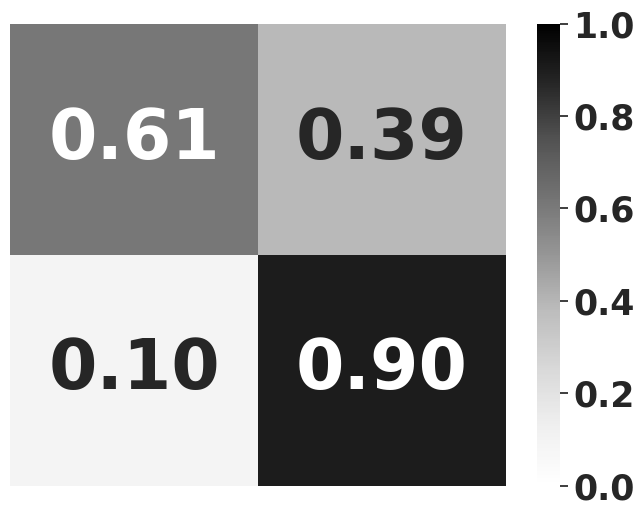

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'et_meanlac']
122


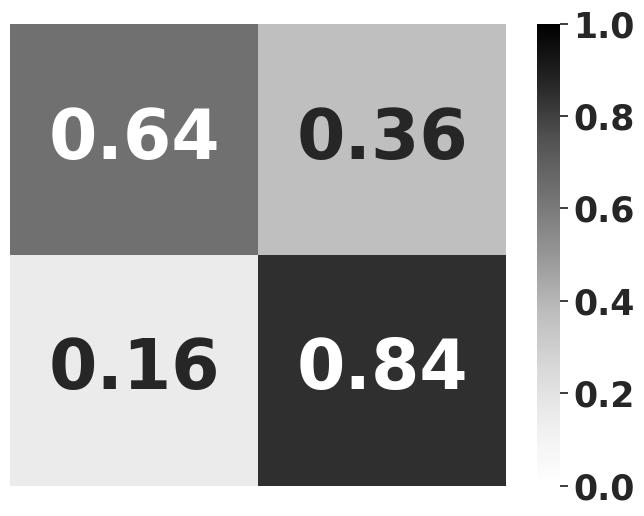

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'et_meanlac']
122


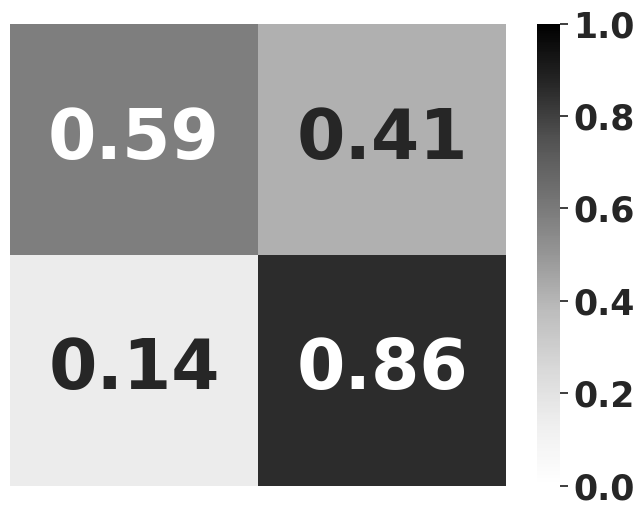

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ncr_net_meanlac']
142


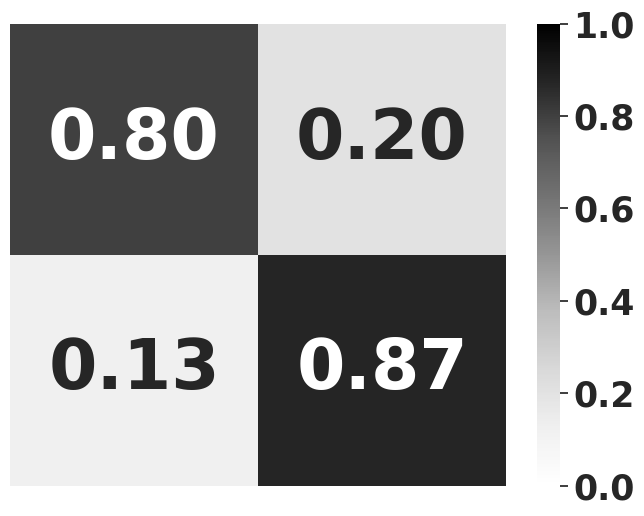

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ncr_net_meanlac']
142


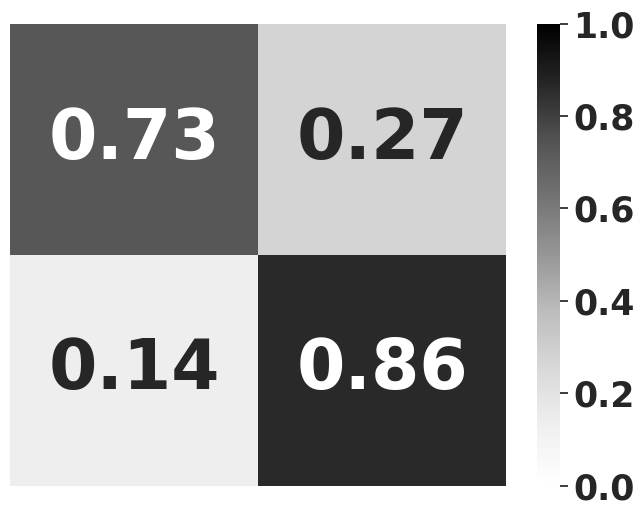

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ncr_net_meanlac']
142


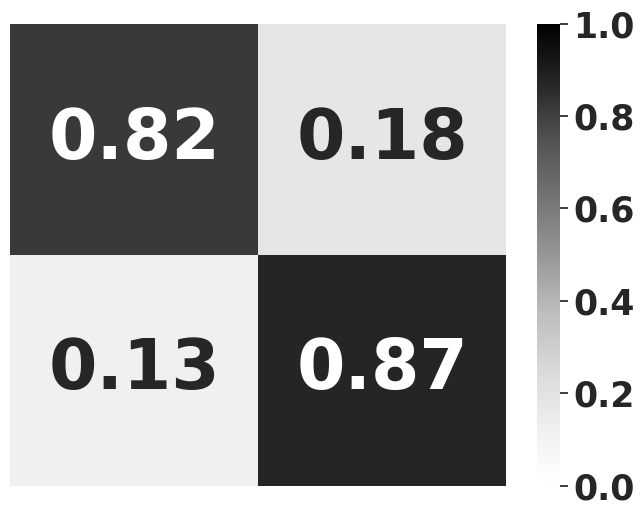

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd', 'ed_meanlac']
141


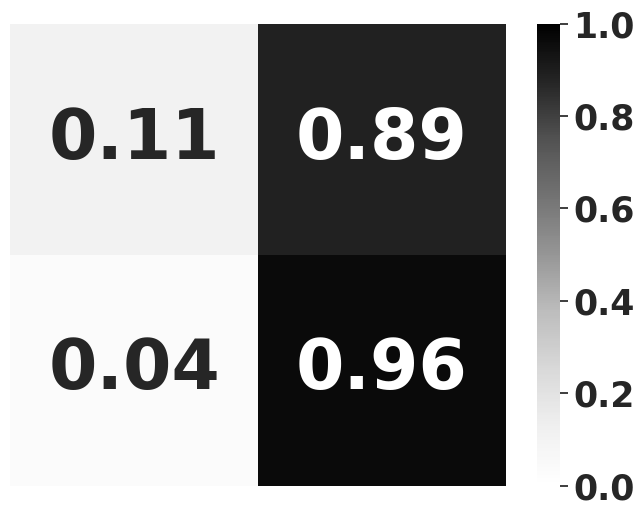

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd', 'ed_meanlac']
141


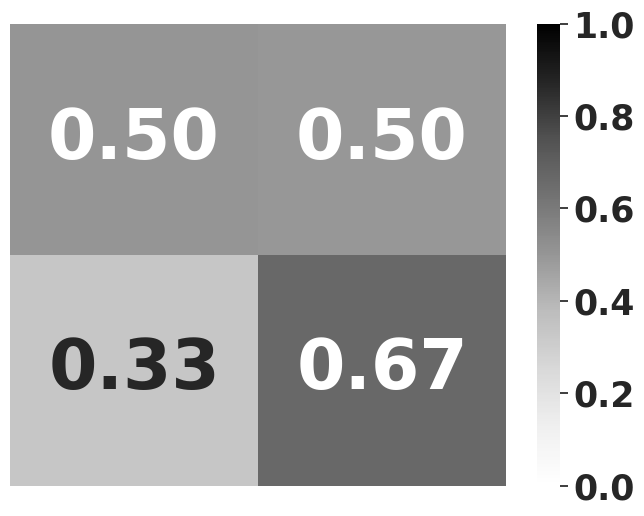

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd', 'ed_meanlac']
141


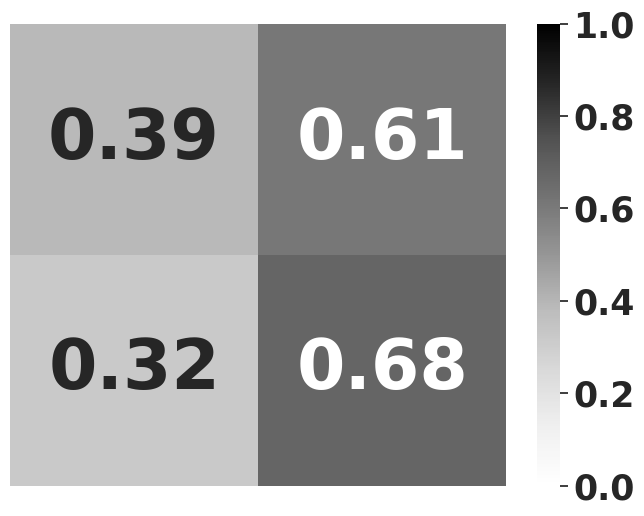

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd', 'ncr_net_meanlac', 'et_meanlac']
122


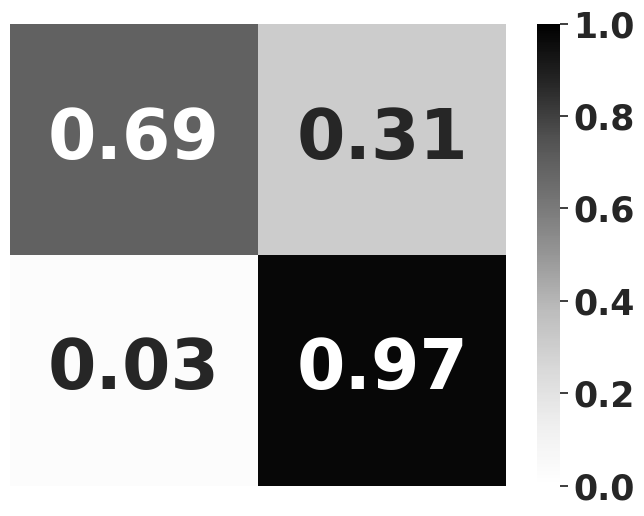

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd', 'ncr_net_meanlac', 'et_meanlac']
122


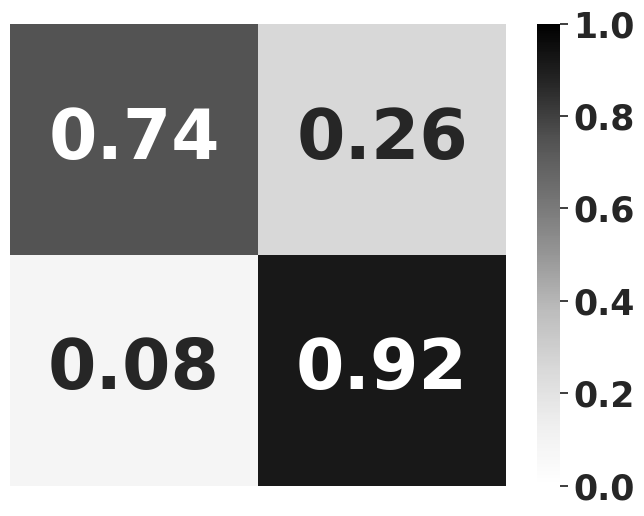

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd', 'ncr_net_meanlac', 'et_meanlac']
122


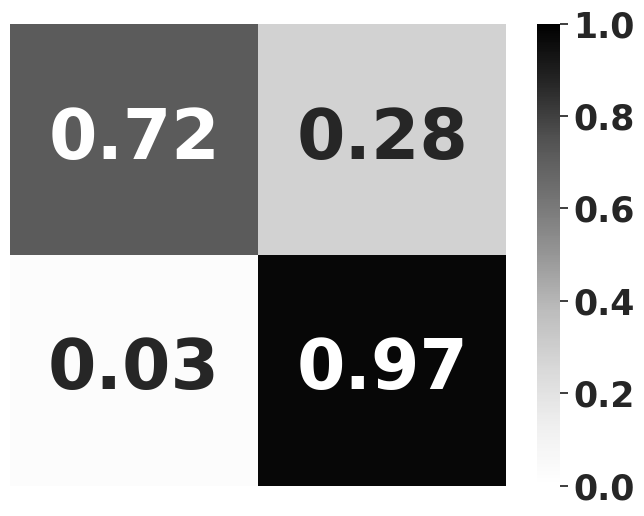

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd', 'et_meanlac', 'ed_meanlac']
121


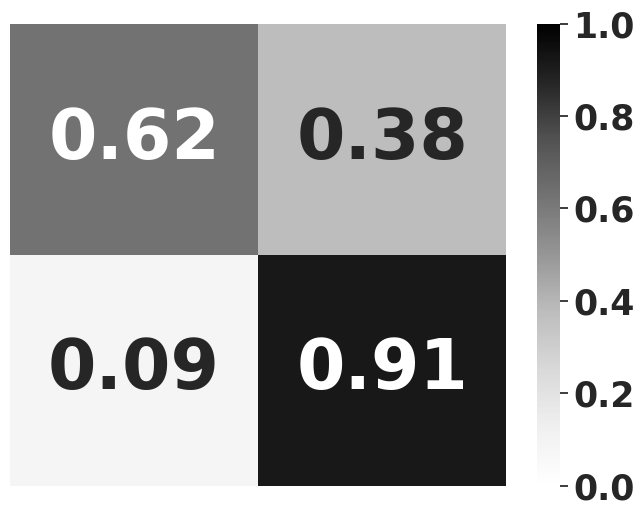

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd', 'et_meanlac', 'ed_meanlac']
121


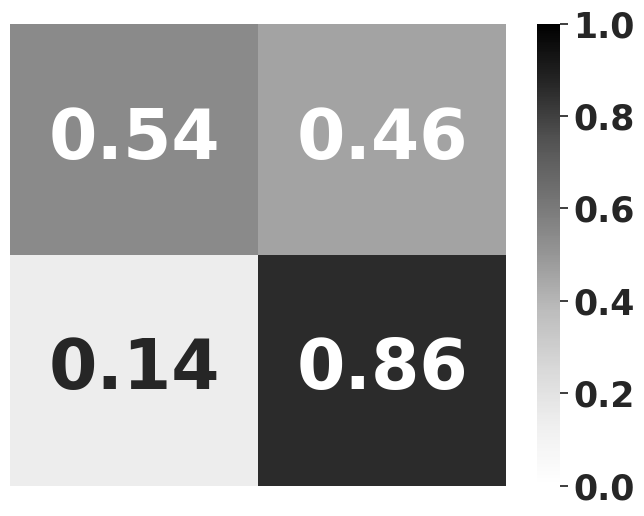

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd', 'et_meanlac', 'ed_meanlac']
121


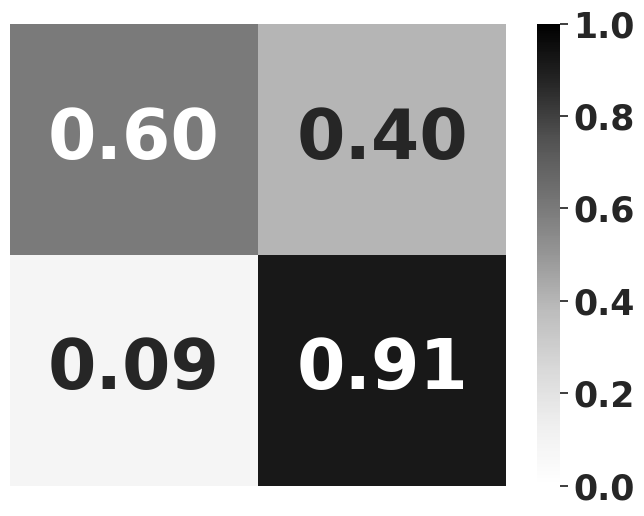

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'ed_meanlac']
141


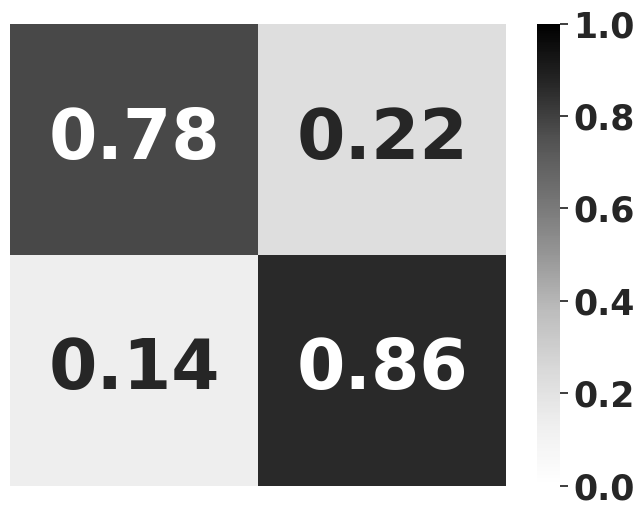

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'ed_meanlac']
141


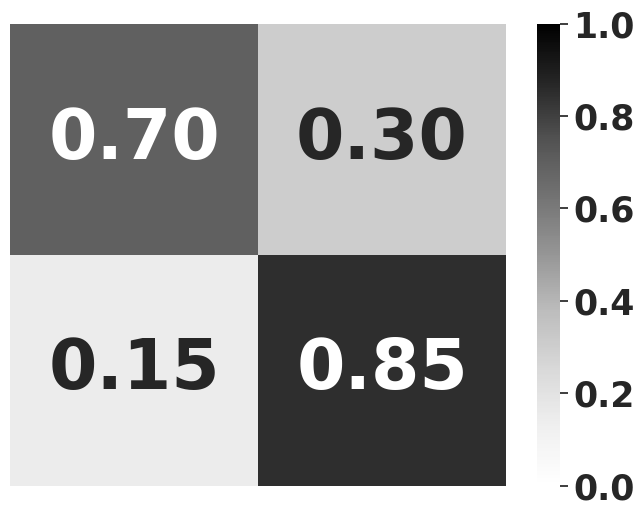

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'ed_meanlac']
141


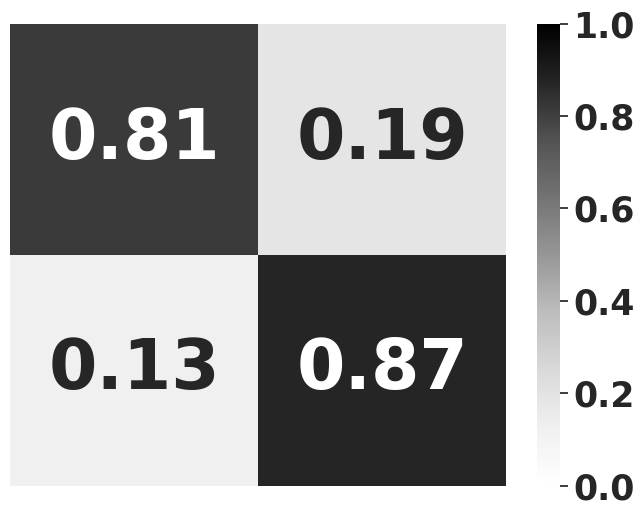

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd', 'et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
121


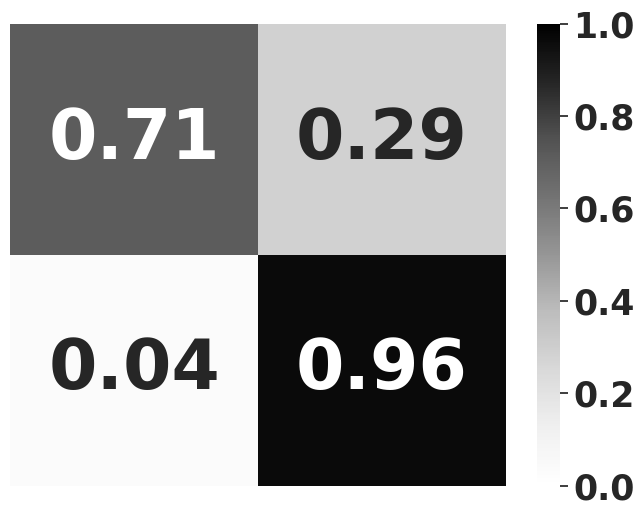

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd', 'et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
121


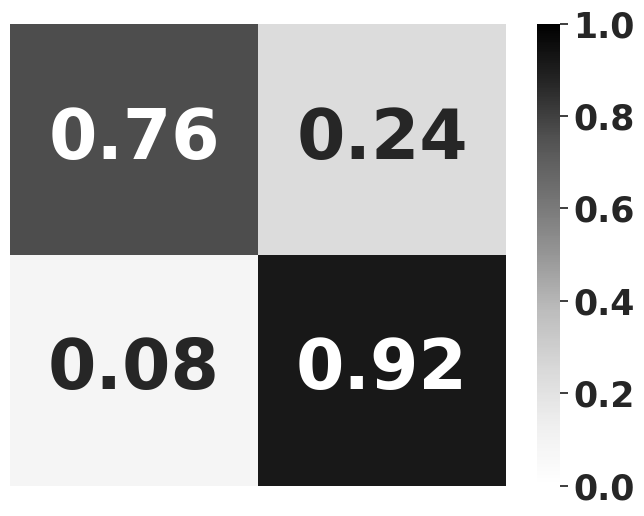

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd', 'et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
121


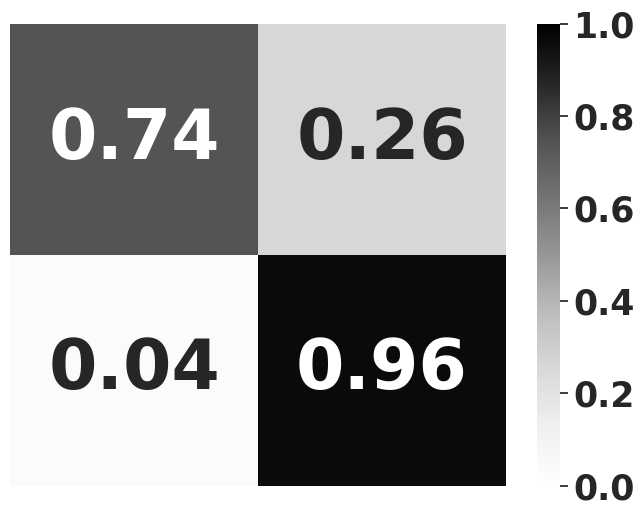

----------------------------------------------------------------------


In [59]:
# IDH - All models - Lac
for i in lst3:
    for j, k in name_classifier.items():
        print('-' *70)
        print("for",i)
        df5 = df1.dropna(subset=i)
        X = df5[i]
        X = np.array(X).reshape((-1,len(i)))
    
        Y = df5[['IDH_status']]
        print(len(df5))
    
        y = Y == 'WT'
        y = np.array(Y)
        cv = StratifiedKFold(n_splits=5)
        classifier = j
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
    
        accuracy_model = []
        confusion_norm = []
        confusion_raw = []
        
        fig = plt.figure(figsize=(8, 6))
        # ax1 = fig.add_subplot(2, 1, 1)
        ax2 = fig.add_subplot(1, 1, 1)
        for fold, (train, test) in enumerate(cv.split(X, y)):
            classifier.fit(X[train], y[train])
            viz = RocCurveDisplay.from_estimator(
                classifier,
                X[test],
                y[test],
                lw=0,
                ax=ax1,
            )
            viz.line_.set_label("")
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)
            y_pred=classifier.predict(X[test])
            
            accuracy = accuracy_score(y[test],y_pred)
            confusion = confusion_matrix(y[test],y_pred)
            confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
                
                
            accuracy_model.append(accuracy)
            confusion_norm.append(confusion_accuracy)
            confusion_raw.append(confusion)
            
            
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax1.plot(
            mean_fpr,
            mean_tpr,
            color="b",
            label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )
        
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax1.fill_between(
            mean_fpr,
            tprs_lower,
            tprs_upper,
            color="grey",
            alpha=0.2,
            label=r"$\pm$ 1 std. dev.",
        )
        
        ax1.set(
            xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            xlabel="",
            ylabel="",
            title=f"",
        )
        ax1.axis("square")
        ax1.legend(loc="lower right")
        rc("axes", linewidth=1.5)
    
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)
    
        plt.ylim(0,1)
        plt.xlim(0,1)
    
        ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
        ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
        
        legend_font = {'size': 15, 'weight': 'normal'}  
        ax1.legend(loc="lower right", prop=legend_font)
    
        #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
       
        confusion_avg = avg_confusion_calculate(confusion_norm)

        '''---------------- To print accuracy, confusion matrices text --------------------'''
        # print(f"accuracy of {j}:", accuracy_model)
        # print("Average accuracy of model: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
        # print("Confusion matrix raw:","\n", confusion_raw)
        # print("Confusion matrix normalised:","\n", np.array(confusion_norm))        
        # print("average Confusion Matrix:","\n", confusion_avg)
        '''--------------------------------------------------------------------------------'''

        #text extraction
        results = []
        name = r"Mean Acc. of %s:%0.2f, StD:%0.2f" % (k, np.mean(accuracy_model), np.std(accuracy_model))
        result_label = r"%s" % (i)
        num_subjects = r'N: %i' % (len(df5))
        results.append([result_label, name, str(num_subjects)])
        
        with open(result_file_idh_fd_lac, 'a') as file:
            for result in results:
               file.write(", ".join(result) + "\n")

        
        #Confusion matrix plot
        ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Greys',linecolor='white', 
                        annot=True, linewidths = 0,xticklabels=["", ""],
                        yticklabels=["", ""],annot_kws={'size': 50, 'weight': 'bold'}, fmt = '.2f')
        sns.set(font_scale=20)
        sns.set (rc = {'figure.figsize':(6,6)})
        
        plt.yticks(rotation=0) 
        ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
        ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
        
        cbar = ax2.collections[0].colorbar
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25, weight='bold')
        
        ax2.get_figure().savefig(save_path_idh_fdlac + str(i) + '_idh_' +  k + '_Confusion.tiff', dpi=300)
    
        plt.show()
        print('-' *70)


## MGMT Frac-lac

----------------------------------------------------------------------
for ['et_meanfd', 'et_meanlac']


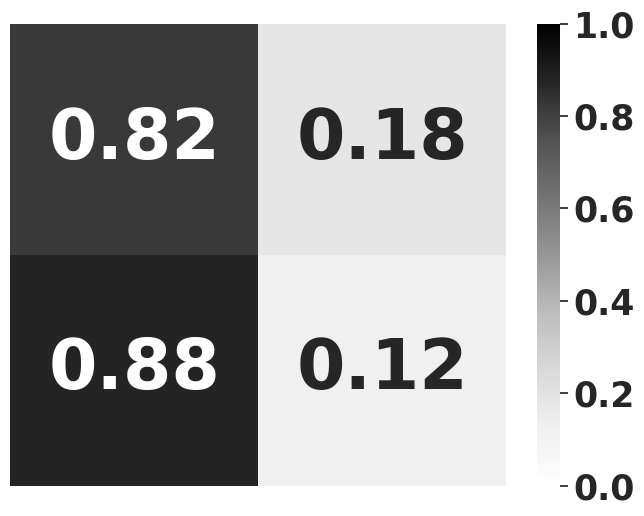

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'et_meanlac']


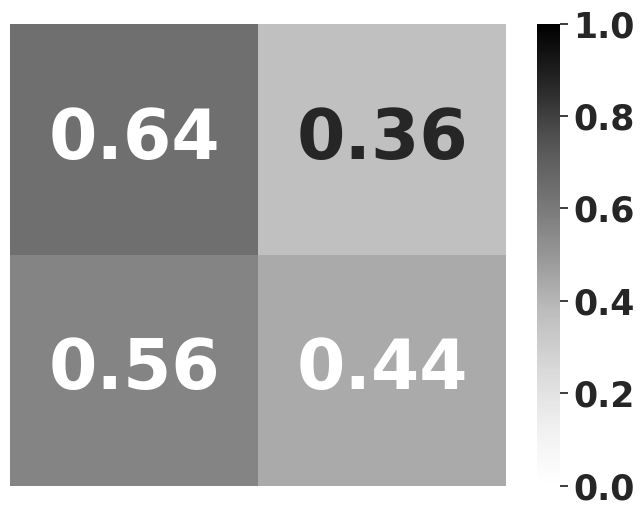

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'et_meanlac']


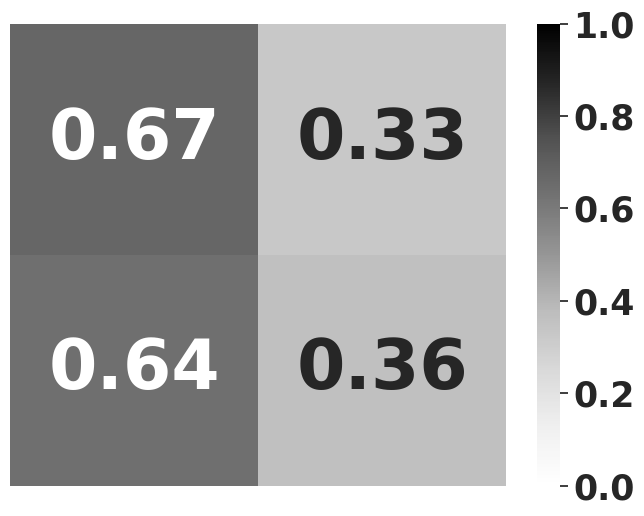

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ncr_net_meanlac']


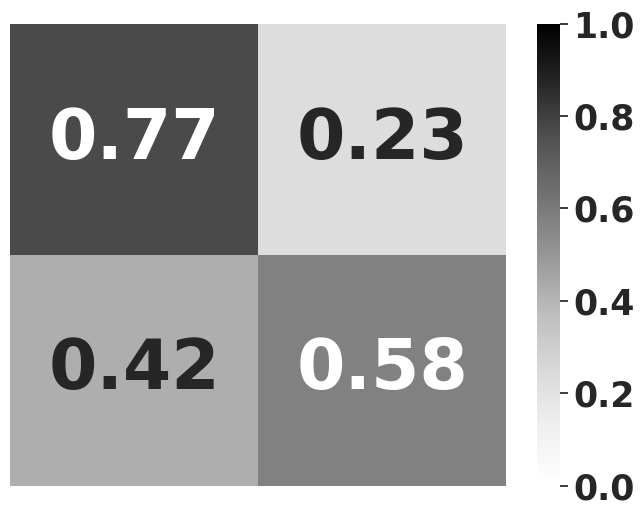

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ncr_net_meanlac']


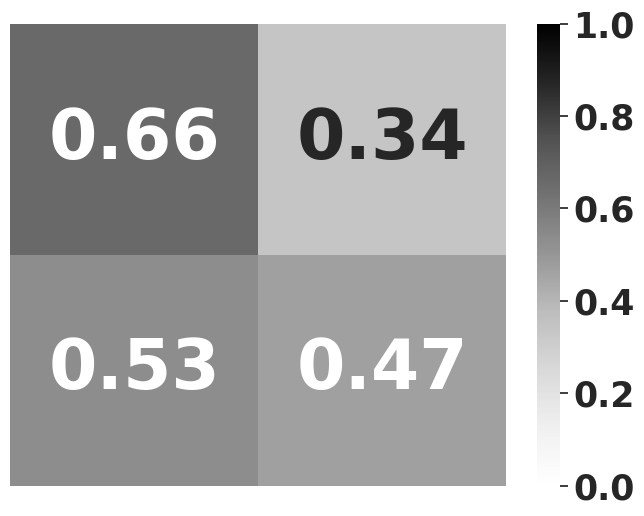

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ncr_net_meanlac']


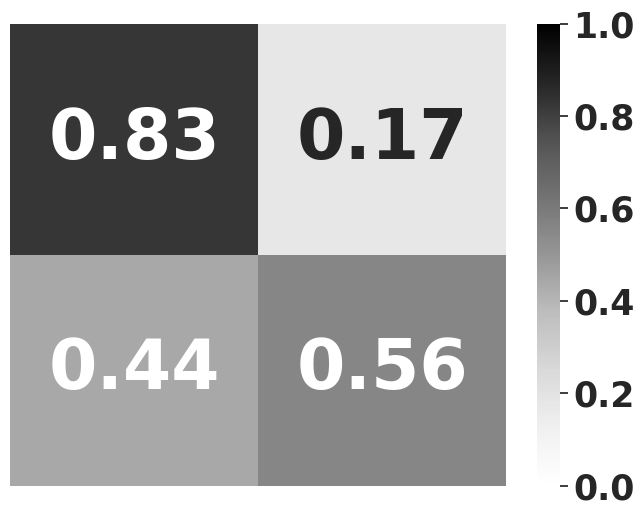

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd', 'ed_meanlac']


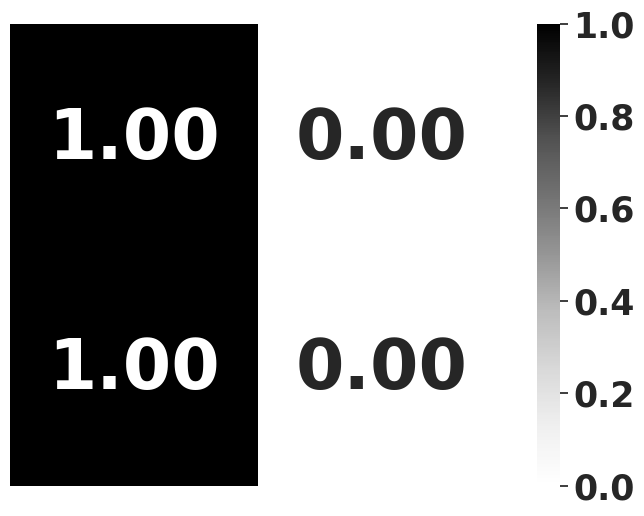

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd', 'ed_meanlac']


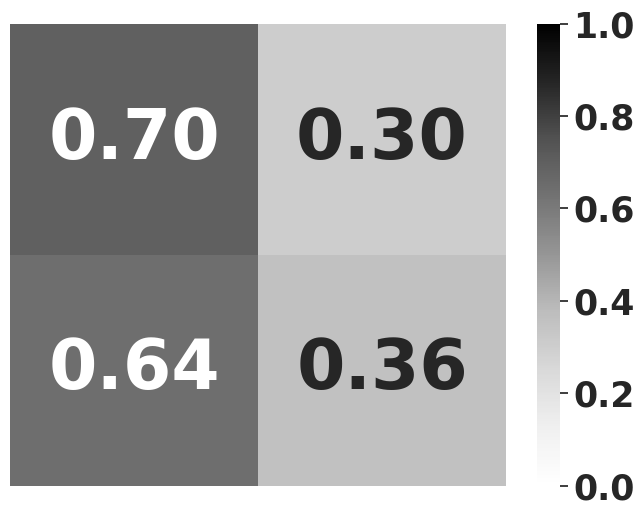

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd', 'ed_meanlac']


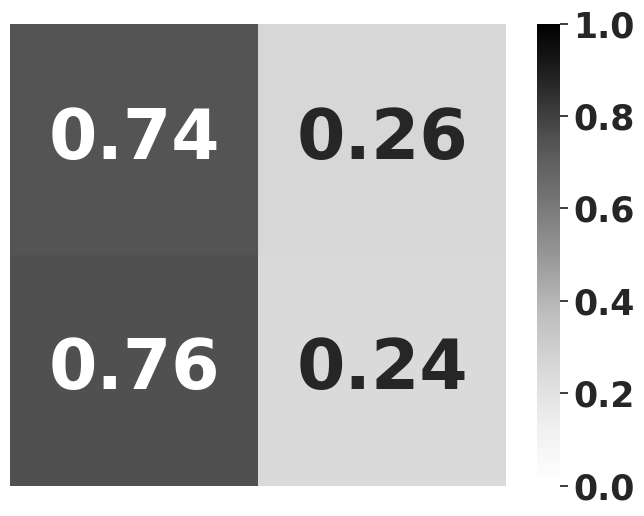

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd', 'ncr_net_meanlac', 'et_meanlac']


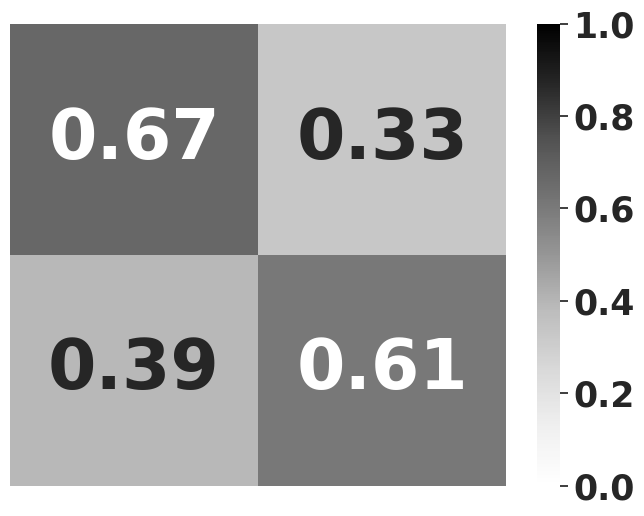

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd', 'ncr_net_meanlac', 'et_meanlac']


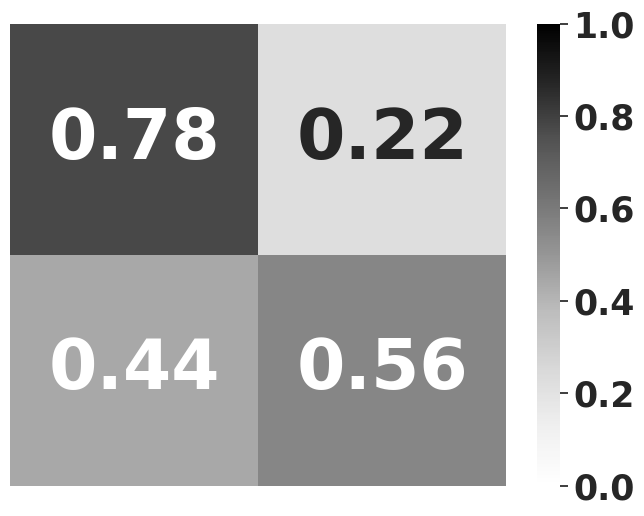

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd', 'ncr_net_meanlac', 'et_meanlac']


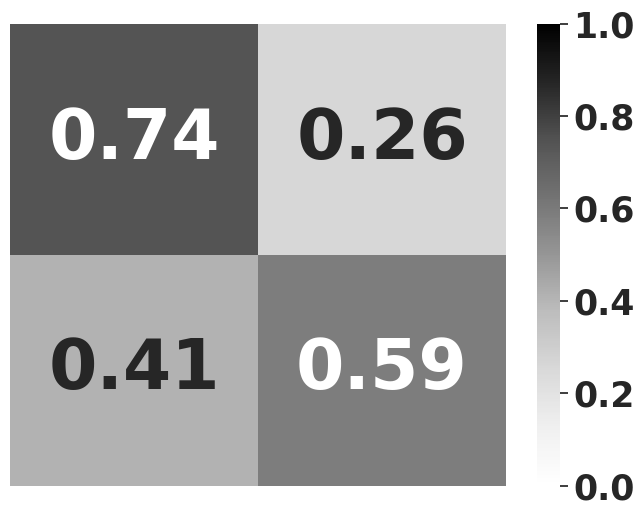

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd', 'et_meanlac', 'ed_meanlac']


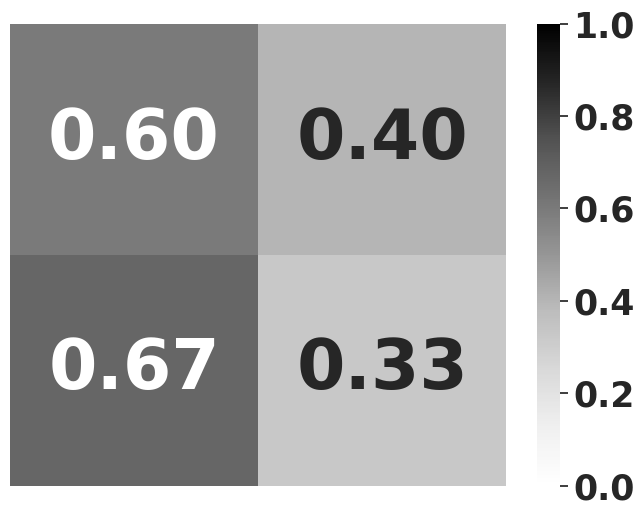

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd', 'et_meanlac', 'ed_meanlac']


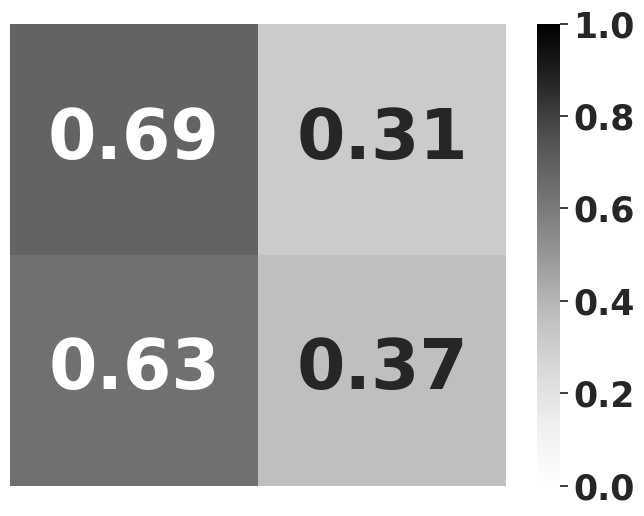

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd', 'et_meanlac', 'ed_meanlac']


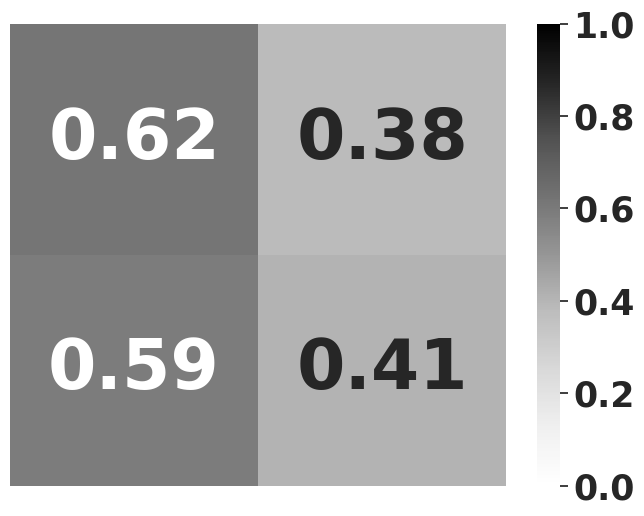

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'ed_meanlac']


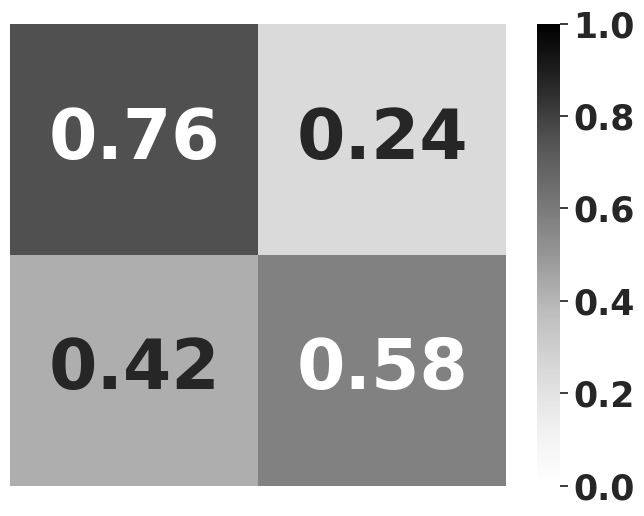

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'ed_meanlac']


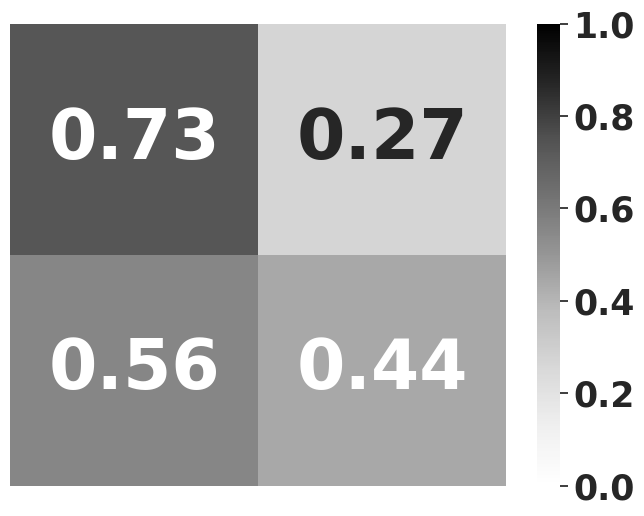

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'ed_meanlac']


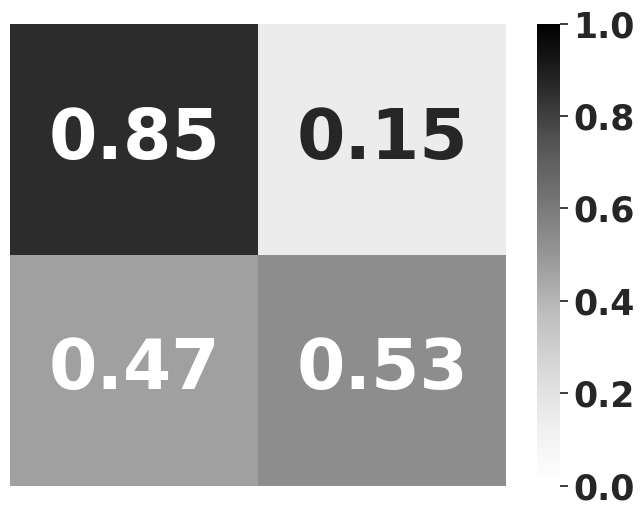

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd', 'et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']


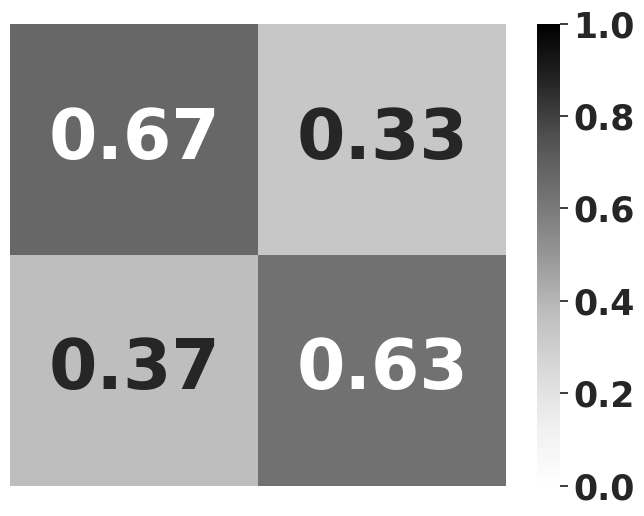

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd', 'et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']


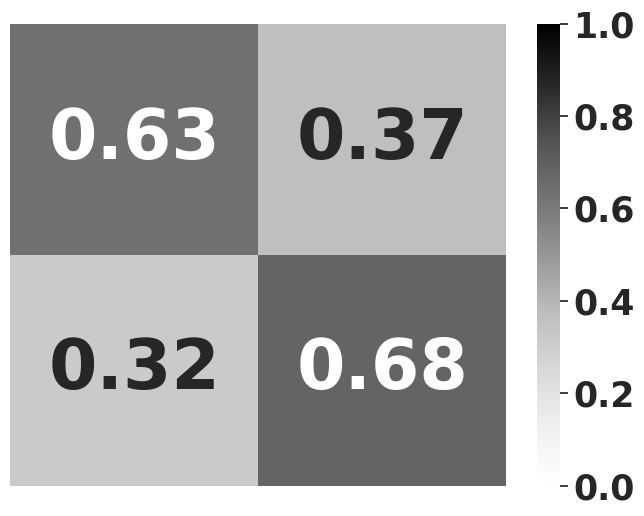

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd', 'et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']


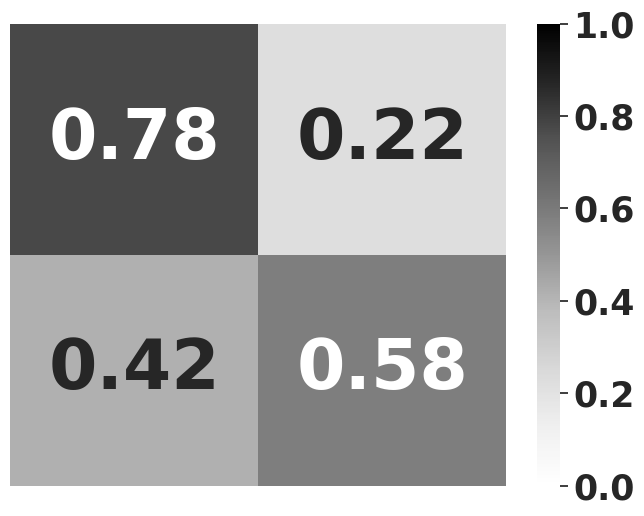

----------------------------------------------------------------------


In [60]:
# MGMT - All models - Lac
for i in lst3:
    for j, k in name_classifier.items():
        print('-' *70)
        print("for",i)
        df6 = df2.dropna(subset=i)
        X = df6[i]
        X = np.array(X).reshape((-1,len(i)))
    
        Y = df6[['MGMT_promoter_status']]
    
        y = Y == 'Meth'
        y = np.array(Y)
        cv = StratifiedKFold(n_splits=5)
        classifier = j
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
    
        accuracy_model = []
        confusion_norm = []
        confusion_raw = []
        
        fig = plt.figure(figsize=(8, 6))
        # ax1 = fig.add_subplot(2, 1, 1)
        ax2 = fig.add_subplot(1, 1, 1)
        for fold, (train, test) in enumerate(cv.split(X, y)):
            classifier.fit(X[train], y[train])
            viz = RocCurveDisplay.from_estimator(
                classifier,
                X[test],
                y[test],
                lw=0,
                ax=ax1,
            )
            viz.line_.set_label("")
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)
            y_pred=classifier.predict(X[test])
            
            accuracy = accuracy_score(y[test],y_pred)
            confusion = confusion_matrix(y[test],y_pred)
            confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
                
                
            accuracy_model.append(accuracy)
            confusion_norm.append(confusion_accuracy)
            confusion_raw.append(confusion)
            
            
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax1.plot(
            mean_fpr,
            mean_tpr,
            color="b",
            label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )
        
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax1.fill_between(
            mean_fpr,
            tprs_lower,
            tprs_upper,
            color="grey",
            alpha=0.2,
            label=r"$\pm$ 1 std. dev.",
        )
        
        ax1.set(
            xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            xlabel="",
            ylabel="",
            title=f"",
        )
        ax1.axis("square")
        ax1.legend(loc="lower right")
        rc("axes", linewidth=1.5)
    
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)
    
        plt.ylim(0,1)
        plt.xlim(0,1)
    
        ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
        ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
        
        legend_font = {'size': 15, 'weight': 'normal'}  
        ax1.legend(loc="lower right", prop=legend_font)
    
        #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
        
        confusion_avg = avg_confusion_calculate(confusion_norm)

        '''---------------- To print accuracy, confusion matrices text --------------------'''
        # print(f"accuracy of {j}:", accuracy_model)
        # print("Average accuracy of model: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
        # print("Confusion matrix raw:","\n", confusion_raw)
        # print("Confusion matrix normalised:","\n", np.array(confusion_norm))        
        # print("average Confusion Matrix:","\n", confusion_avg)
        '''--------------------------------------------------------------------------------'''

        
        #text extraction
        results = []
        name = r"Mean Acc. of %s:%0.2f, StD:%0.2f" % (k, np.mean(accuracy_model), np.std(accuracy_model))
        result_label = r"%s" % (i)
        num_subjects = r'N: %i' % (len(df6))
        results.append([result_label, name, str(num_subjects)])
        
        with open(result_file_mgmt_fd_lac, 'a') as file:
            for result in results:
               file.write(", ".join(result) + "\n")

        
        #Confusion matrix plot
        ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Greys',linecolor='white', 
                        annot=True, linewidths = 0,xticklabels=["", ""],
                        yticklabels=["", ""],annot_kws={'size': 50, 'weight': 'bold'}, fmt = '.2f')
        sns.set(font_scale=20)
        sns.set (rc = {'figure.figsize':(6,6)})
        
        plt.yticks(rotation=0) 
        ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
        ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
        
        cbar = ax2.collections[0].colorbar
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25, weight='bold')
        
        ax2.get_figure().savefig(save_path_mgmt_fdlac + str(i) + '_mgmt_' +  k + '_Confusion.tiff', dpi=300)
    
        plt.show()
        print('-' *70)


## IDH - Whole Tumour FD

In [27]:
df2 = df.dropna(subset='IDH_status')

----------------------------------------------------------------------
for ['wh_tumour_z_meanfd']
142
["['wh_tumour_z_meanfd']", 'Mean Acc. of SVM:0.61, StD:0.01', 'N: 142']


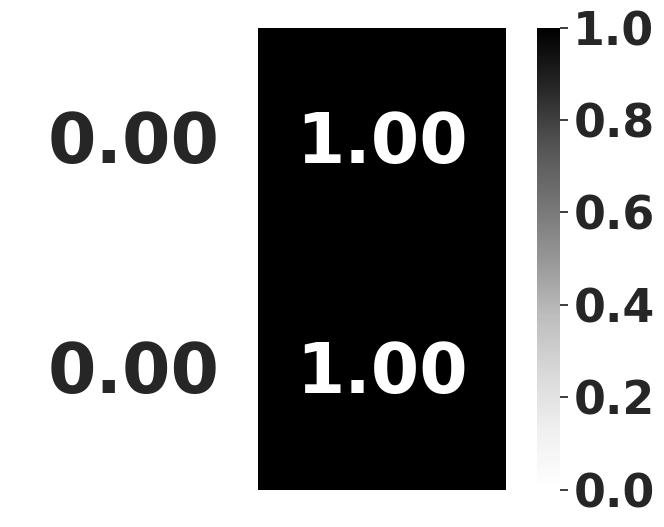

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['wh_tumour_z_meanfd']
142
["['wh_tumour_z_meanfd']", 'Mean Acc. of RF:0.55, StD:0.03', 'N: 142']


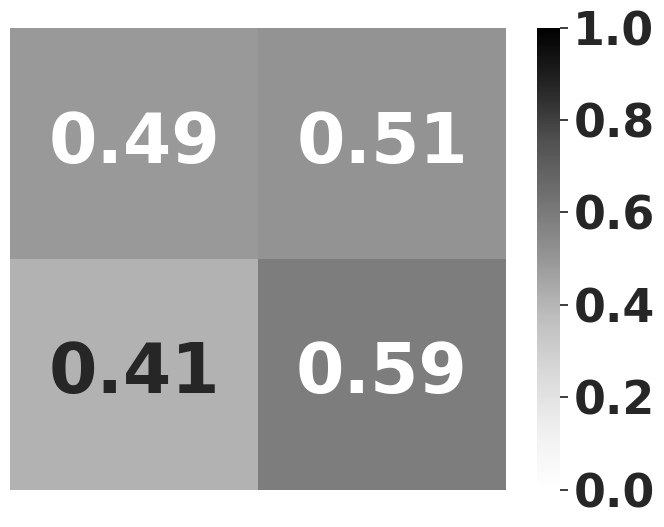

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['wh_tumour_z_meanfd']
142
["['wh_tumour_z_meanfd']", 'Mean Acc. of KNN:0.56, StD:0.06', 'N: 142']


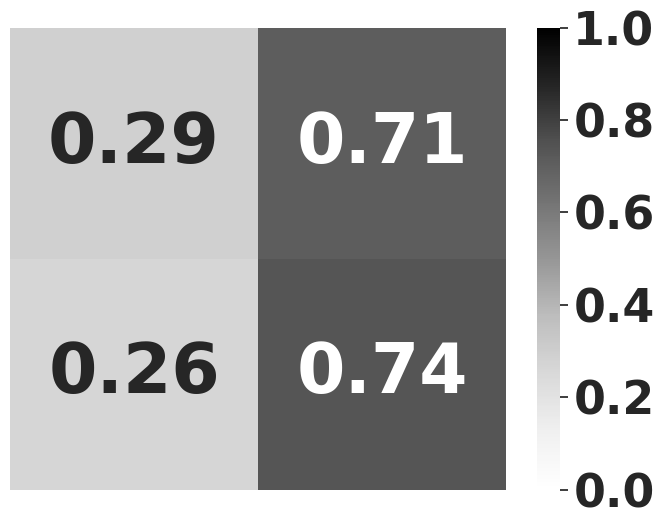

----------------------------------------------------------------------


In [36]:
# IDH - All models - FD
for i in lst3:
    for j, k in name_classifier.items():
        print('-' *70)
        print("for",i)
        X = df2[i]
        X = np.array(X).reshape((-1,len(i)))
    
        Y = df2[['IDH_status']]
        print(len(df2))
    
        y = Y == 'WT'
        y = np.array(Y)
        cv = StratifiedKFold(n_splits=5)
        classifier = j
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
    
        accuracy_model = []
        confusion_norm = []
        confusion_raw = []
        
        fig = plt.figure(figsize=(8, 6)) 
        # ax1 = fig.add_subplot(2, 1, 1)
        ax2 = fig.add_subplot(1, 1, 1)
        for fold, (train, test) in enumerate(cv.split(X, y)):
            classifier.fit(X[train], y[train])
            viz = RocCurveDisplay.from_estimator(
                classifier,
                X[test],
                y[test],
                lw=0,
                ax=ax1,
            )
            viz.line_.set_label("")
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)
            y_pred=classifier.predict(X[test])
            
            accuracy = accuracy_score(y[test],y_pred)
            confusion = confusion_matrix(y[test],y_pred)
            confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
                                
            accuracy_model.append(accuracy)
            confusion_norm.append(confusion_accuracy)
            confusion_raw.append(confusion)
                   
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax1.plot(
            mean_fpr,
            mean_tpr,
            color="b",
            label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )
        
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax1.fill_between(
            mean_fpr,
            tprs_lower,
            tprs_upper,
            color="grey",
            alpha=0.2,
            label=r"$\pm$ 1 std. dev.",
        )
        
        ax1.set(
            xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            xlabel="",
            ylabel="",
            title=f"",
        )
        ax1.axis("square")
        ax1.legend(loc="lower right")
        rc("axes", linewidth=1.5)
    
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)
    
        plt.ylim(0,1)
        plt.xlim(0,1)
    
        ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
        ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
        
        legend_font = {'size': 15, 'weight': 'normal'}  
        ax1.legend(loc="lower right", prop=legend_font)
    
        

        confusion_avg = avg_confusion_calculate(confusion_norm)

        '''---------------- To print accuracy, confusion matrices text --------------------'''
        # print(f"accuracy of {j}:", accuracy_model)
        # print("Average accuracy of model: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
        # print("Confusion matrix raw:","\n", confusion_raw)
        # print("Confusion matrix normalised:","\n", np.array(confusion_norm))        
        # print("average Confusion Matrix:","\n", confusion_avg)
        '''--------------------------------------------------------------------------------'''
        
        #text extraction
        results = []
        name = r"Mean Acc. of %s:%0.2f, StD:%0.2f" % (k, np.mean(accuracy_model), np.std(accuracy_model))
        result_label = r"%s" % (i)
        num_subjects = r'N: %i' % (len(df2))
        results.append([result_label, name, str(num_subjects)])
        print([result_label, name, str(num_subjects)])
        
        #with open(result_file_idh_fd, 'a') as file:
            #for result in results:
               # file.write(", ".join(result) + "\n")

        
        #Confusion matrix plot
        ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Greys',linecolor='white', 
                        annot=True, linewidths = 0,xticklabels=["", ""],
                        yticklabels=["", ""],annot_kws={'size': 50}, fmt = '.2f')
        # sns.set(font_scale=20)
        sns.set (rc = {'figure.figsize':(6,6)})
        # plt.gcf().set_size_inches(5, 5)
        plt.yticks(rotation=0) 
        ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
        ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
        sns.set(font_scale=3) 
                
        ax2.get_figure().savefig('/home/ankit/Desktop/' + str(i) + '_idh_' +  k + '_Confusion.tiff', dpi=300)
        
        plt.show()
        print('-' *70)

## MGMT - Whole Tumour FD

----------------------------------------------------------------------
for ['wh_tumour_z_meanfd']
["['wh_tumour_z_meanfd']", 'Mean Acc. of SVM:0.59, StD:0.03', 'N: 124']


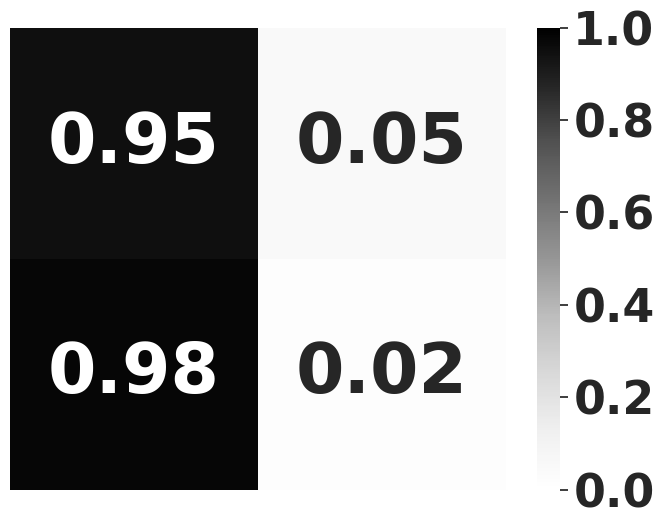

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['wh_tumour_z_meanfd']
["['wh_tumour_z_meanfd']", 'Mean Acc. of RF:0.55, StD:0.09', 'N: 124']


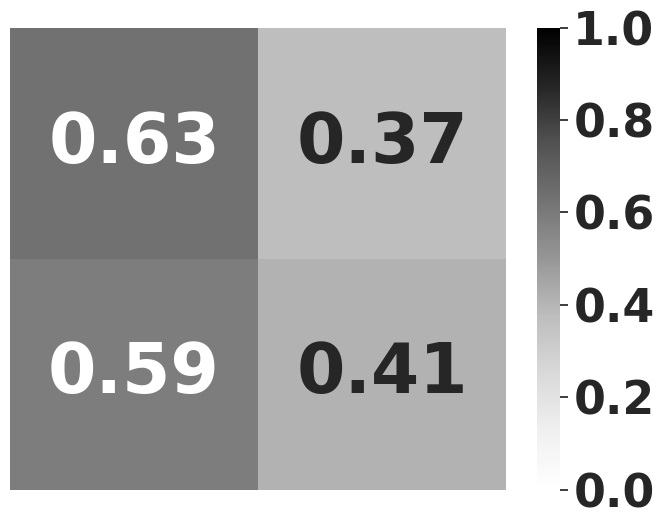

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['wh_tumour_z_meanfd']
["['wh_tumour_z_meanfd']", 'Mean Acc. of KNN:0.59, StD:0.04', 'N: 124']


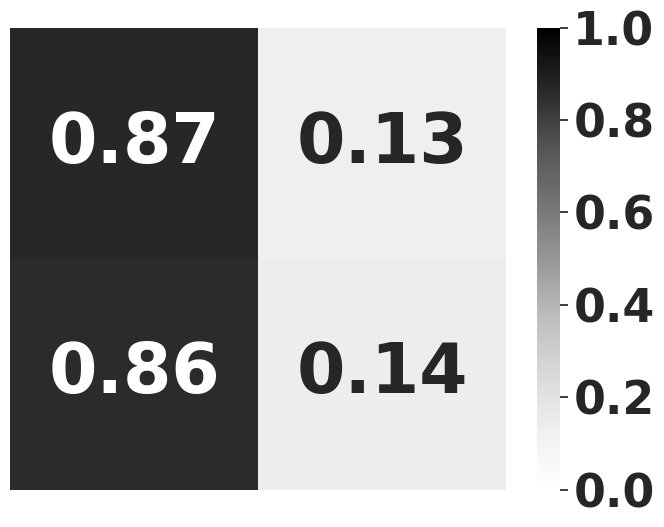

----------------------------------------------------------------------


In [37]:
df5 = df.dropna(subset='MGMT_promoter_status')
# MGMT - All models - FD
for i in lst3:
    for j, k in name_classifier.items():
        print('-' *70)
        print("for",i)
        X = df5[i]
        X = np.array(X).reshape((-1,len(i)))
    
        Y = df5[['MGMT_promoter_status']]
        
        # print(np.unique(Y, return_counts=True))
    
        y = Y == 'Meth'
        y = np.array(Y)
        cv = StratifiedKFold(n_splits=5)
        classifier = j
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
    
        accuracy_model = []
        confusion_norm = []
        confusion_raw = []
        
        fig = plt.figure(figsize=(8, 6))
        # ax1 = fig.add_subplot(2, 1, 1)
        ax2 = fig.add_subplot(1, 1, 1)
        for fold, (train, test) in enumerate(cv.split(X, y)):

            # print(f"Fold {fold+1}:")
            # print("Training samples indices:", train)
            # print("Testing samples indices:", test)
            # print("--------------------------------------")
        
            # training_indices = df.index[train]  
            # testing_indices = df.index[test]    
            
            # training_values = df.loc[training_indices, 'MGMT_promoter_status']
            # testing_values = df.loc[testing_indices, 'MGMT_promoter_status']
            
            # print("Training values from 'MGMT Promoter status':")
            # print(training_values.value_counts())
            
            # print("Testing values from 'MGMT promoter status':")
            # print(testing_values.value_counts())
            
            # print("--------------------------------------")
                
            classifier.fit(X[train], y[train])
            viz = RocCurveDisplay.from_estimator(
                classifier,
                X[test],
                y[test],
                lw=0,
                ax=ax1,
            )
            viz.line_.set_label("")
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)
            y_pred=classifier.predict(X[test])
            
            accuracy = accuracy_score(y[test],y_pred)
            confusion = confusion_matrix(y[test],y_pred)
            confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True) 

            # print('Accuracy: ', accuracy, confusion_accuracy)
                
            accuracy_model.append(accuracy)
            confusion_norm.append(confusion_accuracy)
            confusion_raw.append(confusion)            
            
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax1.plot(
            mean_fpr,
            mean_tpr,
            color="b",
            label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )
        
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax1.fill_between(
            mean_fpr,
            tprs_lower,
            tprs_upper,
            color="grey",
            alpha=0.2,
            label=r"$\pm$ 1 std. dev.",
        )
        
        ax1.set(
            xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            xlabel="",
            ylabel="",
            title=f"",
        )
        ax1.axis("square")
        ax1.legend(loc="lower right")
        rc("axes", linewidth=1.5)
    
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)
    
        plt.ylim(0,1)
        plt.xlim(0,1)
    
        ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
        ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
        
        legend_font = {'size': 15, 'weight': 'normal'}  
        ax1.legend(loc="lower right", prop=legend_font)
    
        #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")

        confusion_avg = avg_confusion_calculate(confusion_norm)

        '''---------------- To print accuracy, confusion matrices text --------------------'''
        # print(f"accuracy of {j}:", accuracy_model)
        # print("Average accuracy of model: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
        # print("Confusion matrix raw:","\n", confusion_raw)
        # print("Confusion matrix normalised:","\n", np.array(confusion_norm))        
        # print("average Confusion Matrix:","\n", confusion_avg)
        '''--------------------------------------------------------------------------------'''
       
        
        #text extraction
        results = []
        name = r"Mean Acc. of %s:%0.2f, StD:%0.2f" % (k, np.mean(accuracy_model), np.std(accuracy_model))
        result_label = r"%s" % (i)
        num_subjects = r'N: %i' % (len(df5))
        results.append([result_label, name, str(num_subjects)])
        print([result_label, name, str(num_subjects)])
        
        #with open(result_file_mgmt_fd, 'a') as file:
            #for result in results:
               # file.write(", ".join(result) + "\n")

        
        #Confusion matrix plot
        ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Greys',linecolor='white', 
                        annot=True, linewidths = 0,xticklabels=["", ""],
                        yticklabels=["", ""],annot_kws={'size': 50}, fmt = '.2f')
     
        sns.set (rc = {'figure.figsize':(6,6)})
        # plt.gcf().set_size_inches(5, 5)
        plt.yticks(rotation=0) 
        ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
        ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
        sns.set(font_scale=3)
        ax2.get_figure().savefig('/home/ankit/Desktop/'+ str(i) + '_mgmt_' +  k + '_Confusion.tiff', dpi=300)
    
        plt.show()
        print('-' *70)


# Individual Model testing for confusion matrix

## IDH fractal dimension

In [226]:
df2 = df.dropna(subset='IDH_status')

In [ ]:
# For SVM IDH meanFD
for i in lst1:
    print('-' *70)
    print("for",i)
    X = df2[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df2[['IDH_status']]

    y = Y == 'WT'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = svm.SVC(random_state=42)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
   ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)

    results = []
    name = r"Mean Accuracy of Model:%0.2f, Standard Deviation:%0.2f: " % (np.mean(accuracy_model), np.std(accuracy_model))
    result_label = r"%s" % (i)
    results.append([result_label, name])
    result_file = '/home/ankit/Desktop/results.txt'
    # #with open(result_file, 'a') as file:
    #     #for result in results:
    #        # file.write(", ".join(result) + "\n")
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', 
                    annot=True, linewidths = 0,xticklabels=["", ""],
                    yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)
    
    plt.show()
    print('-' *70)


In [ ]:
# For Random Forest IDH meanFD
for i in lst1:
    print('-' *70)
    print("for",i)
    X = df2[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df2[['IDH_status']]

    y = Y == 'WT'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = RandomForestClassifier(n_estimators=10, random_state=42)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


In [ ]:
# For KNN meanIDH_FD
for i in lst1:
    print('-' *70)
    print("for",i)
    X = df2[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df2[['IDH_status']]

    y = Y == 'WT'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = KNeighborsClassifier(10)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


## IDH Lacunarity

In [135]:
df3 = df.dropna(subset='IDH_status')

142


In [ ]:
# IDH - All models - Lac
for i in lst2:

    print('-' *70)
    print("for",i)
    df4 = df3.dropna(subset=i)
    X = df4[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df4[['IDH_status']]

    y = Y == 'WT'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = j
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
   
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)

    results = []
    name = r"Mean Acc. of %s:%0.2f, StD:%0.2f" % (k, np.mean(accuracy_model), np.std(accuracy_model))
    result_label = r"%s" % (i)
    num_subjects = r'N: %i' % (len(df2))
    # results.append([result_label, name, str(num_subjects)])
    # result_file = '/home/ankit/Desktop/results.txt'
    # #with open(result_file, 'a') as file:
    #     #for result in results:
    #        # file.write(", ".join(result) + "\n")
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white',
                    annot=True, linewidths = 0,xticklabels=["", ""], 
                    yticklabels=["", ""], annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    #####ax2.get_figure().savefig(save_path + str(i) + '_idh_' +  k + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


----------------------------------------------------------------------
for ['et_meanlac']
accuracy of SVM: [0.68, 0.68, 0.8333333333333334, 0.7916666666666666, 0.7083333333333334]
Average accuracy of SVM:  0.7386666666666667 
 Standard Deviation of Accuracy: 0.06256907294253997
Confusion matrix raw: 
 [array([[ 3,  5],
       [ 3, 14]]), array([[ 5,  3],
       [ 5, 12]]), array([[ 5,  2],
       [ 2, 15]]), array([[ 6,  1],
       [ 4, 13]]), array([[ 4,  4],
       [ 3, 13]])]
Confusion matrix normalised: 
 [array([[0.375     , 0.625     ],
       [0.17647059, 0.82352941]]), array([[0.625     , 0.375     ],
       [0.29411765, 0.70588235]]), array([[0.71428571, 0.28571429],
       [0.11764706, 0.88235294]]), array([[0.85714286, 0.14285714],
       [0.23529412, 0.76470588]]), array([[0.5   , 0.5   ],
       [0.1875, 0.8125]])]
average Confusion Matrix: 
 [[0.61428571 0.38571429]
 [0.20220588 0.79779412]]


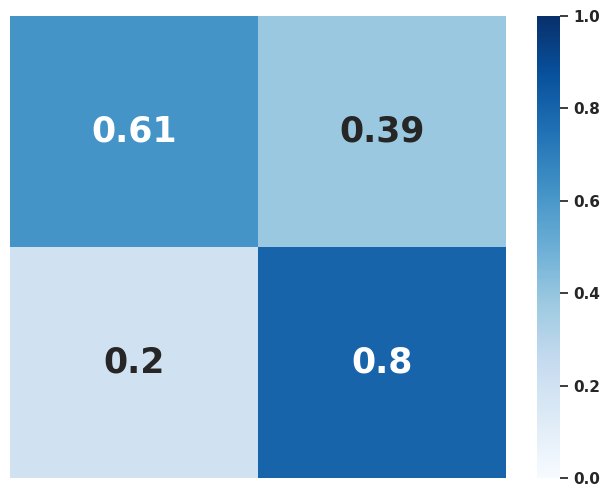

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
accuracy of SVM: [0.7241379310344828, 0.7241379310344828, 0.8214285714285714, 0.8928571428571429, 0.6785714285714286]
Average accuracy of SVM:  0.7682266009852217 
 Standard Deviation of Accuracy: 0.07783173286384044
Confusion matrix raw: 
 [array([[ 6,  5],
       [ 3, 15]]), array([[ 6,  5],
       [ 3, 15]]), array([[10,  1],
       [ 4, 13]]), array([[ 9,  2],
       [ 1, 16]]), array([[ 7,  4],
       [ 5, 12]])]
Confusion matrix normalised: 
 [array([[0.54545455, 0.45454545],
       [0.16666667, 0.83333333]]), array([[0.54545455, 0.45454545],
       [0.16666667, 0.83333333]]), array([[0.90909091, 0.09090909],
       [0.23529412, 0.76470588]]), array([[0.81818182, 0.18181818],
       [0.05882353, 0.94117647]]), array([[0.63636364, 0.36363636],
       [0.29411765, 0.70588235]])]
average Confusion Matrix: 
 [[0.69090909

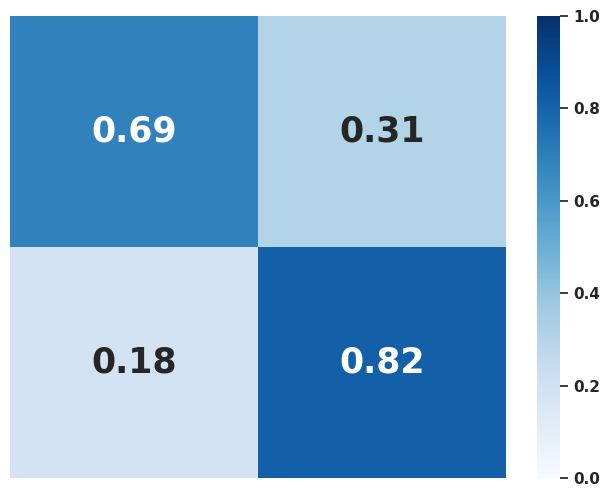

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
accuracy of SVM: [0.4827586206896552, 0.6785714285714286, 0.5, 0.4642857142857143, 0.35714285714285715]
Average accuracy of SVM:  0.496551724137931 
 Standard Deviation of Accuracy: 0.1037393278365029
Confusion matrix raw: 
 [array([[ 3,  8],
       [ 7, 11]]), array([[ 6,  4],
       [ 5, 13]]), array([[ 2,  9],
       [ 5, 12]]), array([[ 2,  9],
       [ 6, 11]]), array([[ 4,  7],
       [11,  6]])]
Confusion matrix normalised: 
 [array([[0.27272727, 0.72727273],
       [0.38888889, 0.61111111]]), array([[0.6       , 0.4       ],
       [0.27777778, 0.72222222]]), array([[0.18181818, 0.81818182],
       [0.29411765, 0.70588235]]), array([[0.18181818, 0.81818182],
       [0.35294118, 0.64705882]]), array([[0.36363636, 0.63636364],
       [0.64705882, 0.35294118]])]
average Confusion Matrix: 
 [[0.32       0.68      ]
 [0.3921

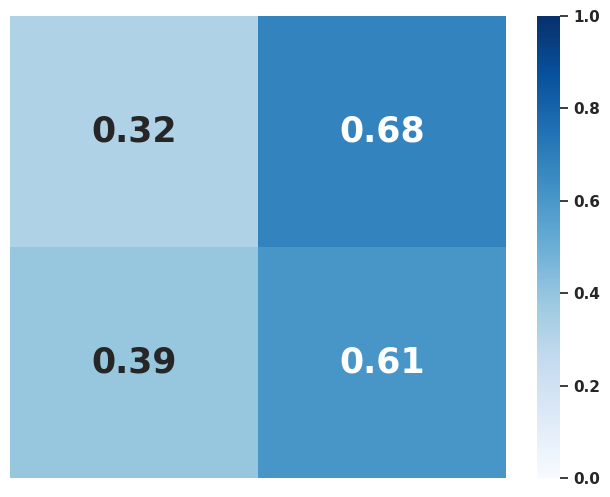

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
accuracy of SVM: [0.72, 0.88, 1.0, 0.875, 0.875]
Average accuracy of SVM:  0.8699999999999999 
 Standard Deviation of Accuracy: 0.08893818077743666
Confusion matrix raw: 
 [array([[ 4,  4],
       [ 3, 14]]), array([[ 5,  3],
       [ 0, 17]]), array([[ 7,  0],
       [ 0, 17]]), array([[ 5,  2],
       [ 1, 16]]), array([[ 7,  1],
       [ 2, 14]])]
Confusion matrix normalised: 
 [array([[0.5       , 0.5       ],
       [0.17647059, 0.82352941]]), array([[0.625, 0.375],
       [0.   , 1.   ]]), array([[1., 0.],
       [0., 1.]]), array([[0.71428571, 0.28571429],
       [0.05882353, 0.94117647]]), array([[0.875, 0.125],
       [0.125, 0.875]])]
average Confusion Matrix: 
 [[0.74285714 0.25714286]
 [0.07205882 0.92794118]]


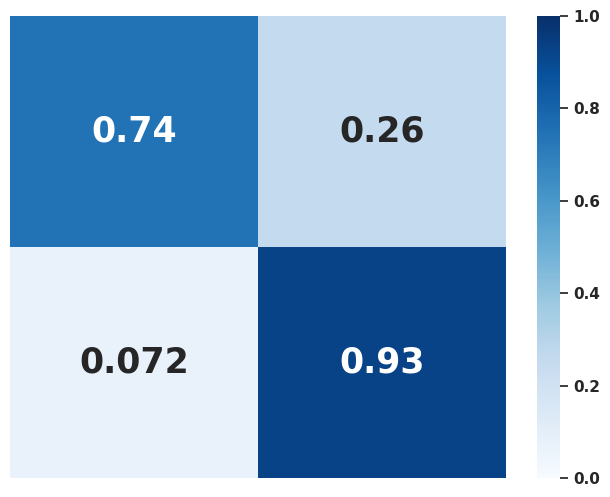

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
accuracy of SVM: [0.72, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.7083333333333334]
Average accuracy of SVM:  0.7856666666666667 
 Standard Deviation of Accuracy: 0.058495963773390204
Confusion matrix raw: 
 [array([[ 4,  4],
       [ 3, 14]]), array([[ 4,  3],
       [ 1, 16]]), array([[ 5,  2],
       [ 2, 15]]), array([[ 6,  1],
       [ 3, 14]]), array([[ 6,  2],
       [ 5, 11]])]
Confusion matrix normalised: 
 [array([[0.5       , 0.5       ],
       [0.17647059, 0.82352941]]), array([[0.57142857, 0.42857143],
       [0.05882353, 0.94117647]]), array([[0.71428571, 0.28571429],
       [0.11764706, 0.88235294]]), array([[0.85714286, 0.14285714],
       [0.17647059, 0.82352941]]), array([[0.75  , 0.25  ],
       [0.3125, 0.6875]])]
average Confusion Matrix: 
 [[0.67857143 0.32142857]
 [0.168

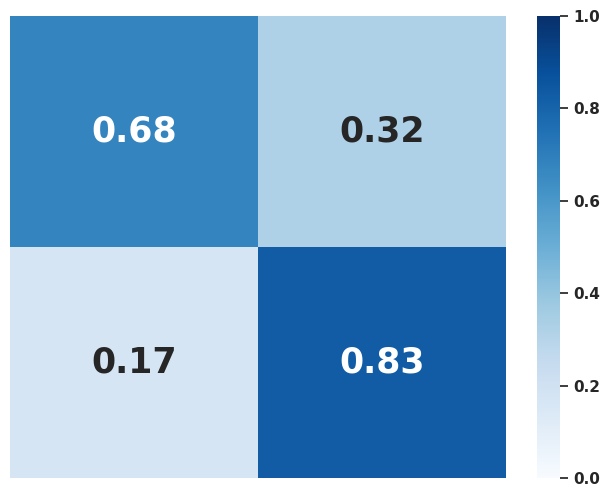

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
accuracy of SVM: [0.7241379310344828, 0.7857142857142857, 0.8928571428571429, 0.7142857142857143, 0.7857142857142857]
Average accuracy of SVM:  0.7805418719211823 
 Standard Deviation of Accuracy: 0.06362312596293693
Confusion matrix raw: 
 [array([[ 6,  5],
       [ 3, 15]]), array([[ 5,  5],
       [ 1, 17]]), array([[10,  1],
       [ 2, 15]]), array([[ 9,  2],
       [ 6, 11]]), array([[ 8,  3],
       [ 3, 14]])]
Confusion matrix normalised: 
 [array([[0.54545455, 0.45454545],
       [0.16666667, 0.83333333]]), array([[0.5       , 0.5       ],
       [0.05555556, 0.94444444]]), array([[0.90909091, 0.09090909],
       [0.11764706, 0.88235294]]), array([[0.81818182, 0.18181818],
       [0.35294118, 0.64705882]]), array([[0.72727273, 0.27272727],
       [0.17647059, 0.82352941]])]
average Confusion Matrix: 

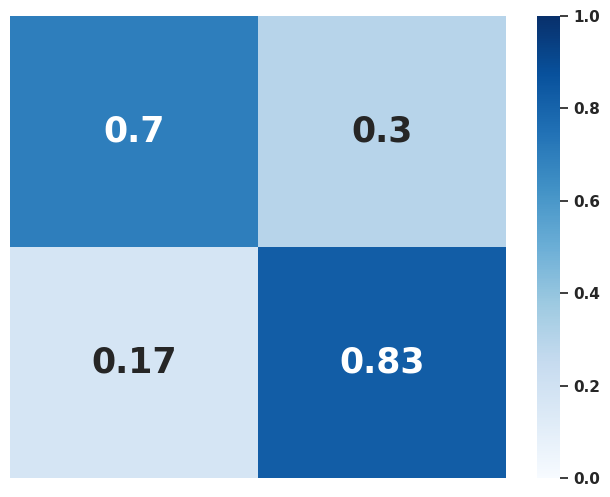

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
accuracy of SVM: [0.76, 0.875, 0.9166666666666666, 0.9583333333333334, 0.8333333333333334]
Average accuracy of SVM:  0.8686666666666667 
 Standard Deviation of Accuracy: 0.06847059385036924
Confusion matrix raw: 
 [array([[ 4,  4],
       [ 2, 15]]), array([[ 4,  3],
       [ 0, 17]]), array([[ 7,  0],
       [ 2, 15]]), array([[ 6,  1],
       [ 0, 17]]), array([[ 6,  2],
       [ 2, 14]])]
Confusion matrix normalised: 
 [array([[0.5       , 0.5       ],
       [0.11764706, 0.88235294]]), array([[0.57142857, 0.42857143],
       [0.        , 1.        ]]), array([[1.        , 0.        ],
       [0.11764706, 0.88235294]]), array([[0.85714286, 0.14285714],
       [0.        , 1.        ]]), array([[0.75 , 0.25 ],
       [0.125, 0.875]])]
average Confusion Matrix: 
 [[0.73571429 0.26428571]
 [0.07

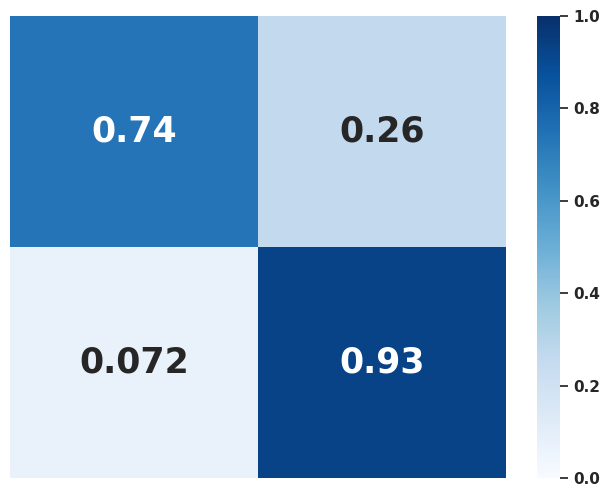

----------------------------------------------------------------------


In [137]:
# For Random Forest IDH meanFD
for i in lst2:
    print('-' *70)
    print("for",i)
    df4 = df3.dropna(subset=i)
    X = df4[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df4[['IDH_status']]

    y = Y == 'WT'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = RandomForestClassifier(n_estimators=10, random_state=42)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


----------------------------------------------------------------------
for ['et_meanlac']
122
accuracy of SVM: [0.64, 0.84, 0.875, 0.875, 0.75]
Average accuracy of SVM:  0.796 
 Standard Deviation of Accuracy: 0.09041017641836564
Confusion matrix raw: 
 [array([[ 3,  5],
       [ 4, 13]]), array([[ 4,  4],
       [ 0, 17]]), array([[ 4,  3],
       [ 0, 17]]), array([[ 6,  1],
       [ 2, 15]]), array([[ 5,  3],
       [ 3, 13]])]
Confusion matrix normalised: 
 [array([[0.375     , 0.625     ],
       [0.23529412, 0.76470588]]), array([[0.5, 0.5],
       [0. , 1. ]]), array([[0.57142857, 0.42857143],
       [0.        , 1.        ]]), array([[0.85714286, 0.14285714],
       [0.11764706, 0.88235294]]), array([[0.625 , 0.375 ],
       [0.1875, 0.8125]])]
average Confusion Matrix: 
 [[0.58571429 0.41428571]
 [0.10808824 0.89191176]]


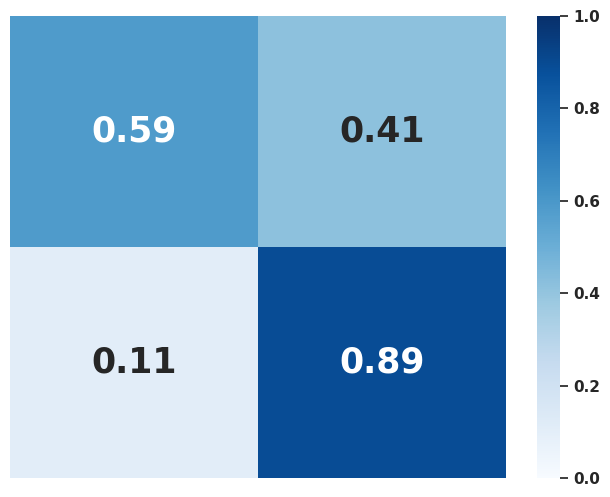

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
142
accuracy of SVM: [0.7931034482758621, 0.8275862068965517, 0.8928571428571429, 0.8571428571428571, 0.8214285714285714]
Average accuracy of SVM:  0.838423645320197 
 Standard Deviation of Accuracy: 0.03398122250205773
Confusion matrix raw: 
 [array([[ 8,  3],
       [ 3, 15]]), array([[ 6,  5],
       [ 0, 18]]), array([[10,  1],
       [ 2, 15]]), array([[ 9,  2],
       [ 2, 15]]), array([[ 9,  2],
       [ 3, 14]])]
Confusion matrix normalised: 
 [array([[0.72727273, 0.27272727],
       [0.16666667, 0.83333333]]), array([[0.54545455, 0.45454545],
       [0.        , 1.        ]]), array([[0.90909091, 0.09090909],
       [0.11764706, 0.88235294]]), array([[0.81818182, 0.18181818],
       [0.11764706, 0.88235294]]), array([[0.81818182, 0.18181818],
       [0.17647059, 0.82352941]])]
average Confusion Matrix: 
 [[0.76363

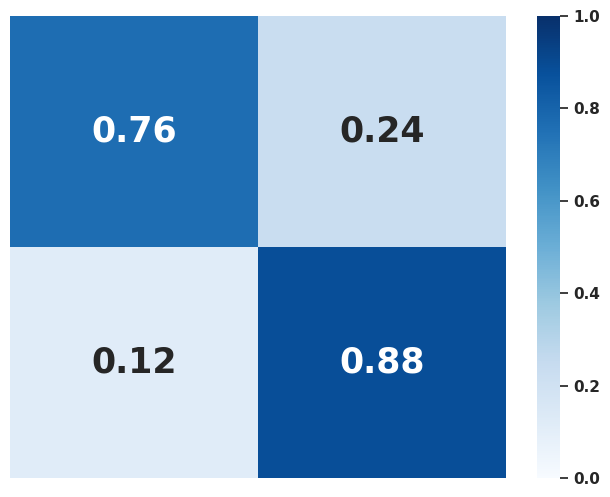

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
141
accuracy of SVM: [0.6206896551724138, 0.5714285714285714, 0.5357142857142857, 0.5714285714285714, 0.42857142857142855]
Average accuracy of SVM:  0.5455665024630542 
 Standard Deviation of Accuracy: 0.06444547274265239
Confusion matrix raw: 
 [array([[ 4,  7],
       [ 4, 14]]), array([[ 2,  8],
       [ 4, 14]]), array([[ 4,  7],
       [ 6, 11]]), array([[ 5,  6],
       [ 6, 11]]), array([[3, 8],
       [8, 9]])]
Confusion matrix normalised: 
 [array([[0.36363636, 0.63636364],
       [0.22222222, 0.77777778]]), array([[0.2       , 0.8       ],
       [0.22222222, 0.77777778]]), array([[0.36363636, 0.63636364],
       [0.35294118, 0.64705882]]), array([[0.45454545, 0.54545455],
       [0.35294118, 0.64705882]]), array([[0.27272727, 0.72727273],
       [0.47058824, 0.52941176]])]
average Confusion Matrix: 
 [[0.33090909 0.6

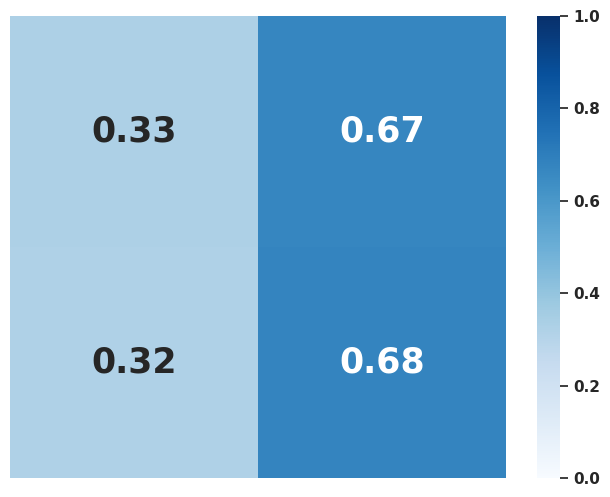

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
122
accuracy of SVM: [0.8, 0.88, 1.0, 0.875, 0.875]
Average accuracy of SVM:  0.8859999999999999 
 Standard Deviation of Accuracy: 0.06429618962271401
Confusion matrix raw: 
 [array([[ 3,  5],
       [ 0, 17]]), array([[ 5,  3],
       [ 0, 17]]), array([[ 7,  0],
       [ 0, 17]]), array([[ 6,  1],
       [ 2, 15]]), array([[ 7,  1],
       [ 2, 14]])]
Confusion matrix normalised: 
 [array([[0.375, 0.625],
       [0.   , 1.   ]]), array([[0.625, 0.375],
       [0.   , 1.   ]]), array([[1., 0.],
       [0., 1.]]), array([[0.85714286, 0.14285714],
       [0.11764706, 0.88235294]]), array([[0.875, 0.125],
       [0.125, 0.875]])]
average Confusion Matrix: 
 [[0.74642857 0.25357143]
 [0.04852941 0.95147059]]


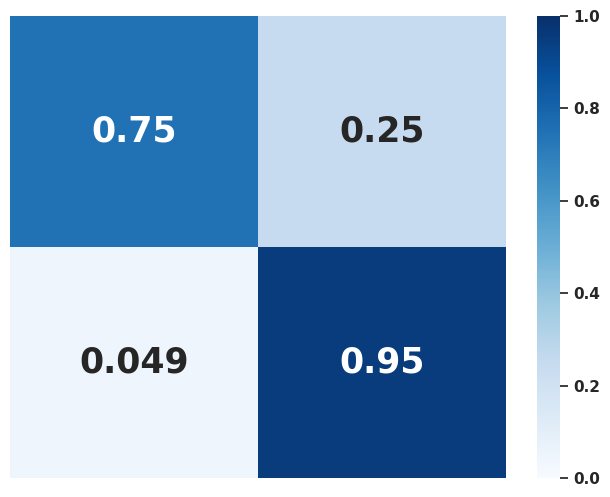

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
121
accuracy of SVM: [0.72, 0.8333333333333334, 0.875, 0.9583333333333334, 0.7083333333333334]
Average accuracy of SVM:  0.819 
 Standard Deviation of Accuracy: 0.09466079794015403
Confusion matrix raw: 
 [array([[ 4,  4],
       [ 3, 14]]), array([[ 3,  4],
       [ 0, 17]]), array([[ 5,  2],
       [ 1, 16]]), array([[ 6,  1],
       [ 0, 17]]), array([[ 4,  4],
       [ 3, 13]])]
Confusion matrix normalised: 
 [array([[0.5       , 0.5       ],
       [0.17647059, 0.82352941]]), array([[0.42857143, 0.57142857],
       [0.        , 1.        ]]), array([[0.71428571, 0.28571429],
       [0.05882353, 0.94117647]]), array([[0.85714286, 0.14285714],
       [0.        , 1.        ]]), array([[0.5   , 0.5   ],
       [0.1875, 0.8125]])]
average Confusion Matrix: 
 [[0.6        0.4       ]
 [0.08455882 0.91544118]]


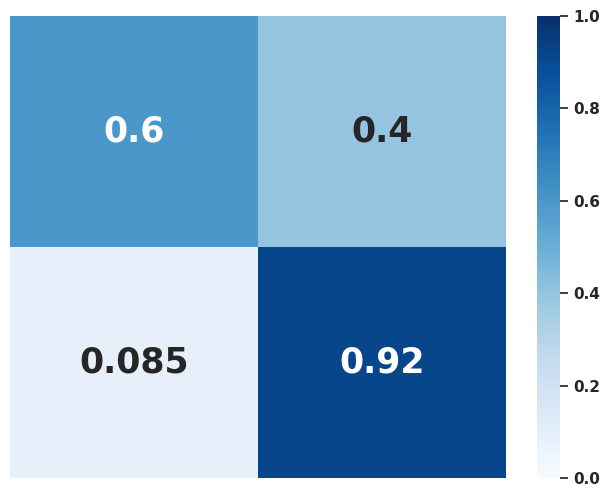

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
141
accuracy of SVM: [0.8275862068965517, 0.8571428571428571, 0.8571428571428571, 0.8214285714285714, 0.8214285714285714]
Average accuracy of SVM:  0.8369458128078817 
 Standard Deviation of Accuracy: 0.016643394981799155
Confusion matrix raw: 
 [array([[ 9,  2],
       [ 3, 15]]), array([[ 7,  3],
       [ 1, 17]]), array([[10,  1],
       [ 3, 14]]), array([[ 9,  2],
       [ 3, 14]]), array([[ 9,  2],
       [ 3, 14]])]
Confusion matrix normalised: 
 [array([[0.81818182, 0.18181818],
       [0.16666667, 0.83333333]]), array([[0.7       , 0.3       ],
       [0.05555556, 0.94444444]]), array([[0.90909091, 0.09090909],
       [0.17647059, 0.82352941]]), array([[0.81818182, 0.18181818],
       [0.17647059, 0.82352941]]), array([[0.81818182, 0.18181818],
       [0.17647059, 0.82352941]])]
average Confusion Mat

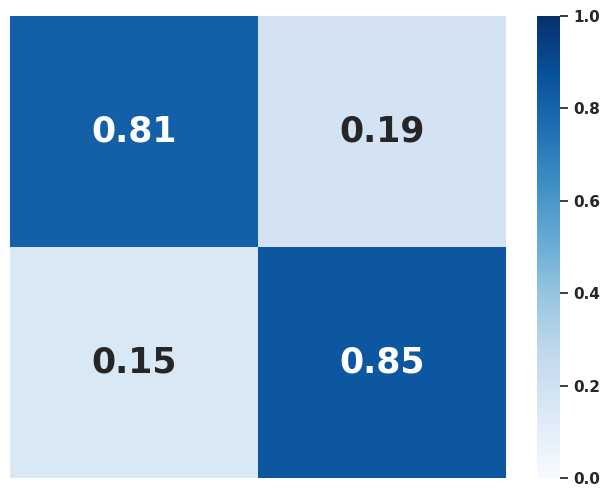

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
121
accuracy of SVM: [0.84, 0.875, 1.0, 0.9583333333333334, 0.8333333333333334]
Average accuracy of SVM:  0.9013333333333333 
 Standard Deviation of Accuracy: 0.06642790578263526
Confusion matrix raw: 
 [array([[ 4,  4],
       [ 0, 17]]), array([[ 4,  3],
       [ 0, 17]]), array([[ 7,  0],
       [ 0, 17]]), array([[ 7,  0],
       [ 1, 16]]), array([[ 6,  2],
       [ 2, 14]])]
Confusion matrix normalised: 
 [array([[0.5, 0.5],
       [0. , 1. ]]), array([[0.57142857, 0.42857143],
       [0.        , 1.        ]]), array([[1., 0.],
       [0., 1.]]), array([[1.        , 0.        ],
       [0.05882353, 0.94117647]]), array([[0.75 , 0.25 ],
       [0.125, 0.875]])]
average Confusion Matrix: 
 [[0.76428571 0.23571429]
 [0.03676471 0.96323529]]


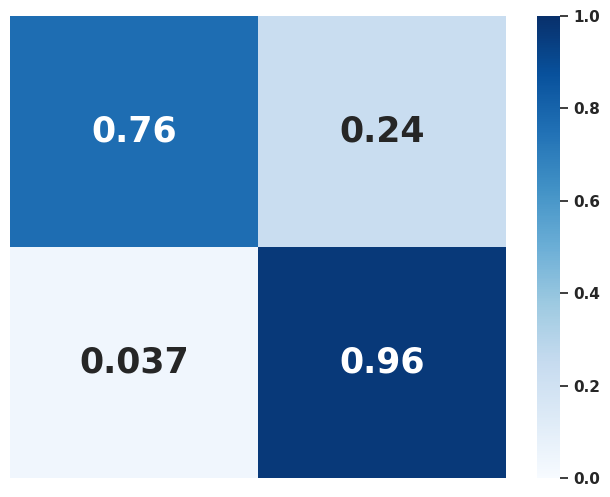

----------------------------------------------------------------------


In [138]:
# For KNN meanIDH_FD
for i in lst2:
    print('-' *70)
    print("for",i)
    df4 = df3.dropna(subset=i)
    print(len(df4))
    X = df4[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df4[['IDH_status']]

    y = Y == 'WT'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = KNeighborsClassifier(10)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


## MGMT fractal dimension

In [139]:
df5 = df.dropna(subset='MGMT_promoter_status')

----------------------------------------------------------------------
for ['et_meanfd']
accuracy of SVM: [0.36, 0.52, 0.6, 0.64, 0.6666666666666666]
Average accuracy of SVM:  0.5573333333333333 
 Standard Deviation of Accuracy: 0.1104012882372504
Confusion matrix raw: 
 [array([[ 5,  5],
       [11,  4]]), array([[5, 5],
       [7, 8]]), array([[ 0, 10],
       [ 0, 15]]), array([[ 0,  9],
       [ 0, 16]]), array([[ 1,  8],
       [ 0, 15]])]
Confusion matrix normalised: 
 [array([[0.5       , 0.5       ],
       [0.73333333, 0.26666667]]), array([[0.5       , 0.5       ],
       [0.46666667, 0.53333333]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]]), array([[0.11111111, 0.88888889],
       [0.        , 1.        ]])]
average Confusion Matrix: 
 [[0.22222222 0.77777778]
 [0.24       0.76      ]]


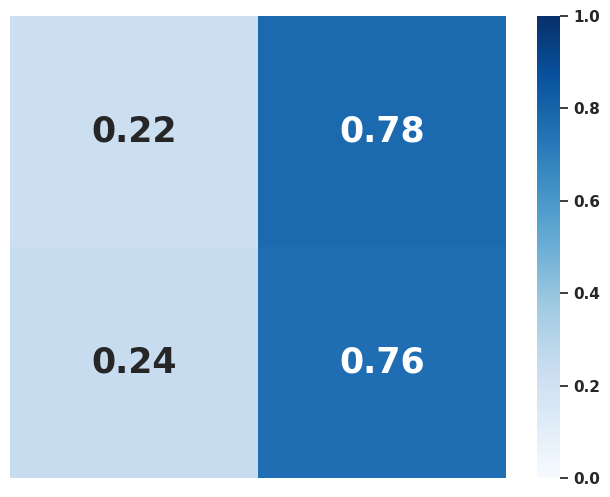

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd']
accuracy of SVM: [0.64, 0.6, 0.56, 0.68, 0.7083333333333334]
Average accuracy of SVM:  0.6376666666666667 
 Standard Deviation of Accuracy: 0.05337082015900116
Confusion matrix raw: 
 [array([[8, 2],
       [7, 8]]), array([[6, 4],
       [6, 9]]), array([[ 1,  9],
       [ 2, 13]]), array([[ 4,  5],
       [ 3, 13]]), array([[ 5,  4],
       [ 3, 12]])]
Confusion matrix normalised: 
 [array([[0.8       , 0.2       ],
       [0.46666667, 0.53333333]]), array([[0.6, 0.4],
       [0.4, 0.6]]), array([[0.1       , 0.9       ],
       [0.13333333, 0.86666667]]), array([[0.44444444, 0.55555556],
       [0.1875    , 0.8125    ]]), array([[0.55555556, 0.44444444],
       [0.2       , 0.8       ]])]
average Confusion Matrix: 
 [[0.5    0.5   ]
 [0.2775 0.7225]]


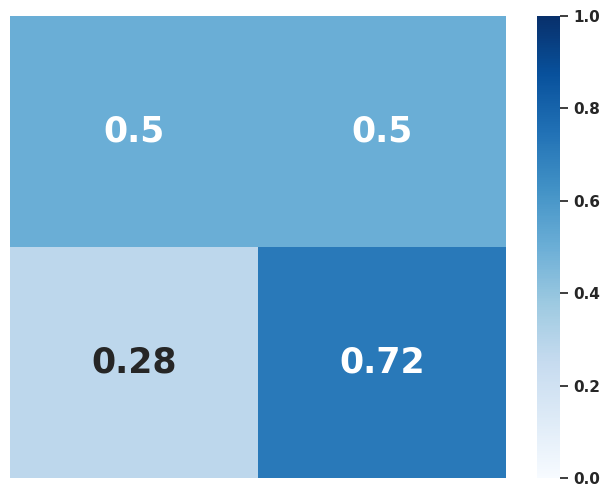

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd']
accuracy of SVM: [0.6, 0.6, 0.6, 0.64, 0.625]
Average accuracy of SVM:  0.613 
 Standard Deviation of Accuracy: 0.016613247725836167
Confusion matrix raw: 
 [array([[ 0, 10],
       [ 0, 15]]), array([[ 0, 10],
       [ 0, 15]]), array([[ 0, 10],
       [ 0, 15]]), array([[ 0,  9],
       [ 0, 16]]), array([[ 0,  9],
       [ 0, 15]])]
Confusion matrix normalised: 
 [array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]])]
average Confusion Matrix: 
 [[0. 1.]
 [0. 1.]]


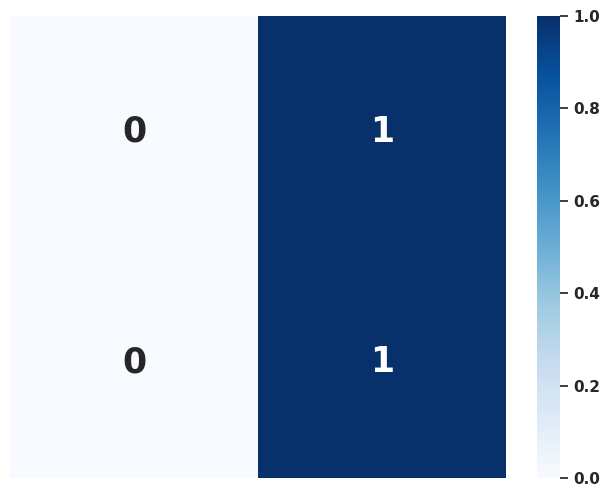

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd']
accuracy of SVM: [0.36, 0.44, 0.56, 0.72, 0.7083333333333334]
Average accuracy of SVM:  0.5576666666666668 
 Standard Deviation of Accuracy: 0.14281145301099318
Confusion matrix raw: 
 [array([[ 9,  1],
       [15,  0]]), array([[ 6,  4],
       [10,  5]]), array([[ 1,  9],
       [ 2, 13]]), array([[ 2,  7],
       [ 0, 16]]), array([[ 4,  5],
       [ 2, 13]])]
Confusion matrix normalised: 
 [array([[0.9, 0.1],
       [1. , 0. ]]), array([[0.6       , 0.4       ],
       [0.66666667, 0.33333333]]), array([[0.1       , 0.9       ],
       [0.13333333, 0.86666667]]), array([[0.22222222, 0.77777778],
       [0.        , 1.        ]]), array([[0.44444444, 0.55555556],
       [0.13333333, 0.86666667]])]
average Confusion Matrix: 
 [[0.45333333 0.54666667]
 [0.38666667 0.61333333]]


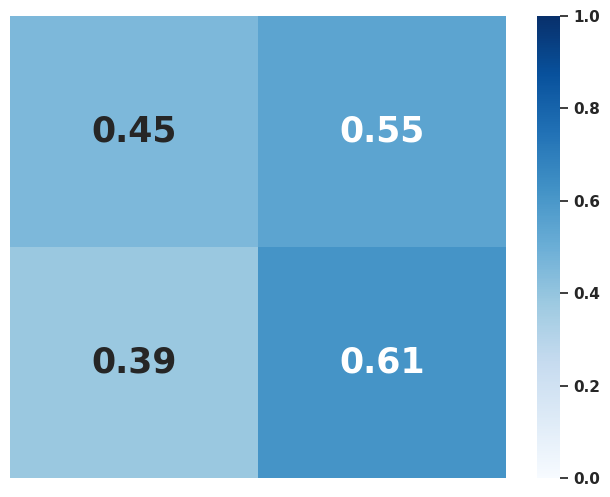

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd']
accuracy of SVM: [0.36, 0.52, 0.6, 0.64, 0.625]
Average accuracy of SVM:  0.549 
 Standard Deviation of Accuracy: 0.10316976301223146
Confusion matrix raw: 
 [array([[ 6,  4],
       [12,  3]]), array([[4, 6],
       [6, 9]]), array([[ 0, 10],
       [ 0, 15]]), array([[ 0,  9],
       [ 0, 16]]), array([[ 0,  9],
       [ 0, 15]])]
Confusion matrix normalised: 
 [array([[0.6, 0.4],
       [0.8, 0.2]]), array([[0.4, 0.6],
       [0.4, 0.6]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]])]
average Confusion Matrix: 
 [[0.2  0.8 ]
 [0.24 0.76]]


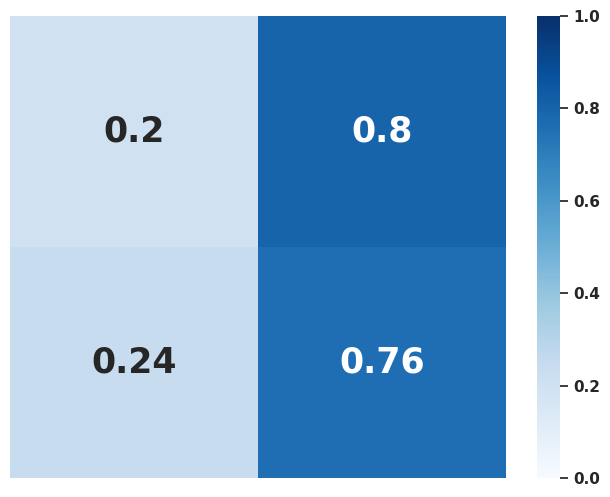

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd']
accuracy of SVM: [0.64, 0.64, 0.56, 0.76, 0.75]
Average accuracy of SVM:  0.67 
 Standard Deviation of Accuracy: 0.07536577472566706
Confusion matrix raw: 
 [array([[7, 3],
       [6, 9]]), array([[ 5,  5],
       [ 4, 11]]), array([[ 1,  9],
       [ 2, 13]]), array([[ 3,  6],
       [ 0, 16]]), array([[ 5,  4],
       [ 2, 13]])]
Confusion matrix normalised: 
 [array([[0.7, 0.3],
       [0.4, 0.6]]), array([[0.5       , 0.5       ],
       [0.26666667, 0.73333333]]), array([[0.1       , 0.9       ],
       [0.13333333, 0.86666667]]), array([[0.33333333, 0.66666667],
       [0.        , 1.        ]]), array([[0.55555556, 0.44444444],
       [0.13333333, 0.86666667]])]
average Confusion Matrix: 
 [[0.43777778 0.56222222]
 [0.18666667 0.81333333]]


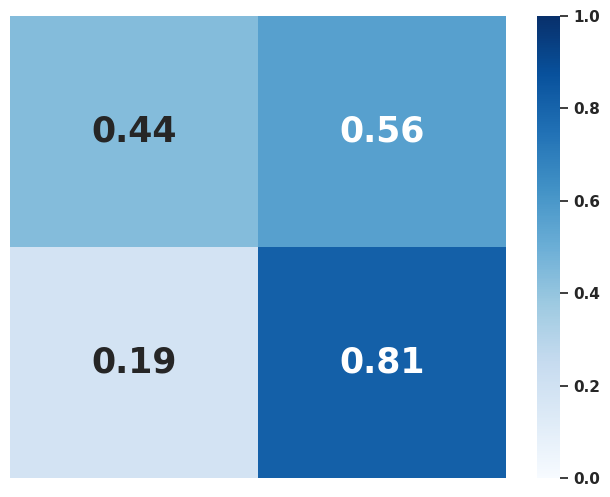

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd']
accuracy of SVM: [0.4, 0.56, 0.56, 0.72, 0.75]
Average accuracy of SVM:  0.5980000000000001 
 Standard Deviation of Accuracy: 0.12655433615645098
Confusion matrix raw: 
 [array([[10,  0],
       [15,  0]]), array([[6, 4],
       [7, 8]]), array([[ 1,  9],
       [ 2, 13]]), array([[ 2,  7],
       [ 0, 16]]), array([[ 4,  5],
       [ 1, 14]])]
Confusion matrix normalised: 
 [array([[1., 0.],
       [1., 0.]]), array([[0.6       , 0.4       ],
       [0.46666667, 0.53333333]]), array([[0.1       , 0.9       ],
       [0.13333333, 0.86666667]]), array([[0.22222222, 0.77777778],
       [0.        , 1.        ]]), array([[0.44444444, 0.55555556],
       [0.06666667, 0.93333333]])]
average Confusion Matrix: 
 [[0.47333333 0.52666667]
 [0.33333333 0.66666667]]


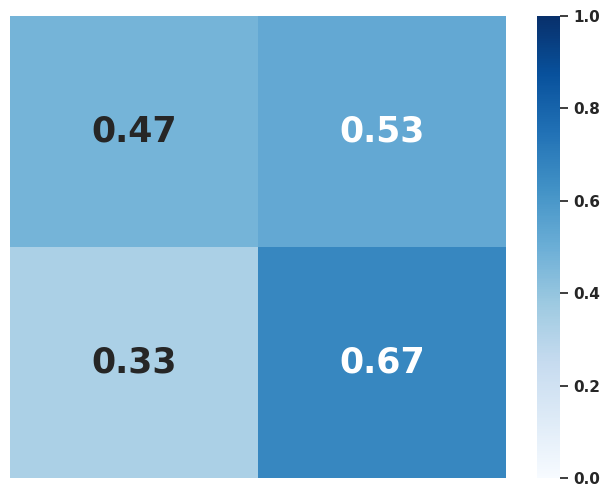

----------------------------------------------------------------------


In [140]:
# For SVM MGMT meanFD
for i in lst1:
    print('-' *70)
    print("for",i)
    X = df5[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df5[['MGMT_promoter_status']]

    y = Y == 'Meth'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = svm.SVC(random_state=42)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


----------------------------------------------------------------------
for ['et_meanfd']
accuracy of SVM: [0.56, 0.52, 0.64, 0.64, 0.625]
Average accuracy of SVM:  0.5970000000000001 
 Standard Deviation of Accuracy: 0.04853864439804637
Confusion matrix raw: 
 [array([[5, 5],
       [6, 9]]), array([[6, 4],
       [8, 7]]), array([[ 6,  4],
       [ 5, 10]]), array([[ 3,  6],
       [ 3, 13]]), array([[ 3,  6],
       [ 3, 12]])]
Confusion matrix normalised: 
 [array([[0.5, 0.5],
       [0.4, 0.6]]), array([[0.6       , 0.4       ],
       [0.53333333, 0.46666667]]), array([[0.6       , 0.4       ],
       [0.33333333, 0.66666667]]), array([[0.33333333, 0.66666667],
       [0.1875    , 0.8125    ]]), array([[0.33333333, 0.66666667],
       [0.2       , 0.8       ]])]
average Confusion Matrix: 
 [[0.47333333 0.52666667]
 [0.33083333 0.66916667]]


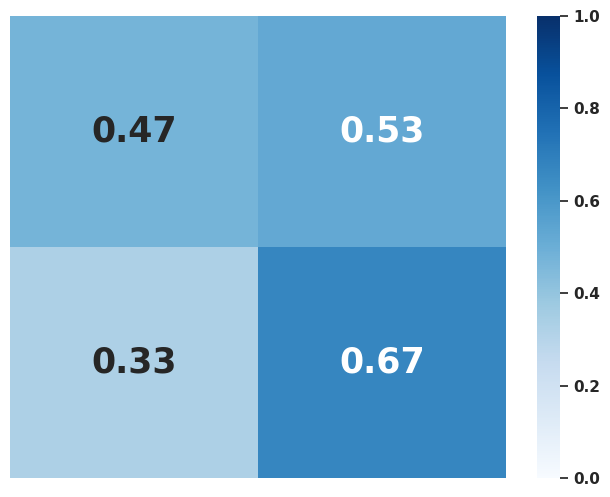

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd']
accuracy of SVM: [0.64, 0.52, 0.72, 0.6, 0.4583333333333333]
Average accuracy of SVM:  0.5876666666666667 
 Standard Deviation of Accuracy: 0.09133333333333334
Confusion matrix raw: 
 [array([[7, 3],
       [6, 9]]), array([[ 2,  8],
       [ 4, 11]]), array([[ 7,  3],
       [ 4, 11]]), array([[ 5,  4],
       [ 6, 10]]), array([[ 1,  8],
       [ 5, 10]])]
Confusion matrix normalised: 
 [array([[0.7, 0.3],
       [0.4, 0.6]]), array([[0.2       , 0.8       ],
       [0.26666667, 0.73333333]]), array([[0.7       , 0.3       ],
       [0.26666667, 0.73333333]]), array([[0.55555556, 0.44444444],
       [0.375     , 0.625     ]]), array([[0.11111111, 0.88888889],
       [0.33333333, 0.66666667]])]
average Confusion Matrix: 
 [[0.45333333 0.54666667]
 [0.32833333 0.67166667]]


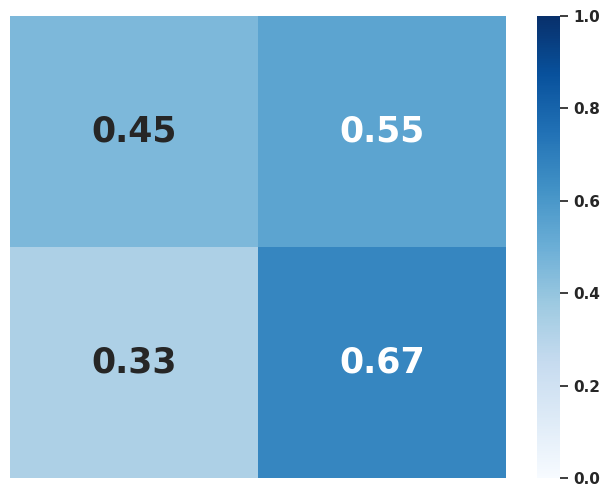

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd']
accuracy of SVM: [0.68, 0.6, 0.52, 0.48, 0.5833333333333334]
Average accuracy of SVM:  0.5726666666666668 
 Standard Deviation of Accuracy: 0.06890895765025362
Confusion matrix raw: 
 [array([[ 7,  3],
       [ 5, 10]]), array([[8, 2],
       [8, 7]]), array([[ 3,  7],
       [ 5, 10]]), array([[3, 6],
       [7, 9]]), array([[5, 4],
       [6, 9]])]
Confusion matrix normalised: 
 [array([[0.7       , 0.3       ],
       [0.33333333, 0.66666667]]), array([[0.8       , 0.2       ],
       [0.53333333, 0.46666667]]), array([[0.3       , 0.7       ],
       [0.33333333, 0.66666667]]), array([[0.33333333, 0.66666667],
       [0.4375    , 0.5625    ]]), array([[0.55555556, 0.44444444],
       [0.4       , 0.6       ]])]
average Confusion Matrix: 
 [[0.53777778 0.46222222]
 [0.4075     0.5925    ]]


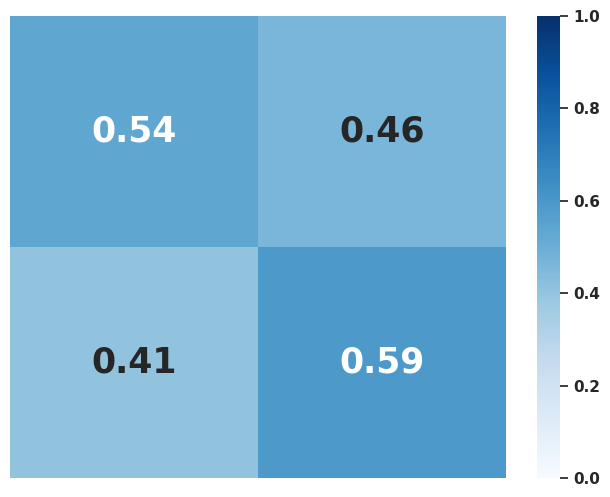

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd']
accuracy of SVM: [0.6, 0.52, 0.64, 0.68, 0.7083333333333334]
Average accuracy of SVM:  0.6296666666666668 
 Standard Deviation of Accuracy: 0.06593262554389225
Confusion matrix raw: 
 [array([[8, 2],
       [8, 7]]), array([[7, 3],
       [9, 6]]), array([[ 5,  5],
       [ 4, 11]]), array([[ 5,  4],
       [ 4, 12]]), array([[ 4,  5],
       [ 2, 13]])]
Confusion matrix normalised: 
 [array([[0.8       , 0.2       ],
       [0.53333333, 0.46666667]]), array([[0.7, 0.3],
       [0.6, 0.4]]), array([[0.5       , 0.5       ],
       [0.26666667, 0.73333333]]), array([[0.55555556, 0.44444444],
       [0.25      , 0.75      ]]), array([[0.44444444, 0.55555556],
       [0.13333333, 0.86666667]])]
average Confusion Matrix: 
 [[0.6        0.4       ]
 [0.35666667 0.64333333]]


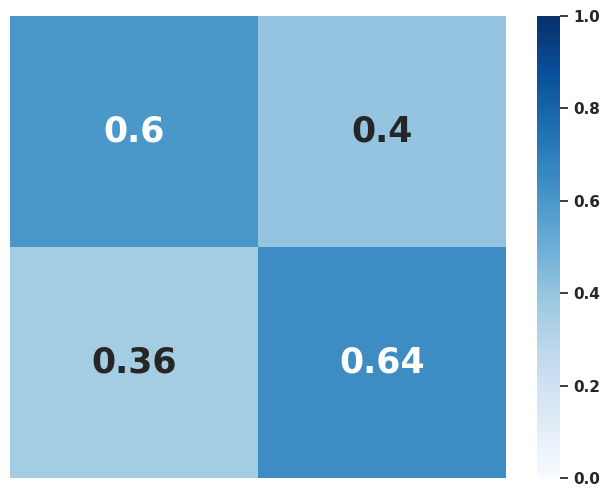

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd']
accuracy of SVM: [0.52, 0.44, 0.44, 0.68, 0.75]
Average accuracy of SVM:  0.5660000000000001 
 Standard Deviation of Accuracy: 0.12705904139414873
Confusion matrix raw: 
 [array([[5, 5],
       [7, 8]]), array([[ 6,  4],
       [10,  5]]), array([[5, 5],
       [9, 6]]), array([[ 3,  6],
       [ 2, 14]]), array([[ 3,  6],
       [ 0, 15]])]
Confusion matrix normalised: 
 [array([[0.5       , 0.5       ],
       [0.46666667, 0.53333333]]), array([[0.6       , 0.4       ],
       [0.66666667, 0.33333333]]), array([[0.5, 0.5],
       [0.6, 0.4]]), array([[0.33333333, 0.66666667],
       [0.125     , 0.875     ]]), array([[0.33333333, 0.66666667],
       [0.        , 1.        ]])]
average Confusion Matrix: 
 [[0.45333333 0.54666667]
 [0.37166667 0.62833333]]


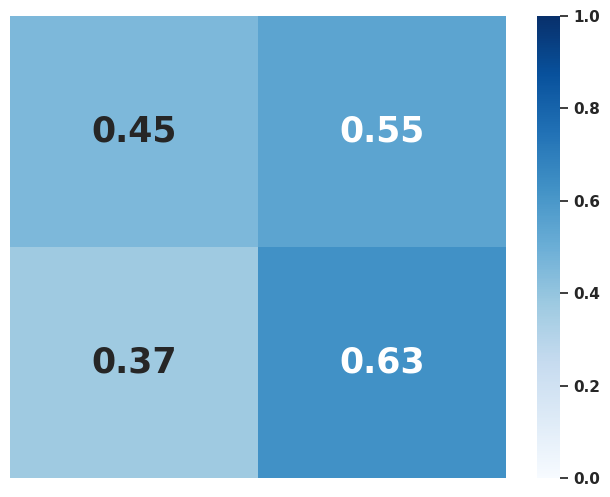

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd']
accuracy of SVM: [0.52, 0.44, 0.72, 0.6, 0.6666666666666666]
Average accuracy of SVM:  0.5893333333333333 
 Standard Deviation of Accuracy: 0.10027517694380354
Confusion matrix raw: 
 [array([[7, 3],
       [9, 6]]), array([[3, 7],
       [7, 8]]), array([[ 7,  3],
       [ 4, 11]]), array([[ 3,  6],
       [ 4, 12]]), array([[ 5,  4],
       [ 4, 11]])]
Confusion matrix normalised: 
 [array([[0.7, 0.3],
       [0.6, 0.4]]), array([[0.3       , 0.7       ],
       [0.46666667, 0.53333333]]), array([[0.7       , 0.3       ],
       [0.26666667, 0.73333333]]), array([[0.33333333, 0.66666667],
       [0.25      , 0.75      ]]), array([[0.55555556, 0.44444444],
       [0.26666667, 0.73333333]])]
average Confusion Matrix: 
 [[0.51777778 0.48222222]
 [0.37       0.63      ]]


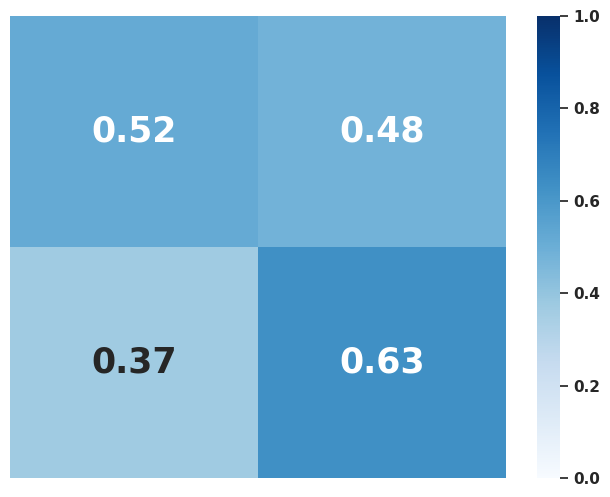

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd']
accuracy of SVM: [0.6, 0.48, 0.68, 0.64, 0.75]
Average accuracy of SVM:  0.6300000000000001 
 Standard Deviation of Accuracy: 0.08988882021697694
Confusion matrix raw: 
 [array([[8, 2],
       [8, 7]]), array([[6, 4],
       [9, 6]]), array([[ 5,  5],
       [ 3, 12]]), array([[ 2,  7],
       [ 2, 14]]), array([[ 4,  5],
       [ 1, 14]])]
Confusion matrix normalised: 
 [array([[0.8       , 0.2       ],
       [0.53333333, 0.46666667]]), array([[0.6, 0.4],
       [0.6, 0.4]]), array([[0.5, 0.5],
       [0.2, 0.8]]), array([[0.22222222, 0.77777778],
       [0.125     , 0.875     ]]), array([[0.44444444, 0.55555556],
       [0.06666667, 0.93333333]])]
average Confusion Matrix: 
 [[0.51333333 0.48666667]
 [0.305      0.695     ]]


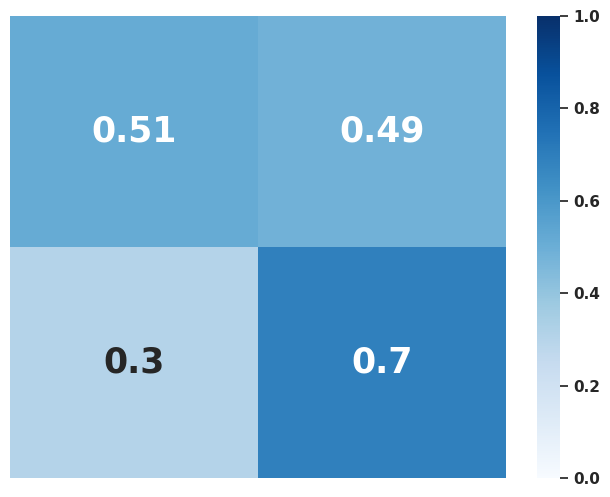

----------------------------------------------------------------------


In [141]:
# For SVM IDH meanFD
for i in lst1:
    print('-' *70)
    print("for",i)
    X = df5[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df5[['MGMT_promoter_status']]

    y = Y == 'Meth'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = RandomForestClassifier(n_estimators=10, random_state=42)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


----------------------------------------------------------------------
for ['et_meanfd']
accuracy of SVM: [0.4, 0.52, 0.6, 0.68, 0.6666666666666666]
Average accuracy of SVM:  0.5733333333333334 
 Standard Deviation of Accuracy: 0.10362324921453571
Confusion matrix raw: 
 [array([[ 6,  4],
       [11,  4]]), array([[6, 4],
       [8, 7]]), array([[ 5,  5],
       [ 5, 10]]), array([[ 5,  4],
       [ 4, 12]]), array([[ 2,  7],
       [ 1, 14]])]
Confusion matrix normalised: 
 [array([[0.6       , 0.4       ],
       [0.73333333, 0.26666667]]), array([[0.6       , 0.4       ],
       [0.53333333, 0.46666667]]), array([[0.5       , 0.5       ],
       [0.33333333, 0.66666667]]), array([[0.55555556, 0.44444444],
       [0.25      , 0.75      ]]), array([[0.22222222, 0.77777778],
       [0.06666667, 0.93333333]])]
average Confusion Matrix: 
 [[0.49555556 0.50444444]
 [0.38333333 0.61666667]]


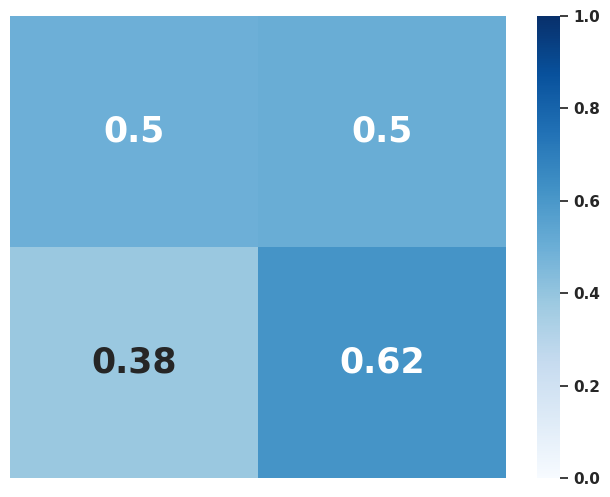

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd']
accuracy of SVM: [0.6, 0.56, 0.72, 0.64, 0.6666666666666666]
Average accuracy of SVM:  0.6373333333333333 
 Standard Deviation of Accuracy: 0.05491002741859731
Confusion matrix raw: 
 [array([[8, 2],
       [8, 7]]), array([[ 4,  6],
       [ 5, 10]]), array([[ 5,  5],
       [ 2, 13]]), array([[ 3,  6],
       [ 3, 13]]), array([[ 3,  6],
       [ 2, 13]])]
Confusion matrix normalised: 
 [array([[0.8       , 0.2       ],
       [0.53333333, 0.46666667]]), array([[0.4       , 0.6       ],
       [0.33333333, 0.66666667]]), array([[0.5       , 0.5       ],
       [0.13333333, 0.86666667]]), array([[0.33333333, 0.66666667],
       [0.1875    , 0.8125    ]]), array([[0.33333333, 0.66666667],
       [0.13333333, 0.86666667]])]
average Confusion Matrix: 
 [[0.47333333 0.52666667]
 [0.26416667 0.73583333]]


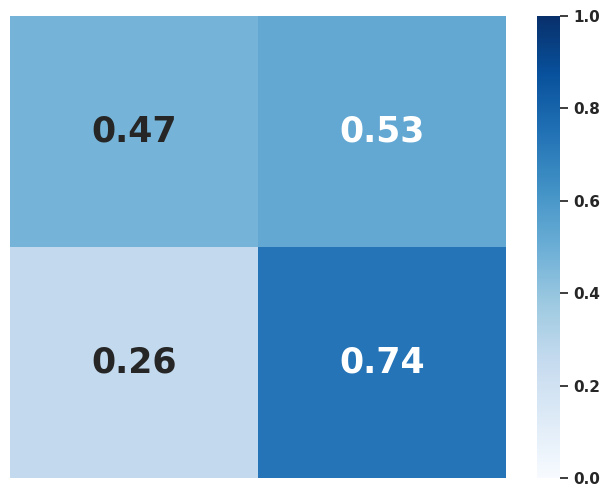

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanfd']
accuracy of SVM: [0.4, 0.52, 0.52, 0.48, 0.5833333333333334]
Average accuracy of SVM:  0.5006666666666667 
 Standard Deviation of Accuracy: 0.0602365706564081
Confusion matrix raw: 
 [array([[4, 6],
       [9, 6]]), array([[5, 5],
       [7, 8]]), array([[4, 6],
       [6, 9]]), array([[3, 6],
       [7, 9]]), array([[ 3,  6],
       [ 4, 11]])]
Confusion matrix normalised: 
 [array([[0.4, 0.6],
       [0.6, 0.4]]), array([[0.5       , 0.5       ],
       [0.46666667, 0.53333333]]), array([[0.4, 0.6],
       [0.4, 0.6]]), array([[0.33333333, 0.66666667],
       [0.4375    , 0.5625    ]]), array([[0.33333333, 0.66666667],
       [0.26666667, 0.73333333]])]
average Confusion Matrix: 
 [[0.39333333 0.60666667]
 [0.43416667 0.56583333]]


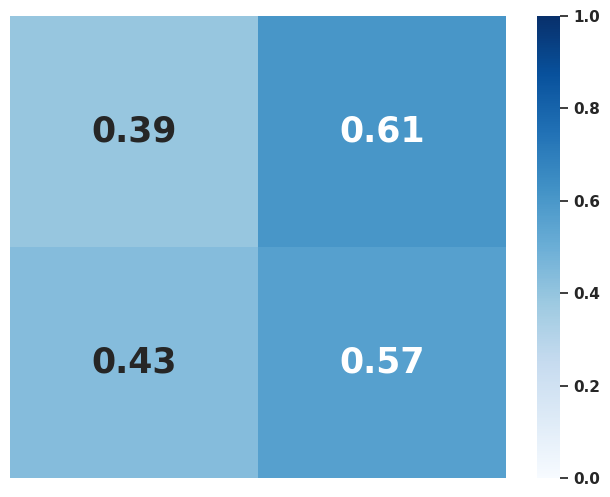

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'et_meanfd']
accuracy of SVM: [0.44, 0.44, 0.64, 0.76, 0.6666666666666666]
Average accuracy of SVM:  0.5893333333333334 
 Standard Deviation of Accuracy: 0.12827747702192738
Confusion matrix raw: 
 [array([[10,  0],
       [14,  1]]), array([[5, 5],
       [9, 6]]), array([[ 6,  4],
       [ 5, 10]]), array([[ 3,  6],
       [ 0, 16]]), array([[ 4,  5],
       [ 3, 12]])]
Confusion matrix normalised: 
 [array([[1.        , 0.        ],
       [0.93333333, 0.06666667]]), array([[0.5, 0.5],
       [0.6, 0.4]]), array([[0.6       , 0.4       ],
       [0.33333333, 0.66666667]]), array([[0.33333333, 0.66666667],
       [0.        , 1.        ]]), array([[0.44444444, 0.55555556],
       [0.2       , 0.8       ]])]
average Confusion Matrix: 
 [[0.57555556 0.42444444]
 [0.41333333 0.58666667]]


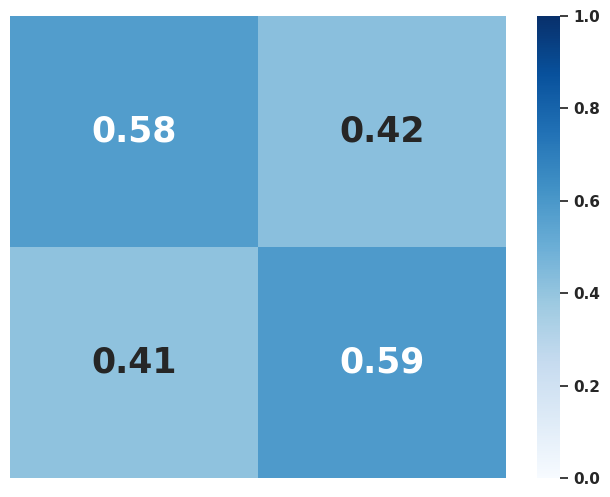

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ed_meanfd']
accuracy of SVM: [0.32, 0.52, 0.6, 0.8, 0.6666666666666666]
Average accuracy of SVM:  0.5813333333333334 
 Standard Deviation of Accuracy: 0.15968858583018528
Confusion matrix raw: 
 [array([[ 5,  5],
       [12,  3]]), array([[6, 4],
       [8, 7]]), array([[6, 4],
       [6, 9]]), array([[ 5,  4],
       [ 1, 15]]), array([[ 2,  7],
       [ 1, 14]])]
Confusion matrix normalised: 
 [array([[0.5, 0.5],
       [0.8, 0.2]]), array([[0.6       , 0.4       ],
       [0.53333333, 0.46666667]]), array([[0.6, 0.4],
       [0.4, 0.6]]), array([[0.55555556, 0.44444444],
       [0.0625    , 0.9375    ]]), array([[0.22222222, 0.77777778],
       [0.06666667, 0.93333333]])]
average Confusion Matrix: 
 [[0.49555556 0.50444444]
 [0.3725     0.6275    ]]


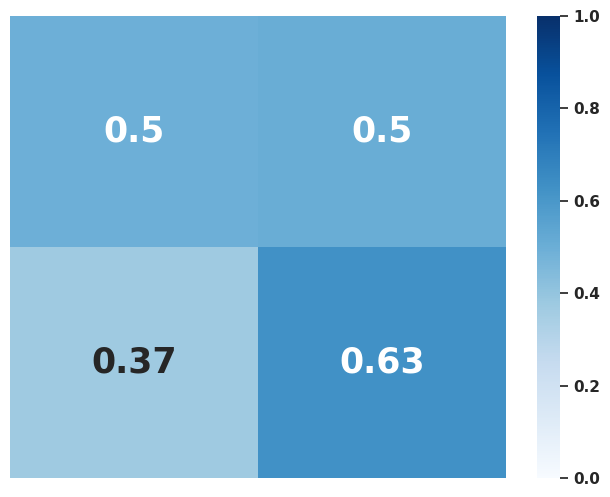

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanfd', 'ed_meanfd']
accuracy of SVM: [0.64, 0.56, 0.72, 0.68, 0.625]
Average accuracy of SVM:  0.645 
 Standard Deviation of Accuracy: 0.05385164807134502
Confusion matrix raw: 
 [array([[9, 1],
       [8, 7]]), array([[ 4,  6],
       [ 5, 10]]), array([[ 6,  4],
       [ 3, 12]]), array([[ 4,  5],
       [ 3, 13]]), array([[ 3,  6],
       [ 3, 12]])]
Confusion matrix normalised: 
 [array([[0.9       , 0.1       ],
       [0.53333333, 0.46666667]]), array([[0.4       , 0.6       ],
       [0.33333333, 0.66666667]]), array([[0.6, 0.4],
       [0.2, 0.8]]), array([[0.44444444, 0.55555556],
       [0.1875    , 0.8125    ]]), array([[0.33333333, 0.66666667],
       [0.2       , 0.8       ]])]
average Confusion Matrix: 
 [[0.53555556 0.46444444]
 [0.29083333 0.70916667]]


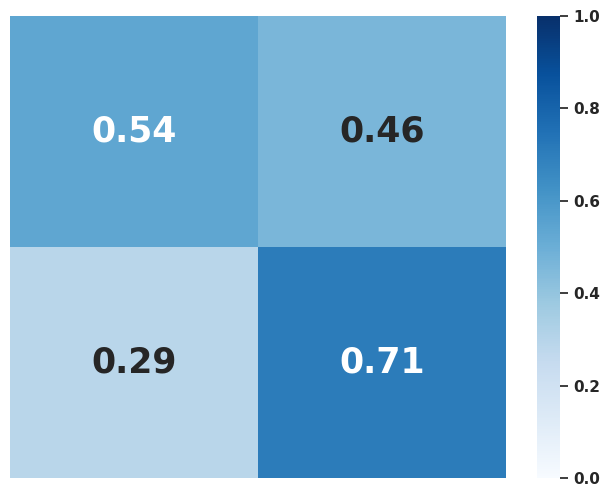

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanfd', 'ncr_net_meanfd', 'ed_meanfd']
accuracy of SVM: [0.48, 0.4, 0.64, 0.76, 0.6666666666666666]
Average accuracy of SVM:  0.5893333333333334 
 Standard Deviation of Accuracy: 0.1307482738360668
Confusion matrix raw: 
 [array([[10,  0],
       [13,  2]]), array([[ 5,  5],
       [10,  5]]), array([[ 6,  4],
       [ 5, 10]]), array([[ 3,  6],
       [ 0, 16]]), array([[ 4,  5],
       [ 3, 12]])]
Confusion matrix normalised: 
 [array([[1.        , 0.        ],
       [0.86666667, 0.13333333]]), array([[0.5       , 0.5       ],
       [0.66666667, 0.33333333]]), array([[0.6       , 0.4       ],
       [0.33333333, 0.66666667]]), array([[0.33333333, 0.66666667],
       [0.        , 1.        ]]), array([[0.44444444, 0.55555556],
       [0.2       , 0.8       ]])]
average Confusion Matrix: 
 [[0.57555556 0.42444444]
 [0.41333333 0.58666

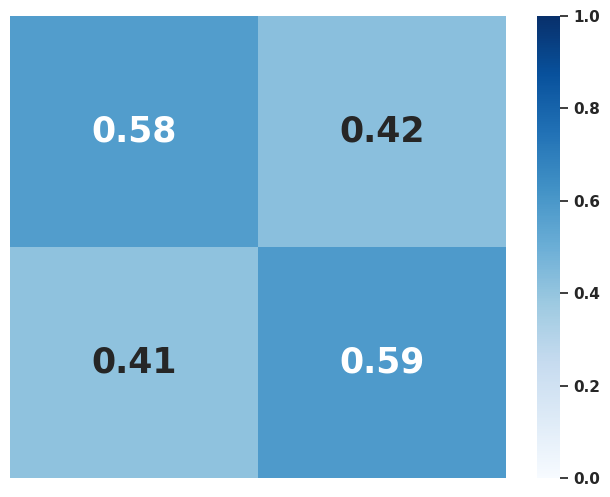

----------------------------------------------------------------------


In [142]:
# For SVM IDH meanFD
for i in lst1:
    print('-' *70)
    print("for",i)
    X = df5[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df5[['MGMT_promoter_status']]

    y = Y == 'Meth'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = KNeighborsClassifier(10)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


## MGMT Lacunarity

----------------------------------------------------------------------
for ['et_meanlac']
accuracy of SVM: [0.47619047619047616, 0.38095238095238093, 0.5714285714285714, 0.5714285714285714, 0.6]
Average accuracy of SVM:  0.5199999999999999 
 Standard Deviation of Accuracy: 0.08117057429585721
Confusion matrix raw: 
 [array([[ 8,  1],
       [10,  2]]), array([[ 7,  2],
       [11,  1]]), array([[ 0,  9],
       [ 0, 12]]), array([[ 0,  9],
       [ 0, 12]]), array([[ 0,  8],
       [ 0, 12]])]
Confusion matrix normalised: 
 [array([[0.88888889, 0.11111111],
       [0.83333333, 0.16666667]]), array([[0.77777778, 0.22222222],
       [0.91666667, 0.08333333]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]])]
average Confusion Matrix: 
 [[0.33333333 0.66666667]
 [0.35       0.65      ]]


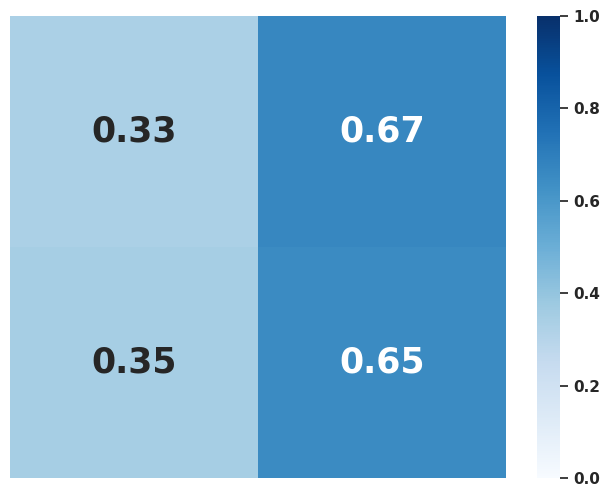

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
accuracy of SVM: [0.68, 0.56, 0.68, 0.76, 0.6666666666666666]
Average accuracy of SVM:  0.6693333333333334 
 Standard Deviation of Accuracy: 0.06388879227045834
Confusion matrix raw: 
 [array([[ 6,  4],
       [ 4, 11]]), array([[7, 3],
       [8, 7]]), array([[ 4,  6],
       [ 2, 13]]), array([[ 4,  5],
       [ 1, 15]]), array([[ 4,  5],
       [ 3, 12]])]
Confusion matrix normalised: 
 [array([[0.6       , 0.4       ],
       [0.26666667, 0.73333333]]), array([[0.7       , 0.3       ],
       [0.53333333, 0.46666667]]), array([[0.4       , 0.6       ],
       [0.13333333, 0.86666667]]), array([[0.44444444, 0.55555556],
       [0.0625    , 0.9375    ]]), array([[0.44444444, 0.55555556],
       [0.2       , 0.8       ]])]
average Confusion Matrix: 
 [[0.51777778 0.48222222]
 [0.23916667 0.76083333]]


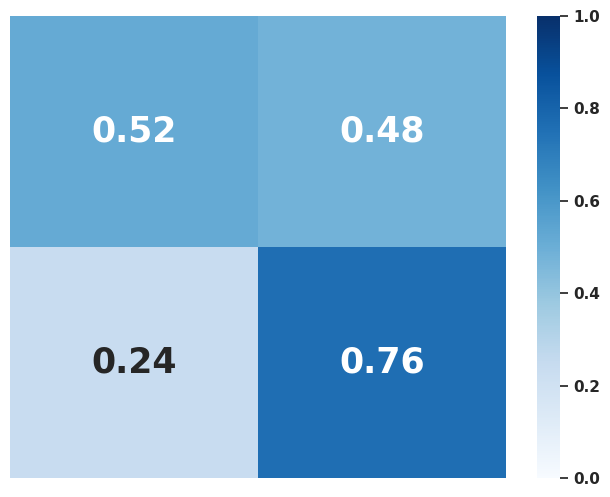

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
accuracy of SVM: [0.6, 0.6, 0.6, 0.625, 0.625]
Average accuracy of SVM:  0.61 
 Standard Deviation of Accuracy: 0.012247448713915901
Confusion matrix raw: 
 [array([[ 0, 10],
       [ 0, 15]]), array([[ 0, 10],
       [ 0, 15]]), array([[ 0, 10],
       [ 0, 15]]), array([[ 0,  9],
       [ 0, 15]]), array([[ 0,  9],
       [ 0, 15]])]
Confusion matrix normalised: 
 [array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]])]
average Confusion Matrix: 
 [[0. 1.]
 [0. 1.]]


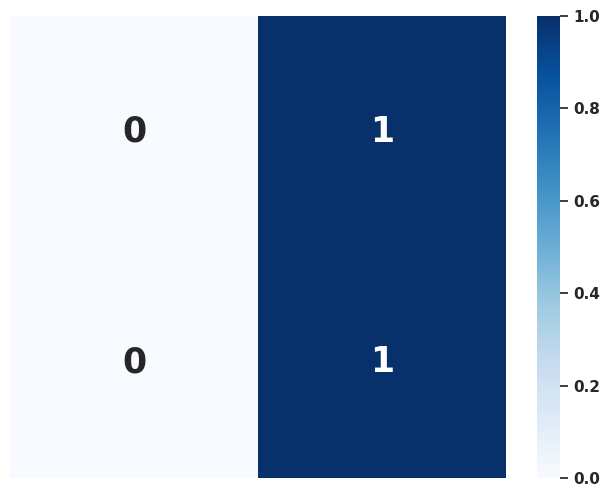

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
accuracy of SVM: [0.5714285714285714, 0.6666666666666666, 0.5238095238095238, 0.7142857142857143, 0.7]
Average accuracy of SVM:  0.6352380952380953 
 Standard Deviation of Accuracy: 0.07472398188926868
Confusion matrix raw: 
 [array([[8, 1],
       [8, 4]]), array([[9, 0],
       [7, 5]]), array([[4, 5],
       [5, 7]]), array([[ 3,  6],
       [ 0, 12]]), array([[ 4,  4],
       [ 2, 10]])]
Confusion matrix normalised: 
 [array([[0.88888889, 0.11111111],
       [0.66666667, 0.33333333]]), array([[1.        , 0.        ],
       [0.58333333, 0.41666667]]), array([[0.44444444, 0.55555556],
       [0.41666667, 0.58333333]]), array([[0.33333333, 0.66666667],
       [0.        , 1.        ]]), array([[0.5       , 0.5       ],
       [0.16666667, 0.83333333]])]
average Confusion Matrix: 
 [[0.63333333 0.36666667]


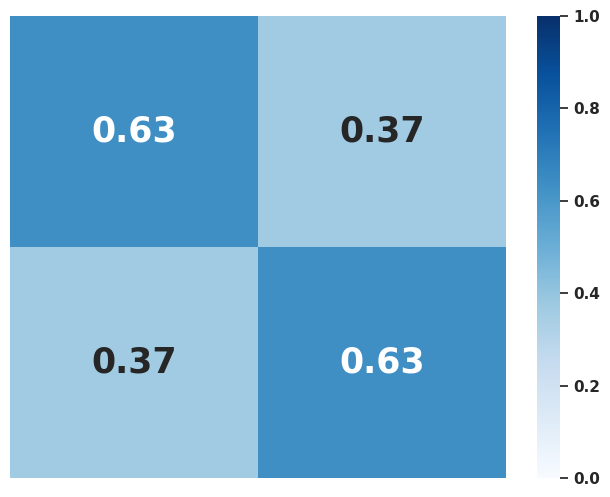

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
accuracy of SVM: [0.38095238095238093, 0.42857142857142855, 0.5714285714285714, 0.55, 0.6]
Average accuracy of SVM:  0.5061904761904762 
 Standard Deviation of Accuracy: 0.08565606488303772
Confusion matrix raw: 
 [array([[ 8,  1],
       [12,  0]]), array([[ 9,  0],
       [12,  0]]), array([[ 0,  9],
       [ 0, 12]]), array([[ 0,  9],
       [ 0, 11]]), array([[ 0,  8],
       [ 0, 12]])]
Confusion matrix normalised: 
 [array([[0.88888889, 0.11111111],
       [1.        , 0.        ]]), array([[1., 0.],
       [1., 0.]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]]), array([[0., 1.],
       [0., 1.]])]
average Confusion Matrix: 
 [[0.37777778 0.62222222]
 [0.4        0.6       ]]


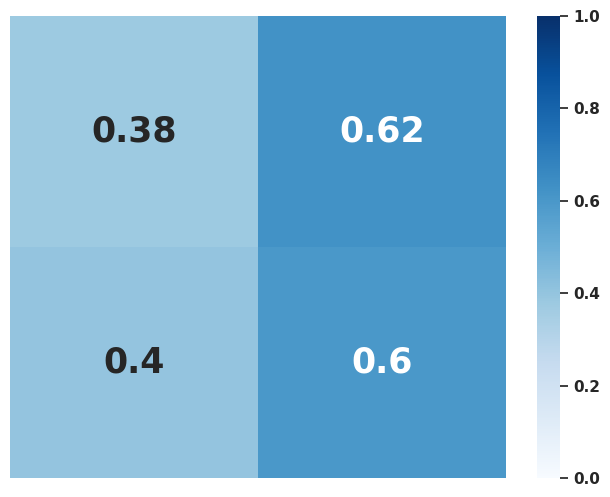

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
accuracy of SVM: [0.64, 0.52, 0.76, 0.7083333333333334, 0.6666666666666666]
Average accuracy of SVM:  0.659 
 Standard Deviation of Accuracy: 0.08046807510504467
Confusion matrix raw: 
 [array([[8, 2],
       [7, 8]]), array([[7, 3],
       [9, 6]]), array([[ 5,  5],
       [ 1, 14]]), array([[ 4,  5],
       [ 2, 13]]), array([[ 4,  5],
       [ 3, 12]])]
Confusion matrix normalised: 
 [array([[0.8       , 0.2       ],
       [0.46666667, 0.53333333]]), array([[0.7, 0.3],
       [0.6, 0.4]]), array([[0.5       , 0.5       ],
       [0.06666667, 0.93333333]]), array([[0.44444444, 0.55555556],
       [0.13333333, 0.86666667]]), array([[0.44444444, 0.55555556],
       [0.2       , 0.8       ]])]
average Confusion Matrix: 
 [[0.57777778 0.42222222]
 [0.29333333 0.70666667]]


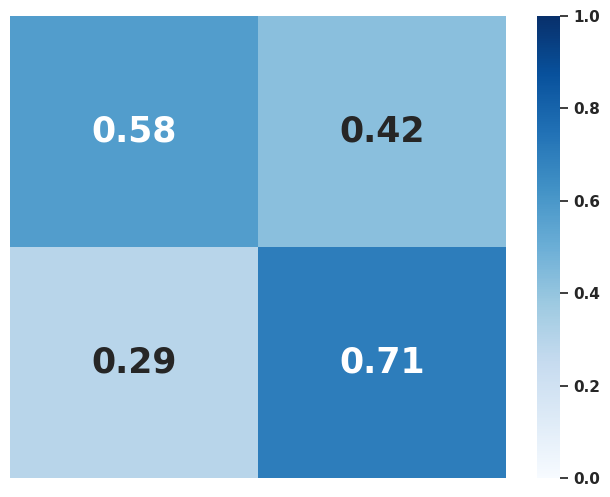

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
accuracy of SVM: [0.5238095238095238, 0.6190476190476191, 0.5714285714285714, 0.7, 0.8]
Average accuracy of SVM:  0.6428571428571429 
 Standard Deviation of Accuracy: 0.09777571632541408
Confusion matrix raw: 
 [array([[8, 1],
       [9, 3]]), array([[9, 0],
       [8, 4]]), array([[4, 5],
       [4, 8]]), array([[ 3,  6],
       [ 0, 11]]), array([[ 6,  2],
       [ 2, 10]])]
Confusion matrix normalised: 
 [array([[0.88888889, 0.11111111],
       [0.75      , 0.25      ]]), array([[1.        , 0.        ],
       [0.66666667, 0.33333333]]), array([[0.44444444, 0.55555556],
       [0.33333333, 0.66666667]]), array([[0.33333333, 0.66666667],
       [0.        , 1.        ]]), array([[0.75      , 0.25      ],
       [0.16666667, 0.83333333]])]
average Confusion Matrix: 
 [[0.68333333 0.31666667]
 

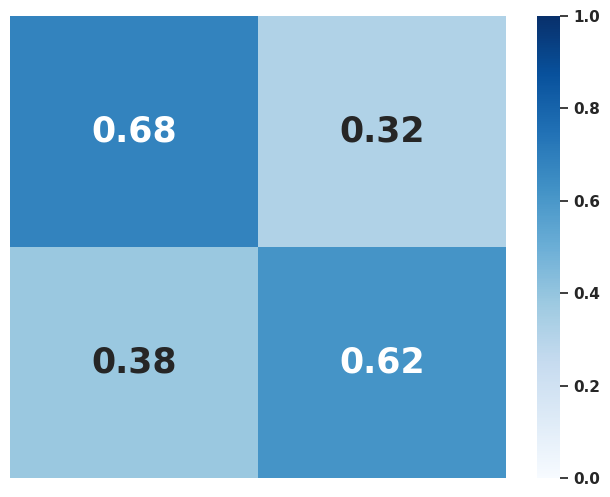

----------------------------------------------------------------------


In [143]:
# For SVM IDH meanFD
for i in lst2:
    print('-' *70)
    print("for",i)
    df6 = df5.dropna(subset=i)
    X = df6[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df6[['MGMT_promoter_status']]

    y = Y == 'Meth'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = svm.SVC(random_state=42)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


----------------------------------------------------------------------
for ['et_meanlac']
accuracy of SVM: [0.5714285714285714, 0.42857142857142855, 0.7619047619047619, 0.7142857142857143, 0.7]
Average accuracy of SVM:  0.6352380952380953 
 Standard Deviation of Accuracy: 0.12105357596522398
Confusion matrix raw: 
 [array([[5, 4],
       [5, 7]]), array([[5, 4],
       [8, 4]]), array([[ 6,  3],
       [ 2, 10]]), array([[ 5,  4],
       [ 2, 10]]), array([[7, 1],
       [5, 7]])]
Confusion matrix normalised: 
 [array([[0.55555556, 0.44444444],
       [0.41666667, 0.58333333]]), array([[0.55555556, 0.44444444],
       [0.66666667, 0.33333333]]), array([[0.66666667, 0.33333333],
       [0.16666667, 0.83333333]]), array([[0.55555556, 0.44444444],
       [0.16666667, 0.83333333]]), array([[0.875     , 0.125     ],
       [0.41666667, 0.58333333]])]
average Confusion Matrix: 
 [[0.64166667 0.35833333]
 [0.36666667 0.63333333]]


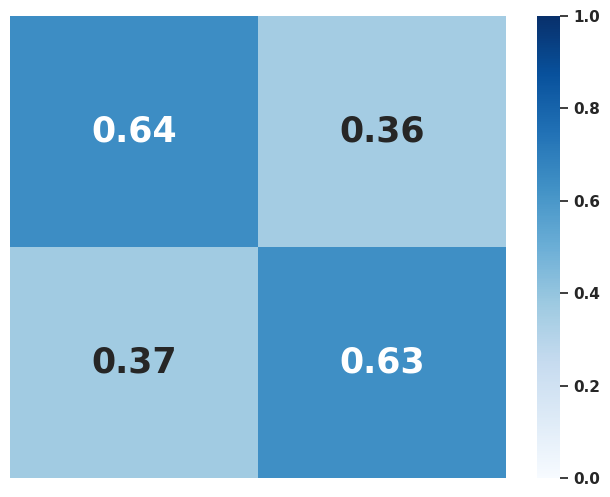

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
accuracy of SVM: [0.64, 0.68, 0.6, 0.8, 0.75]
Average accuracy of SVM:  0.694 
 Standard Deviation of Accuracy: 0.07255342858886824
Confusion matrix raw: 
 [array([[ 5,  5],
       [ 4, 11]]), array([[9, 1],
       [7, 8]]), array([[6, 4],
       [6, 9]]), array([[ 5,  4],
       [ 1, 15]]), array([[ 5,  4],
       [ 2, 13]])]
Confusion matrix normalised: 
 [array([[0.5       , 0.5       ],
       [0.26666667, 0.73333333]]), array([[0.9       , 0.1       ],
       [0.46666667, 0.53333333]]), array([[0.6, 0.4],
       [0.4, 0.6]]), array([[0.55555556, 0.44444444],
       [0.0625    , 0.9375    ]]), array([[0.55555556, 0.44444444],
       [0.13333333, 0.86666667]])]
average Confusion Matrix: 
 [[0.62222222 0.37777778]
 [0.26583333 0.73416667]]


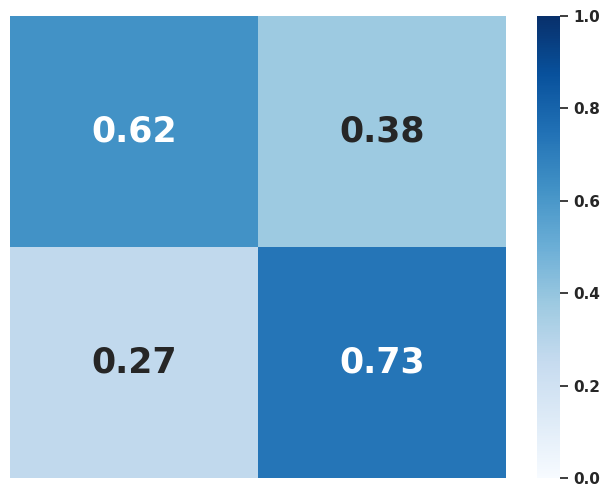

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
accuracy of SVM: [0.6, 0.56, 0.6, 0.4583333333333333, 0.625]
Average accuracy of SVM:  0.5686666666666668 
 Standard Deviation of Accuracy: 0.05896703410475307
Confusion matrix raw: 
 [array([[ 5,  5],
       [ 5, 10]]), array([[ 4,  6],
       [ 5, 10]]), array([[ 5,  5],
       [ 5, 10]]), array([[3, 6],
       [7, 8]]), array([[ 4,  5],
       [ 4, 11]])]
Confusion matrix normalised: 
 [array([[0.5       , 0.5       ],
       [0.33333333, 0.66666667]]), array([[0.4       , 0.6       ],
       [0.33333333, 0.66666667]]), array([[0.5       , 0.5       ],
       [0.33333333, 0.66666667]]), array([[0.33333333, 0.66666667],
       [0.46666667, 0.53333333]]), array([[0.44444444, 0.55555556],
       [0.26666667, 0.73333333]])]
average Confusion Matrix: 
 [[0.43555556 0.56444444]
 [0.34666667 0.65333333]]


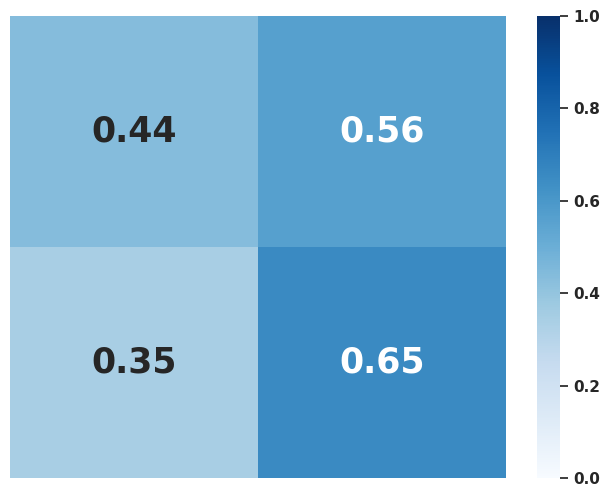

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
accuracy of SVM: [0.6190476190476191, 0.6666666666666666, 0.6666666666666666, 0.9047619047619048, 0.75]
Average accuracy of SVM:  0.7214285714285713 
 Standard Deviation of Accuracy: 0.10090295285912901
Confusion matrix raw: 
 [array([[8, 1],
       [7, 5]]), array([[7, 2],
       [5, 7]]), array([[5, 4],
       [3, 9]]), array([[ 7,  2],
       [ 0, 12]]), array([[ 5,  3],
       [ 2, 10]])]
Confusion matrix normalised: 
 [array([[0.88888889, 0.11111111],
       [0.58333333, 0.41666667]]), array([[0.77777778, 0.22222222],
       [0.41666667, 0.58333333]]), array([[0.55555556, 0.44444444],
       [0.25      , 0.75      ]]), array([[0.77777778, 0.22222222],
       [0.        , 1.        ]]), array([[0.625     , 0.375     ],
       [0.16666667, 0.83333333]])]
average Confusion Matrix: 
 [[0.725      0.275     ]

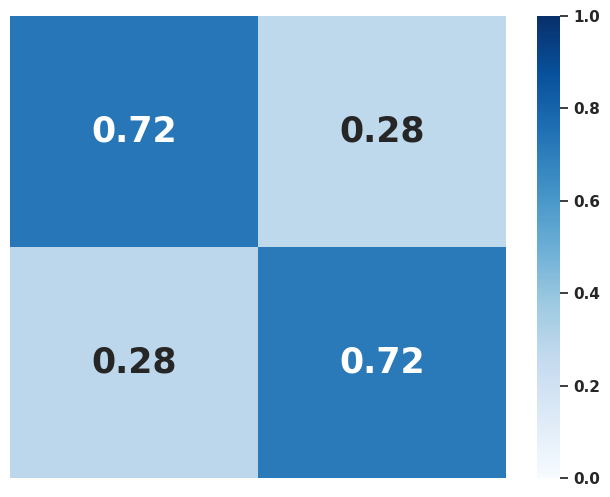

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
accuracy of SVM: [0.47619047619047616, 0.38095238095238093, 0.5714285714285714, 0.6, 0.7]
Average accuracy of SVM:  0.5457142857142857 
 Standard Deviation of Accuracy: 0.10898833905462832
Confusion matrix raw: 
 [array([[6, 3],
       [8, 4]]), array([[5, 4],
       [9, 3]]), array([[5, 4],
       [5, 7]]), array([[4, 5],
       [3, 8]]), array([[5, 3],
       [3, 9]])]
Confusion matrix normalised: 
 [array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333]]), array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ]]), array([[0.55555556, 0.44444444],
       [0.41666667, 0.58333333]]), array([[0.44444444, 0.55555556],
       [0.27272727, 0.72727273]]), array([[0.625, 0.375],
       [0.25 , 0.75 ]])]
average Confusion Matrix: 
 [[0.56944444 0.43055556]
 [0.47121212 0.52878788]]


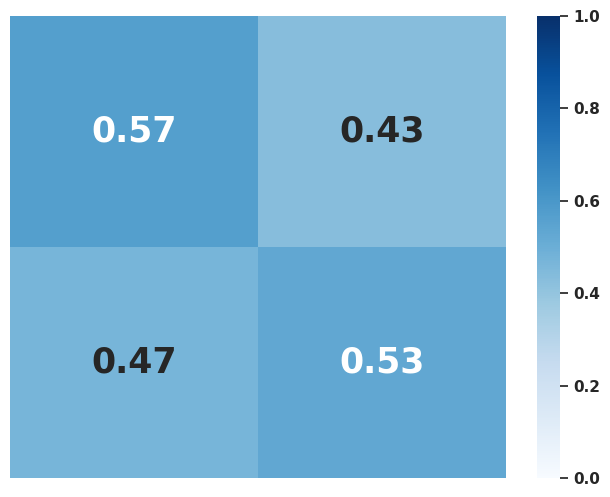

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
accuracy of SVM: [0.48, 0.56, 0.64, 0.8333333333333334, 0.75]
Average accuracy of SVM:  0.6526666666666667 
 Standard Deviation of Accuracy: 0.1270240572140219
Confusion matrix raw: 
 [array([[5, 5],
       [8, 7]]), array([[7, 3],
       [8, 7]]), array([[7, 3],
       [6, 9]]), array([[ 5,  4],
       [ 0, 15]]), array([[ 5,  4],
       [ 2, 13]])]
Confusion matrix normalised: 
 [array([[0.5       , 0.5       ],
       [0.53333333, 0.46666667]]), array([[0.7       , 0.3       ],
       [0.53333333, 0.46666667]]), array([[0.7, 0.3],
       [0.4, 0.6]]), array([[0.55555556, 0.44444444],
       [0.        , 1.        ]]), array([[0.55555556, 0.44444444],
       [0.13333333, 0.86666667]])]
average Confusion Matrix: 
 [[0.60222222 0.39777778]
 [0.32       0.68      ]]


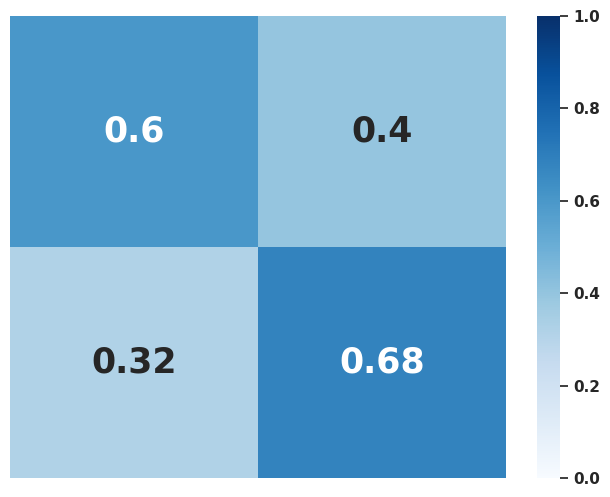

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
accuracy of SVM: [0.5238095238095238, 0.47619047619047616, 0.5714285714285714, 0.75, 0.75]
Average accuracy of SVM:  0.6142857142857142 
 Standard Deviation of Accuracy: 0.11483005287416662
Confusion matrix raw: 
 [array([[8, 1],
       [9, 3]]), array([[7, 2],
       [9, 3]]), array([[5, 4],
       [5, 7]]), array([[ 5,  4],
       [ 1, 10]]), array([[ 5,  3],
       [ 2, 10]])]
Confusion matrix normalised: 
 [array([[0.88888889, 0.11111111],
       [0.75      , 0.25      ]]), array([[0.77777778, 0.22222222],
       [0.75      , 0.25      ]]), array([[0.55555556, 0.44444444],
       [0.41666667, 0.58333333]]), array([[0.55555556, 0.44444444],
       [0.09090909, 0.90909091]]), array([[0.625     , 0.375     ],
       [0.16666667, 0.83333333]])]
average Confusion Matrix: 
 [[0.68055556 0.31944444

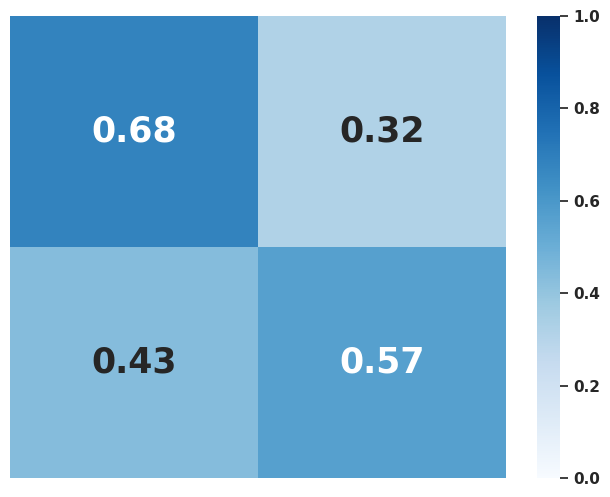

----------------------------------------------------------------------


In [144]:
# For SVM IDH meanFD
for i in lst2:
    print('-' *70)
    print("for",i)
    df6 = df5.dropna(subset=i)
    X = df6[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df6[['MGMT_promoter_status']]

    y = Y == 'Meth'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = RandomForestClassifier(n_estimators=10, random_state=42)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


----------------------------------------------------------------------
for ['et_meanlac']
accuracy of SVM: [0.5714285714285714, 0.42857142857142855, 0.7142857142857143, 0.5714285714285714, 0.6]
Average accuracy of SVM:  0.5771428571428572 
 Standard Deviation of Accuracy: 0.09107072828862417
Confusion matrix raw: 
 [array([[7, 2],
       [7, 5]]), array([[5, 4],
       [8, 4]]), array([[ 5,  4],
       [ 2, 10]]), array([[8, 1],
       [8, 4]]), array([[ 2,  6],
       [ 2, 10]])]
Confusion matrix normalised: 
 [array([[0.77777778, 0.22222222],
       [0.58333333, 0.41666667]]), array([[0.55555556, 0.44444444],
       [0.66666667, 0.33333333]]), array([[0.55555556, 0.44444444],
       [0.16666667, 0.83333333]]), array([[0.88888889, 0.11111111],
       [0.66666667, 0.33333333]]), array([[0.25      , 0.75      ],
       [0.16666667, 0.83333333]])]
average Confusion Matrix: 
 [[0.60555556 0.39444444]
 [0.45       0.55      ]]


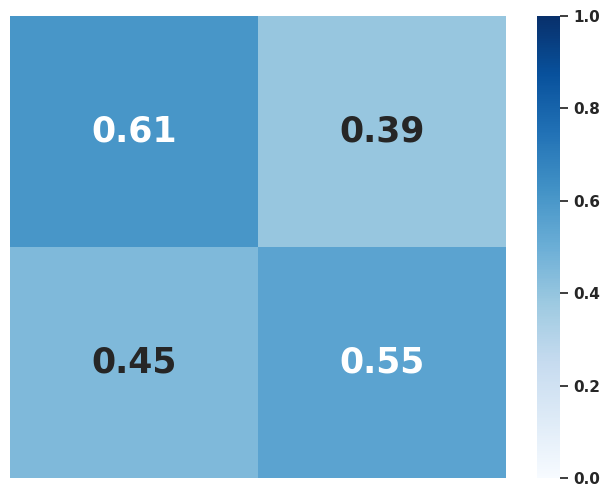

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac']
accuracy of SVM: [0.56, 0.56, 0.64, 0.76, 0.75]
Average accuracy of SVM:  0.6540000000000001 
 Standard Deviation of Accuracy: 0.08754427451295714
Confusion matrix raw: 
 [array([[7, 3],
       [8, 7]]), array([[8, 2],
       [9, 6]]), array([[ 6,  4],
       [ 5, 10]]), array([[ 5,  4],
       [ 2, 14]]), array([[ 6,  3],
       [ 3, 12]])]
Confusion matrix normalised: 
 [array([[0.7       , 0.3       ],
       [0.53333333, 0.46666667]]), array([[0.8, 0.2],
       [0.6, 0.4]]), array([[0.6       , 0.4       ],
       [0.33333333, 0.66666667]]), array([[0.55555556, 0.44444444],
       [0.125     , 0.875     ]]), array([[0.66666667, 0.33333333],
       [0.2       , 0.8       ]])]
average Confusion Matrix: 
 [[0.66444444 0.33555556]
 [0.35833333 0.64166667]]


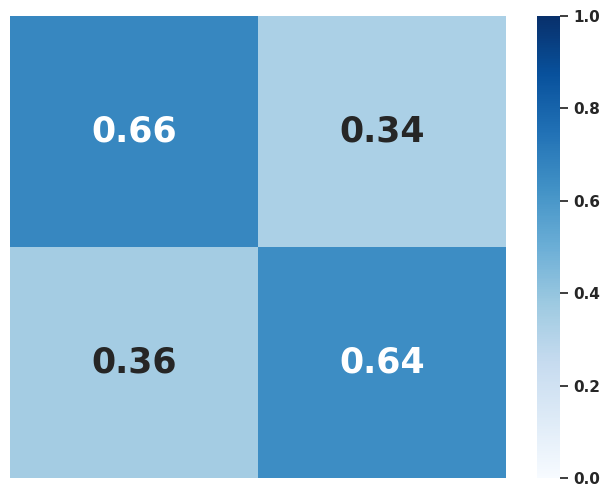

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ed_meanlac']
accuracy of SVM: [0.4, 0.44, 0.48, 0.5416666666666666, 0.5833333333333334]
Average accuracy of SVM:  0.48900000000000005 
 Standard Deviation of Accuracy: 0.06644630246380238
Confusion matrix raw: 
 [array([[4, 6],
       [9, 6]]), array([[5, 5],
       [9, 6]]), array([[5, 5],
       [8, 7]]), array([[ 3,  6],
       [ 5, 10]]), array([[ 4,  5],
       [ 5, 10]])]
Confusion matrix normalised: 
 [array([[0.4, 0.6],
       [0.6, 0.4]]), array([[0.5, 0.5],
       [0.6, 0.4]]), array([[0.5       , 0.5       ],
       [0.53333333, 0.46666667]]), array([[0.33333333, 0.66666667],
       [0.33333333, 0.66666667]]), array([[0.44444444, 0.55555556],
       [0.33333333, 0.66666667]])]
average Confusion Matrix: 
 [[0.43555556 0.56444444]
 [0.48       0.52      ]]


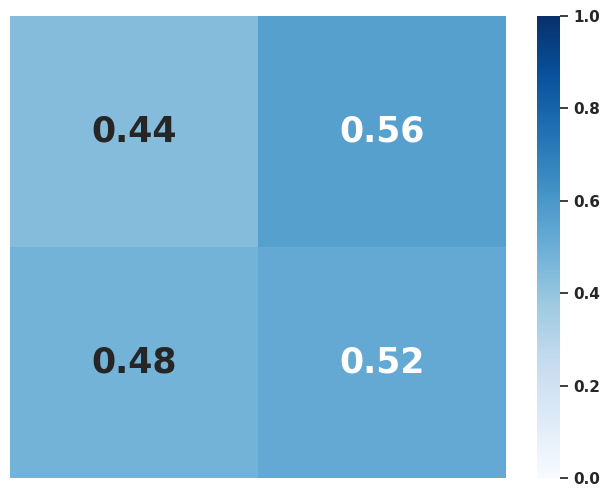

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'et_meanlac']
accuracy of SVM: [0.5238095238095238, 0.6190476190476191, 0.5238095238095238, 0.6666666666666666, 0.75]
Average accuracy of SVM:  0.6166666666666666 
 Standard Deviation of Accuracy: 0.08663526380314404
Confusion matrix raw: 
 [array([[7, 2],
       [8, 4]]), array([[9, 0],
       [8, 4]]), array([[4, 5],
       [5, 7]]), array([[ 4,  5],
       [ 2, 10]]), array([[ 5,  3],
       [ 2, 10]])]
Confusion matrix normalised: 
 [array([[0.77777778, 0.22222222],
       [0.66666667, 0.33333333]]), array([[1.        , 0.        ],
       [0.66666667, 0.33333333]]), array([[0.44444444, 0.55555556],
       [0.41666667, 0.58333333]]), array([[0.44444444, 0.55555556],
       [0.16666667, 0.83333333]]), array([[0.625     , 0.375     ],
       [0.16666667, 0.83333333]])]
average Confusion Matrix: 
 [[0.65833333 0.34166667]

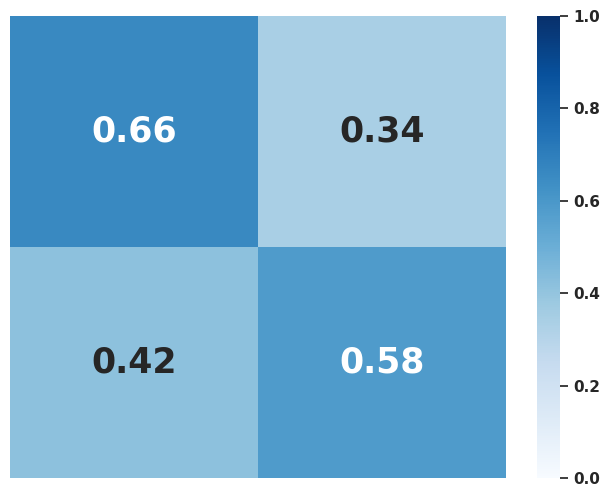

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ed_meanlac']
accuracy of SVM: [0.2857142857142857, 0.42857142857142855, 0.6190476190476191, 0.55, 0.55]
Average accuracy of SVM:  0.4866666666666667 
 Standard Deviation of Accuracy: 0.117731775553827
Confusion matrix raw: 
 [array([[ 6,  3],
       [12,  0]]), array([[6, 3],
       [9, 3]]), array([[5, 4],
       [4, 8]]), array([[6, 3],
       [6, 5]]), array([[2, 6],
       [3, 9]])]
Confusion matrix normalised: 
 [array([[0.66666667, 0.33333333],
       [1.        , 0.        ]]), array([[0.66666667, 0.33333333],
       [0.75      , 0.25      ]]), array([[0.55555556, 0.44444444],
       [0.33333333, 0.66666667]]), array([[0.66666667, 0.33333333],
       [0.54545455, 0.45454545]]), array([[0.25, 0.75],
       [0.25, 0.75]])]
average Confusion Matrix: 
 [[0.56111111 0.43888889]
 [0.57575758 0.42424242]]


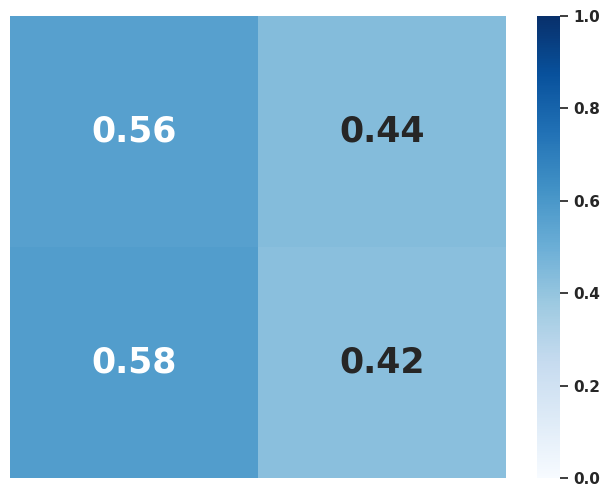

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['ncr_net_meanlac', 'ed_meanlac']
accuracy of SVM: [0.72, 0.6, 0.68, 0.75, 0.8333333333333334]
Average accuracy of SVM:  0.7166666666666667 
 Standard Deviation of Accuracy: 0.0770569774762661
Confusion matrix raw: 
 [array([[9, 1],
       [6, 9]]), array([[7, 3],
       [7, 8]]), array([[ 6,  4],
       [ 4, 11]]), array([[ 4,  5],
       [ 1, 14]]), array([[ 6,  3],
       [ 1, 14]])]
Confusion matrix normalised: 
 [array([[0.9, 0.1],
       [0.4, 0.6]]), array([[0.7       , 0.3       ],
       [0.46666667, 0.53333333]]), array([[0.6       , 0.4       ],
       [0.26666667, 0.73333333]]), array([[0.44444444, 0.55555556],
       [0.06666667, 0.93333333]]), array([[0.66666667, 0.33333333],
       [0.06666667, 0.93333333]])]
average Confusion Matrix: 
 [[0.66222222 0.33777778]
 [0.25333333 0.74666667]]


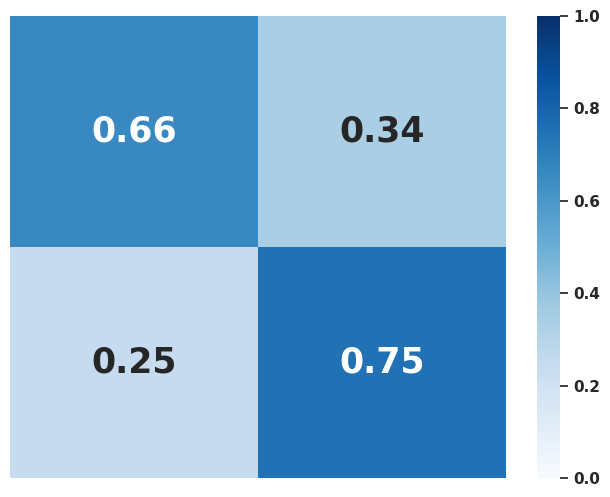

----------------------------------------------------------------------
----------------------------------------------------------------------
for ['et_meanlac', 'ncr_net_meanlac', 'ed_meanlac']
accuracy of SVM: [0.5714285714285714, 0.5238095238095238, 0.5238095238095238, 0.65, 0.8]
Average accuracy of SVM:  0.6138095238095238 
 Standard Deviation of Accuracy: 0.1038968614690995
Confusion matrix raw: 
 [array([[8, 1],
       [8, 4]]), array([[ 9,  0],
       [10,  2]]), array([[4, 5],
       [5, 7]]), array([[4, 5],
       [2, 9]]), array([[ 6,  2],
       [ 2, 10]])]
Confusion matrix normalised: 
 [array([[0.88888889, 0.11111111],
       [0.66666667, 0.33333333]]), array([[1.        , 0.        ],
       [0.83333333, 0.16666667]]), array([[0.44444444, 0.55555556],
       [0.41666667, 0.58333333]]), array([[0.44444444, 0.55555556],
       [0.18181818, 0.81818182]]), array([[0.75      , 0.25      ],
       [0.16666667, 0.83333333]])]
average Confusion Matrix: 
 [[0.70555556 0.29444444]
 

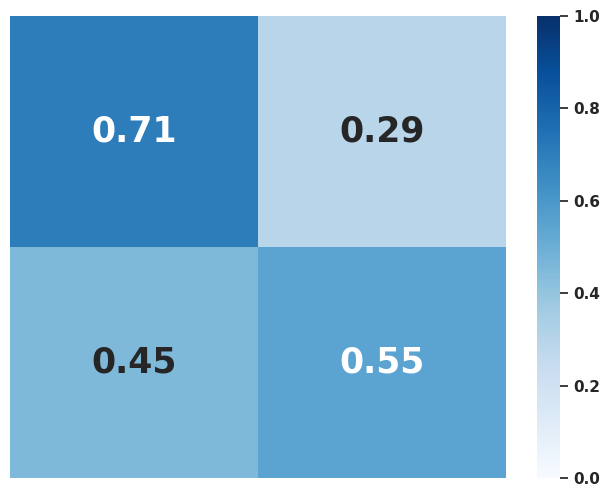

----------------------------------------------------------------------


In [145]:
# For SVM IDH meanFD
for i in lst2:
    print('-' *70)
    print("for",i)
    df6 = df5.dropna(subset=i)
    X = df6[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df6[['MGMT_promoter_status']]

    y = Y == 'Meth'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = KNeighborsClassifier(10)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

    #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
    #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
    print("accuracy of SVM:", accuracy_model)
    print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
    print("Confusion matrix raw:","\n", confusion_raw)
    print("Confusion matrix normalised:","\n", confusion_norm)
    confusion_avg = avg_confusion_calculate(confusion_norm)
    print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

    plt.show()
    print('-' *70)


# Test

In [ ]:
'''# Demo code - Before editing
for i in lst1:
    print('-'*50)
    print("for",i)
    X = df2[i]
    X = np.array(X).reshape((-1,len(i)))

    Y = df2[['IDH_status']]

    y = Y == 'WT'
    y = np.array(Y)
    
    n_splits=5
    
    cv = StratifiedKFold(n_splits=5)
    classifier = svm.SVC(random_state=42)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    accuracy_model = []
    confusion_norm = []
    confusion_raw = []
    
    fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
    ax2 = fig.add_subplot(1, 1, 1)
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            lw=0,
            ax=ax1,
        )
        viz.line_.set_label("")
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        y_pred=classifier.predict(X[test])
        
        accuracy = accuracy_score(y[test],y_pred)
        confusion = confusion_matrix(y[test],y_pred)
        confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
            
            
        accuracy_model.append(accuracy)
        confusion_norm.append(confusion_accuracy)
        confusion_raw.append(confusion)
        
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax1.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="",
        ylabel="",
        title=f"",
    )
    ax1.axis("square")
    ax1.legend(loc="lower right")
    rc("axes", linewidth=1.5)

    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)

    plt.ylim(0,1)
    plt.xlim(0,1)

    ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
    ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)
    
    legend_font = {'size': 15, 'weight': 'normal'}  
    ax1.legend(loc="lower right", prop=legend_font)

#     #ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
#     #plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
#     print("accuracy of SVM:", accuracy_model)
#     print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
#     print("Confusion matrix raw:","\n", confusion_raw)
#     print("Confusion matrix normalised:","\n", confusion_norm)
#     confusion_avg = avg_confusion_calculate(confusion_norm)
#     print("average Confusion Matrix:","\n", confusion_avg)
    
    ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, 
                    linewidths = 0,xticklabels=["Mutant", "Wildtype"], 
                    yticklabels=["Mutant", "Wildtype"],annot_kws={'size': 25})
    sns.set(font_scale=10)
    sns.set (rc = {'figure.figsize':(6,6)})
    # plt.gcf().set_size_inches(5, 5)
    plt.yticks(rotation=0) 
    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
    ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    
#     fig = ax1.get_figure()
#     fig.savefig('/home/aswin/Desktop/' + str(i) + '_ROC.tiff', dpi=300)
#     fig2 = ax2.get_figure()
#     fig2.savefig('/home/aswin/Desktop/' + str(i) + '_Confusion.tiff', dpi=300)  
    plt.show()
    print('-'*50)'''

accuracy of SVM: [0.5238095238095238, 0.6190476190476191, 0.5714285714285714, 0.7, 0.8]
Average accuracy of SVM:  0.6428571428571429 
 Standard Deviation of Accuracy: 0.09777571632541408
Confusion matrix raw: 
 [array([[8, 1],
       [9, 3]]), array([[9, 0],
       [8, 4]]), array([[4, 5],
       [4, 8]]), array([[ 3,  6],
       [ 0, 11]]), array([[ 6,  2],
       [ 2, 10]])]
Confusion matrix normalised: 
 [array([[0.88888889, 0.11111111],
       [0.75      , 0.25      ]]), array([[1.        , 0.        ],
       [0.66666667, 0.33333333]]), array([[0.44444444, 0.55555556],
       [0.33333333, 0.66666667]]), array([[0.33333333, 0.66666667],
       [0.        , 1.        ]]), array([[0.75      , 0.25      ],
       [0.16666667, 0.83333333]])]
average Confusion Matrix: 
 [[0.68333333 0.31666667]
 [0.38333333 0.61666667]]


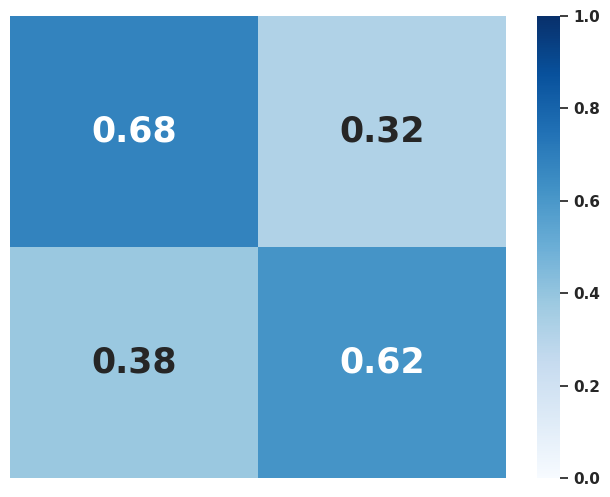

In [146]:
# for SVM IDH accuracy an confusion matrix try


n_splits=5
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

accuracy_model = []
confusion_norm = []
confusion_raw = []

fig = plt.figure(figsize=(8, 6))
#    ax1 = fig.add_subplot
ax2 = fig.add_subplot(1, 1, 1)
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax1,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_pred=classifier.predict(X[test])
    
    accuracy = accuracy_score(y[test],y_pred)
    confusion = confusion_matrix(y[test],y_pred)
    confusion_accuracy = confusion/confusion.sum(axis = 1,keepdims = True)
        
        
    accuracy_model.append(accuracy)
    confusion_norm.append(confusion_accuracy)
    confusion_raw.append(confusion)
    
    

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax1.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax1.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax1.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax1.axis("square")
ax1.legend(loc="lower right")
rc("axes", linewidth=1.5)

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

plt.ylim(0,1)
plt.xlim(0,1)

ax1.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax1.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax1.legend(loc="lower right", prop=legend_font)

#ax1.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
#plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)
print("accuracy of SVM:", accuracy_model)
print("Average accuracy of SVM: ", np.mean(accuracy_model),"\n","Standard Deviation of Accuracy:", np.std(accuracy_model))
print("Confusion matrix raw:","\n", confusion_raw)
print("Confusion matrix normalised:","\n", confusion_norm)
confusion_avg = avg_confusion_calculate(confusion_norm)
print("average Confusion Matrix:","\n", confusion_avg)

ax2=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
sns.set(font_scale=10)
sns.set (rc = {'figure.figsize':(6,6)})
# plt.gcf().set_size_inches(5, 5)
plt.yticks(rotation=0) 
ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 25)
ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 25)
    
    ###ax2.get_figure().savefig(save_path + str(i) + '_Confusion.tiff', dpi=300)

plt.show()

[Text(0, 0.5, ''), Text(0, 1.5, '')]

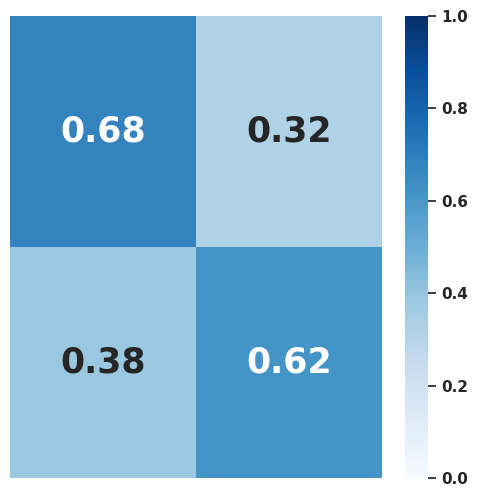

In [147]:

ax=sns.heatmap(confusion_avg, vmin=0, vmax=1,cmap='Blues',linecolor='white', annot=True, linewidths = 0,xticklabels=["", ""], yticklabels=["", ""],annot_kws={'size': 25})
sns.set(font_scale=10)
sns.set (rc = {'figure.figsize':(7, 6)})
# plt.gcf().set_size_inches(5, 5)
plt.yticks(rotation=0) 
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 25)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 25)
# plt.savefig("RF_confusion.jpeg",dpi = 1200,bbox_inches = "tight")

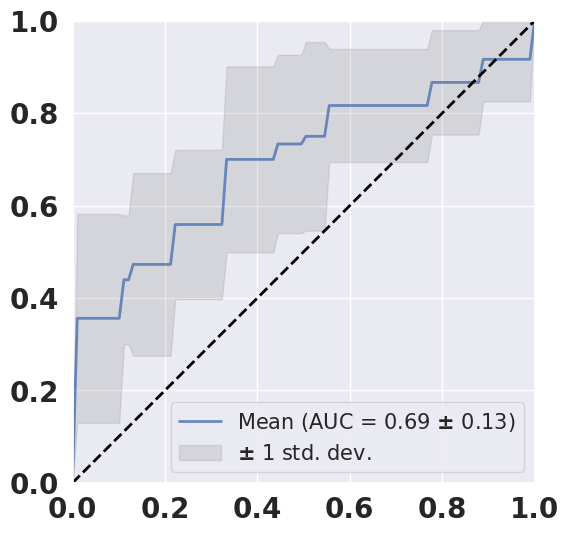

In [148]:
# for SVM IDH
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

n_splits=5
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(random_state=42)

tprs = []
aucs = []
Accuracy=[]
precision=[]
Recall=[]
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_pred=classifier.predict(X[test])
    
    

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
#plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)

plt.show()

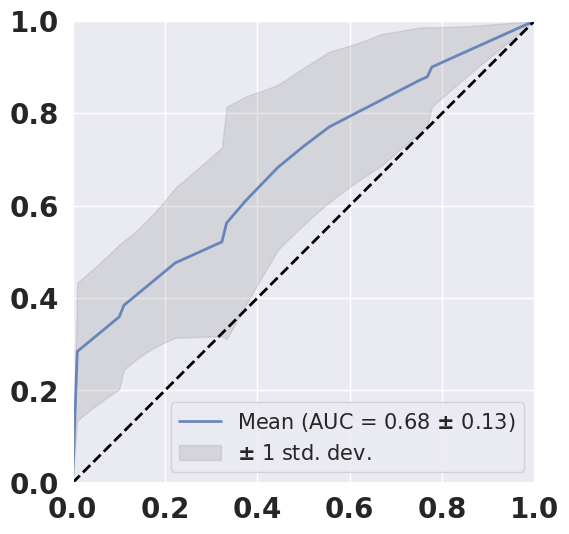

In [149]:
# for Random Forest IDH

n_splits=5
cv = StratifiedKFold(n_splits=5)
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
#     xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)


plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
#plt.savefig(roc_path + "RF_fd_IDH.tiff", dpi=600)

plt.show()

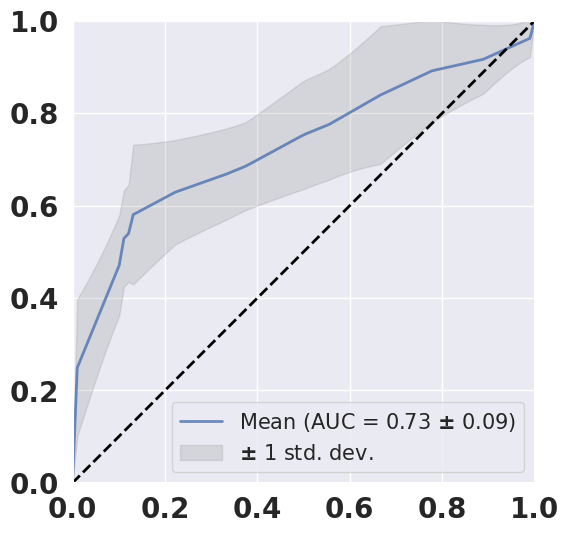

In [150]:
# for KNN IDH

n_splits=5
cv = StratifiedKFold(n_splits=5)
classifier = KNeighborsClassifier(10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
#plt.savefig(roc_path + "KNN_fd_IDH.tiff", dpi=600)

plt.show()